

# Scientific Experimentation and Evaluation Report

# Team Members

- Ayush Salunke

- Prachi Sheth 

- Yash Somaiya

In [1]:
# all imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.ticker as plticker
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from scipy.stats import norm
from statsmodels.stats.diagnostic import lilliefors
import cv2 as cv
import glob
import os
from IPython.display import display, Markdown
import seaborn as sns
from scipy.stats import levene
from sklearn.decomposition import PCA

# Experiment 1: Manual Motion Observation - Experiment Design

## Aim
The aim of this experiment is to design and develop a differential drive robot that can accurately record its end positions. The experiment focuses on creating an efficient measurement system to track the robot's final poses, estimate the precision and error propagation in the measurement process.

## 1.1 Design of the Robot

### 1.1.1 Components Used
- **EV3 Intelligent Brick** - The central programmable unit that controls the robot.

- **Lego Bricks** - To make a sturdy robot.

- **2 x DC motors and Wheels** - Connected to the wheels for movement.

- **1 x Castor wheel** - Stabilizes the robot while allowing it to change direction easily as it moves.

- **2 x Fins** - For marking the robot's position on the grid.

- **RJ12 connecting cables** - Wires connecting the motors to the EV3 brick for communication and power.


### 1.1.2 Robot Design
The design, shown in Figure 1, was chosen to provide both stability and effective maneuverability. The robot utilizes two large wheels, each powered by individual motors, which allows for smooth forward and backward movement. These wheels operate in a differential drive configuration, meaning the robot can turn by adjusting the speed of each wheel independently. The addition of a caster wheel at the front offers balance and supports the robot’s structure, allowing for easy direction changes without adding resistance to the motion. This setup makes the robot agile and efficient for precise navigation, while maintaining stability during operation. The two fins are added at the front and back of the robot for the measurement of the robot's position.


![Right View](images/Right%20View.jpeg)

<center>Figure 1a: Right View</center>

![Left View](images/Left%20View.jpeg)

<center>Figure 1b: Left View</center>

![Top View](images/Robot%20Design.jpeg)

<center>Figure 1c: Top View</center>

<center>Figure 1: Designed LEGO robot for the experiment</center>


### 1.1.3 Measurement Process

1. **Placing the Robot on the Grid**  
   The assembled robot is placed on a grid such that the robot's center aligns with (0,0). This simplifies the calculation of the robot's end position and orientation. The grid chart consists of squares of 5 cm, as shown in Figure 2.

   ![Grid](images/grid.jpeg)
                                                  <center>Figure 2: Grid</center>

2. **Alignment Using Fins**  
   The robot is aligned using the fins at the front and back to get the correct initial and end positions, as shown in Figure 3.

   ![Front Side](images/Front%20Close.jpeg)
   <center>Figure 3a: Front Side</center>

   ![Back Side](images/Back%20close.jpeg)
   <center>Figure 3b: Back Side</center>

   <center>Figure 3: Alignment and Measurement of Robot's Position<center>

3. **Wheel Alignment**  
   To ensure accurate initial positioning, the alignment of the wheels is considered, as represented by the green line in Figure 4.

   ![Wheel Alignment](images/wheel%20alignment.jpeg)
   <center>Figure 4: Wheel Alignment</center>

4. **Starting Position**  
   Once the robot is aligned, the experiment is ready to be conducted. The starting position is kept the same throughout the experiment and is aligned using the above-mentioned steps.

5. **Marking the Endpoint**  
   After executing a pre-loaded program, the robot stops at a certain place. The endpoint of the robot’s position is marked manually with a highlighter.

6. **Calculating the Robot's Center Position**  
   The robot’s position is calculated using the measurements from both the front and back fins. The center point \((x, y)\) is determined by averaging these measurements:
   \[
   (x, y) = \left( \frac{x_1 + x_2}{2}, \frac{y_1 + y_2}{2} \right)
   \]

   ![Robot Axes](images/axes.jpeg)
   <center>Figure 5: Robot Axes</center>

7. **Orientation Calculation**  
   The robot’s orientation is calculated using the slope formula. The slope of a line:
   <center>
   $
   \tan \theta = \frac{Y_1 - Y_2}{X_1 - X_2}
   $
    </center>
   Using this, we arrive at the formula for orientation. Figure 6 shows the position and orientation of the robot on an axis.

   ![Orientation](images/theta.jpeg)
   <center>Figure 6: Robot position and orientation in X-Y coordinates</center>

   The **arctan2** function is used to calculate the orientation $(\theta$) in the range $[-180^\circ, 180^\circ]$. Figure 7 provides the formula for calculating the robot's position and orientation.

   ![Orientation Formula](images/arctan.jpeg)
   <center>Figure 7: Robot's position and orientation calculation</center>


### Measurement Parameters

| **Measurement Parameters** | **Components**                                                                                    |
|-----------------------------|---------------------------------------------------------------------------------------------------|
| **Device Under Test**       | Robot                                                                                           |
| **Measurand**               | Robot's final position and orientation                                                          |
| **Measurement System**      | Grid Chart, Pen                                                                                 |
| **Measurement Principle**   | - Euclidean distance for straight line <br>- Trigonometric formulas for right and left side turns |
| **Measurement Value**       | Distance traveled by the robot                                                                 |


## 1.2 Estimate of the Expected Precision of the Measurement Process

### 1.2.1 Estimate of the Expected Precision
- **Center Alignment**: The marking mechanism ensures the center of the robot is positioned precisely at the origin.
  - End fins are at ($12.0 \pm 0.2 ) \text{cm}$ from the robot’s center.
  - Coordinates for alignment: $(+12, 0)$ for the front end-fin, and $(-12, 0)$ for the back end-fin.
- **Parallax Error**: Manual marking introduces parallax error $\pm 0.2  \text{cm}$.
- **Reading Error**: Standard ruler accuracy is $\pm 0.1  \text{cm}$.
- **Mechanical Error**: Robot errors (e.g., wheel slippage) can add $(2-5\%)$ uncertainty.


### 1.2.2 Final Observation
| **Measurement Process**                | **Estimated Error and Precision**            |
|----------------------------------------|----------------------------------------------|
| Placing the robot's center on the origin | Human alignment error: $\pm 0.3 \text{cm} $ |
| Marking the endpoint                    | Parallax error: $\pm 0.2  \text{cm} $   |
| Final robot position                    | Calculation error: $\pm 0.2  \text{cm}$  |
| Distance measurement                    | Ruler error: $\pm 0.1  \text{cm}$        |
| Mechanical error                        | 2-5% additional error                  |

- **Maximum expected precision**: $\pm 0.2 \text{cm}$
- **Maximum error possible**: $\pm 0.8 \text{cm}$

---

## 1.3 Estimate of the Propagated Orientation’s Uncertainty


- Conducting the experiment 25 times results in varying orientation values $\theta$.
- Errors in the robot’s pose propagate due to measurement inaccuracies.

![25 Observations](images/min_max.jpeg)
<center>Figure 8: 25 observations of robot's position and orientation</center>

### 1.3.1 Jacobian Error Propagation
To calculate the error in orientation ($\Delta \theta)$, the Jacobian method is used.

![Jacobian](images/formula.jpeg)
<center>Figure 9: Jacobian for robot's orientation uncertainty</center>

The orientation $(\theta) $ depends on the coordinates $(x, y)$. By finding partial derivatives of $(\theta$) with respect to x and y, we compute the error propagation formula for ($\Delta \theta$).

# Experiment 2: Manual Motion Observation - Conducted Experiment


## 2.1 Experimental Observations

<table>
  <tr>
    <td style="vertical-align: top; width: 50%;">
      <h3>2.1.1 Change in Design of the Robot </h3>
      <p>
        As per the discussion and feedback received in the previous session, we created a new design to perform the experiment runs. The images are included here:
      </p>
      <p>
        According to the new design, the reading of the robot's position at the end point is now done by the observation of three markings that are placed on the robot. As shown in above figure, the pen refills are placed at three position, forming a triangle which makes it more precise to calculate robot's pose. 
      </p>
    </td>
    <td style="vertical-align: top; width: 50%;">
      <div style="text-align: center; margin-bottom: 20px;">
        <img src="images/top view.jpeg" alt="First Image" style="width: 30%; height: 30%;">
          <p><em>top view</em></p>
      </div>
      <div style="text-align: center;">
        <img src="images/side view.jpeg" alt="Second Image" style="width: 30%; height: 30%;">
        <p><em>Pen Placement</em></p>
      </div>
    </td>
  </tr>
</table>


### 2.1.2 Before the start of Experiment

1. The grid chart was kept in place by fixing it with the surface using a tape, to avoid any errors due to the movement of the paper.
2. To keep the robot's starting position similar everytime, we used the pen placement at the front and back of the robot as per the robot's design discussed above, we also used marker for the proper wheel alignment. Despite of this alignments, there might be some error occuring while placing the robot at the start position.

### 2.1.3 When the Experiment is performed

1. When the robot runs with certain velocity and stops at some position, we measure the readings using the front and back pen refills; by carefully taping them on the grid chart.

2. The coordinates were measured manually using a 15cm ruler.

3. The manual measurement for the X and Y coordinates are taken by marking the grid chart with 2.5 cm on both the axis.

4. We created an Excel sheet to store the values of X and Y coordinates derived from the manual observations. 

5. It was noticed that robot produces jerk motion which can cause some error in the robot's final position. Also, due to wheel slippage some error can occur.

6. While, manually calculating final measurement using the ruler, there might be some error due to improper placement of ruler.


## 2.2 Program and Parameters to drive the robot

Program that we used was provided to us, some changes that we made in it were as follows:
1. According to Robot's wheel attachment the robot was moving in opposite direction to the one intended so we use the **-ve** sign for **SpeedPercent**.
2. With respect to the first point, we also change the button side from **button.up** to **button.down**; so that there's no confusion on which way the robot will travel. 

#!/usr/bin/env micropython
from time import sleep
import sys
import math 
from ev3dev2.motor import LargeMotor, OUTPUT_A, OUTPUT_B, OUTPUT_C, OUTPUT_D, SpeedPercent, MoveTank
from ev3dev2.sensor import INPUT_1, INPUT_2, INPUT_3, INPUT_4
from ev3dev2.sound import Sound
from ev3dev2.button import Button

WHEEL_DIAMETER = 5.6 # cm
MAIN_AXIS_LENGTH = 12 # cm

buttons = Button()
move = MoveTank(OUTPUT_A, OUTPUT_D)
spkr = Sound()
motor_1 = LargeMotor(OUTPUT_A)
motor_2 = LargeMotor(OUTPUT_D)

motor_1_path = [] # in rad
motor_2_path = [] # in rad  
motor_1_path.append(motor_1.position)
motor_2_path.append(motor_2.position)

robot_orientation = 0.0 # in rad
robot_position_x  = 0.0 # in cm
robot_position_y  = 0.0 # in cm

distance_traveled_wheel_1 = 0.0 # in cm
distance_traveled_wheel_2 = 0.0 # in cm

spkr.speak('Press a button')
while True:
    if buttons.left:
        move.on_for_seconds(SpeedPercent(-30), SpeedPercent(-40), 2.2, block=False)

    elif buttons.down:
        move.on_for_seconds(SpeedPercent(-40), SpeedPercent(-40), 2.2, block=False)

    elif buttons.right:
        move.on_for_seconds(SpeedPercent(-40), SpeedPercent(-30), 2.2, block=False)
        
    if (motor_1.is_running): motor_1_path.append((motor_1.position * math.pi) / 180.0)
    if (motor_2.is_running): motor_2_path.append((motor_2.position * math.pi) / 180.0)

    if (motor_1.is_holding and motor_2.is_holding):
        data_length = min(len(motor_1_path), len(motor_2_path))

        with open('both_motors_path.csv', "w") as f_wheels_path:
            for i in range(data_length):
                f_wheels_path.write(str(str(motor_1_path[i]) + " " + str(motor_2_path[i]) + "\n")) # in rad
        
        
        with open('robot_path.csv', "w") as f_robot_path:
                    for i in range(data_length):
                        if i is 0:
                            distance_traveled_wheel_1 = (WHEEL_DIAMETER * math.pi * motor_1_path[0]) / (2 * math.pi)
                            distance_traveled_wheel_2 = (WHEEL_DIAMETER * math.pi * motor_2_path[0]) / (2 * math.pi)
                        else:
                            distance_traveled_wheel_1 = (WHEEL_DIAMETER * math.pi * (motor_1_path[i] - motor_1_path[i - 1])) / (2 * math.pi)
                            distance_traveled_wheel_2 = (WHEEL_DIAMETER * math.pi * (motor_2_path[i] - motor_2_path[i - 1])) / (2 * math.pi)

                        delta_distance = (distance_traveled_wheel_1 + distance_traveled_wheel_2) / 2
                        delta_angle    = (distance_traveled_wheel_1 - distance_traveled_wheel_2) / MAIN_AXIS_LENGTH

                        robot_orientation = robot_orientation + delta_angle
                        robot_position_x  = robot_position_x  + delta_distance * math.sin(robot_orientation)
                        robot_position_y  = robot_position_y  + delta_distance * math.cos(robot_orientation)

                        f_robot_path.write(str(robot_position_x) + " " + str(robot_position_y) + " " + str((math.pi / 2) - robot_orientation) + "\n") # in cm and rad
        
        spkr.speak('Motion completed')
        break
        # don't let this loop use 100% CPU
        sleep(0.001)

## 2.3 Observed Data

1. For recording the data from the above code and to get better result, we ran the robot 25 times, in which the robot's start position was kept constant throughout (0.0,7.4)

2. Than the data was recorded for straight, left and right motion of the robot. For the measurement of this data we kept $\pm 0.2 cm$ as error for the robot's position and for robot's orientation we considered the degree to the nearest integer.

3. The recorded data is shown in the following tables where, the pens that were used to mark gives the X,Y coordinates. 

Table 1.1: Manually measured Robot's End pose during translation motion.

In [2]:
df = pd.read_csv('CSVs/SEE - Straight.csv')

In [3]:
display(Markdown(df.head(26).to_html(index=False)))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Reading no.</th>
      <th>Front Pen X (cm)</th>
      <th>Front Pen Y (cm)</th>
      <th>Back Left Pen X (cm)</th>
      <th>Back Left Pen Y (cm)</th>
      <th>Back Right Pen X (cm)</th>
      <th>Back Right Pen Y (cm)</th>
      <th>Final Robot Pose X (cm)</th>
      <th>Final Robot Pose Y (cm)</th>
      <th>θ (degrees)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>0.7</td>
      <td>67.5</td>
      <td>-4.5</td>
      <td>47.1</td>
      <td>3.6</td>
      <td>47.2</td>
      <td>-0.1</td>
      <td>53.9</td>
      <td>87</td>
    </tr>
    <tr>
      <td>2</td>
      <td>-0.2</td>
      <td>67.6</td>
      <td>-4.2</td>
      <td>47.3</td>
      <td>3.9</td>
      <td>47.3</td>
      <td>-0.2</td>
      <td>54.1</td>
      <td>90</td>
    </tr>
    <tr>
      <td>3</td>
      <td>-0.5</td>
      <td>66.6</td>
      <td>-4.2</td>
      <td>46.3</td>
      <td>3.8</td>
      <td>46.4</td>
      <td>-0.3</td>
      <td>53.1</td>
      <td>91</td>
    </tr>
    <tr>
      <td>4</td>
      <td>0.9</td>
      <td>66.4</td>
      <td>-3.5</td>
      <td>46.1</td>
      <td>4.5</td>
      <td>46.0</td>
      <td>0.6</td>
      <td>52.8</td>
      <td>89</td>
    </tr>
    <tr>
      <td>5</td>
      <td>-1.0</td>
      <td>66.9</td>
      <td>-4.6</td>
      <td>46.6</td>
      <td>3.3</td>
      <td>46.6</td>
      <td>-0.8</td>
      <td>53.4</td>
      <td>91</td>
    </tr>
    <tr>
      <td>6</td>
      <td>-1.3</td>
      <td>67.0</td>
      <td>-4.0</td>
      <td>46.6</td>
      <td>3.0</td>
      <td>46.7</td>
      <td>-0.8</td>
      <td>53.4</td>
      <td>92</td>
    </tr>
    <tr>
      <td>7</td>
      <td>1.4</td>
      <td>66.6</td>
      <td>-3.3</td>
      <td>46.6</td>
      <td>4.7</td>
      <td>46.3</td>
      <td>0.9</td>
      <td>53.2</td>
      <td>88</td>
    </tr>
    <tr>
      <td>8</td>
      <td>0.6</td>
      <td>66.9</td>
      <td>-3.8</td>
      <td>46.6</td>
      <td>4.3</td>
      <td>46.5</td>
      <td>0.4</td>
      <td>53.3</td>
      <td>89</td>
    </tr>
    <tr>
      <td>9</td>
      <td>-0.4</td>
      <td>67.4</td>
      <td>-4.4</td>
      <td>47.1</td>
      <td>3.7</td>
      <td>47.1</td>
      <td>-0.4</td>
      <td>53.9</td>
      <td>90</td>
    </tr>
    <tr>
      <td>10</td>
      <td>0.1</td>
      <td>67.5</td>
      <td>-3.9</td>
      <td>47.3</td>
      <td>4.0</td>
      <td>47.3</td>
      <td>0.1</td>
      <td>54.0</td>
      <td>90</td>
    </tr>
    <tr>
      <td>11</td>
      <td>1.5</td>
      <td>67.3</td>
      <td>-3.3</td>
      <td>47.3</td>
      <td>4.7</td>
      <td>47.0</td>
      <td>1.0</td>
      <td>53.9</td>
      <td>88</td>
    </tr>
    <tr>
      <td>12</td>
      <td>0.8</td>
      <td>67.0</td>
      <td>-3.5</td>
      <td>46.7</td>
      <td>4.5</td>
      <td>46.6</td>
      <td>0.6</td>
      <td>53.4</td>
      <td>89</td>
    </tr>
    <tr>
      <td>13</td>
      <td>1.4</td>
      <td>67.0</td>
      <td>-3.0</td>
      <td>46.9</td>
      <td>5.0</td>
      <td>46.6</td>
      <td>1.1</td>
      <td>53.5</td>
      <td>89</td>
    </tr>
    <tr>
      <td>14</td>
      <td>0.4</td>
      <td>66.3</td>
      <td>-3.7</td>
      <td>46.1</td>
      <td>4.2</td>
      <td>46.0</td>
      <td>0.3</td>
      <td>52.8</td>
      <td>90</td>
    </tr>
    <tr>
      <td>15</td>
      <td>0.1</td>
      <td>65.8</td>
      <td>-3.7</td>
      <td>45.6</td>
      <td>4.0</td>
      <td>45.6</td>
      <td>0.1</td>
      <td>52.3</td>
      <td>90</td>
    </tr>
    <tr>
      <td>16</td>
      <td>0.2</td>
      <td>66.4</td>
      <td>-3.6</td>
      <td>46.5</td>
      <td>4.7</td>
      <td>45.8</td>
      <td>0.4</td>
      <td>52.9</td>
      <td>91</td>
    </tr>
    <tr>
      <td>17</td>
      <td>-1.0</td>
      <td>67.4</td>
      <td>-3.6</td>
      <td>46.4</td>
      <td>3.9</td>
      <td>47.0</td>
      <td>-0.2</td>
      <td>53.6</td>
      <td>93</td>
    </tr>
    <tr>
      <td>18</td>
      <td>1.0</td>
      <td>67.0</td>
      <td>-4.4</td>
      <td>46.2</td>
      <td>3.9</td>
      <td>45.9</td>
      <td>0.2</td>
      <td>53.0</td>
      <td>87</td>
    </tr>
    <tr>
      <td>19</td>
      <td>-0.3</td>
      <td>66.4</td>
      <td>-3.6</td>
      <td>46.6</td>
      <td>4.8</td>
      <td>47.2</td>
      <td>0.3</td>
      <td>53.4</td>
      <td>93</td>
    </tr>
    <tr>
      <td>20</td>
      <td>0.9</td>
      <td>66.9</td>
      <td>-4.4</td>
      <td>47.0</td>
      <td>3.7</td>
      <td>46.4</td>
      <td>0.1</td>
      <td>53.4</td>
      <td>86</td>
    </tr>
    <tr>
      <td>21</td>
      <td>0.1</td>
      <td>66.5</td>
      <td>-4.2</td>
      <td>47.2</td>
      <td>3.0</td>
      <td>47.2</td>
      <td>-0.4</td>
      <td>53.6</td>
      <td>88</td>
    </tr>
    <tr>
      <td>22</td>
      <td>1.4</td>
      <td>67.0</td>
      <td>-4.3</td>
      <td>47.0</td>
      <td>4.6</td>
      <td>47.2</td>
      <td>0.6</td>
      <td>53.7</td>
      <td>86</td>
    </tr>
    <tr>
      <td>23</td>
      <td>-1.0</td>
      <td>66.6</td>
      <td>-3.6</td>
      <td>46.6</td>
      <td>3.7</td>
      <td>47.2</td>
      <td>-0.3</td>
      <td>53.5</td>
      <td>93</td>
    </tr>
    <tr>
      <td>24</td>
      <td>-1.2</td>
      <td>67.5</td>
      <td>-4.4</td>
      <td>46.5</td>
      <td>3.4</td>
      <td>45.9</td>
      <td>-0.7</td>
      <td>53.3</td>
      <td>92</td>
    </tr>
    <tr>
      <td>25</td>
      <td>0.3</td>
      <td>66.5</td>
      <td>-3.9</td>
      <td>46.4</td>
      <td>3.8</td>
      <td>46.3</td>
      <td>0.1</td>
      <td>53.1</td>
      <td>89</td>
    </tr>
  </tbody>
</table>

Table 1.2: Manually measured Robot's End pose during left motion.

In [4]:
df = pd.read_csv('CSVs/SEE - Left.csv')

In [5]:
display(Markdown(df.head(26).to_html(index=False)))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Reading no.</th>
      <th>Front Pen X (cm)</th>
      <th>Front Pen Y (cm)</th>
      <th>Back Left Pen X (cm)</th>
      <th>Back Left Pen Y (cm)</th>
      <th>Back Right Pen X (cm)</th>
      <th>Back Right Pen Y (cm)</th>
      <th>Final Robot Pose X (cm)</th>
      <th>Final Robot Pose Y (cm)</th>
      <th>θ (degrees)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>-31.0</td>
      <td>46.8</td>
      <td>-15.1</td>
      <td>33.6</td>
      <td>-11.2</td>
      <td>40.8</td>
      <td>-19.1</td>
      <td>40.4</td>
      <td>152</td>
    </tr>
    <tr>
      <td>2</td>
      <td>-30.0</td>
      <td>46.8</td>
      <td>-14.5</td>
      <td>33.2</td>
      <td>-10.5</td>
      <td>40.0</td>
      <td>-18.3</td>
      <td>40.0</td>
      <td>150</td>
    </tr>
    <tr>
      <td>3</td>
      <td>-29.9</td>
      <td>47.1</td>
      <td>-14.4</td>
      <td>33.4</td>
      <td>-10.3</td>
      <td>40.2</td>
      <td>-18.2</td>
      <td>40.2</td>
      <td>150</td>
    </tr>
    <tr>
      <td>4</td>
      <td>-30.8</td>
      <td>47.2</td>
      <td>-15.0</td>
      <td>34.0</td>
      <td>-11.1</td>
      <td>41.0</td>
      <td>-19.0</td>
      <td>40.7</td>
      <td>151</td>
    </tr>
    <tr>
      <td>5</td>
      <td>-29.5</td>
      <td>47.5</td>
      <td>-14.2</td>
      <td>33.9</td>
      <td>-10.2</td>
      <td>40.8</td>
      <td>-18.0</td>
      <td>40.7</td>
      <td>150</td>
    </tr>
    <tr>
      <td>6</td>
      <td>-30.1</td>
      <td>47.0</td>
      <td>-14.6</td>
      <td>33.3</td>
      <td>-10.5</td>
      <td>40.2</td>
      <td>-18.4</td>
      <td>40.2</td>
      <td>150</td>
    </tr>
    <tr>
      <td>7</td>
      <td>-29.8</td>
      <td>47.1</td>
      <td>-14.1</td>
      <td>33.5</td>
      <td>-10.1</td>
      <td>40.5</td>
      <td>-18.0</td>
      <td>40.4</td>
      <td>150</td>
    </tr>
    <tr>
      <td>8</td>
      <td>-30.5</td>
      <td>46.6</td>
      <td>-14.8</td>
      <td>33.2</td>
      <td>-10.8</td>
      <td>40.1</td>
      <td>-18.7</td>
      <td>40.0</td>
      <td>151</td>
    </tr>
    <tr>
      <td>9</td>
      <td>-29.6</td>
      <td>47.2</td>
      <td>-14.1</td>
      <td>33.4</td>
      <td>-10.1</td>
      <td>40.3</td>
      <td>-17.9</td>
      <td>40.3</td>
      <td>149</td>
    </tr>
    <tr>
      <td>10</td>
      <td>-29.8</td>
      <td>47.1</td>
      <td>-13.7</td>
      <td>33.3</td>
      <td>-10.3</td>
      <td>40.1</td>
      <td>-17.9</td>
      <td>40.2</td>
      <td>150</td>
    </tr>
    <tr>
      <td>11</td>
      <td>-30.1</td>
      <td>47.6</td>
      <td>-14.6</td>
      <td>34.0</td>
      <td>-10.6</td>
      <td>40.9</td>
      <td>-18.4</td>
      <td>40.8</td>
      <td>150</td>
    </tr>
    <tr>
      <td>12</td>
      <td>-29.6</td>
      <td>47.7</td>
      <td>-14.1</td>
      <td>34.0</td>
      <td>-10.0</td>
      <td>40.9</td>
      <td>-17.9</td>
      <td>40.9</td>
      <td>150</td>
    </tr>
    <tr>
      <td>13</td>
      <td>-29.9</td>
      <td>47.0</td>
      <td>-14.4</td>
      <td>33.4</td>
      <td>-10.4</td>
      <td>40.3</td>
      <td>-18.2</td>
      <td>40.2</td>
      <td>150</td>
    </tr>
    <tr>
      <td>14</td>
      <td>-30.8</td>
      <td>47.1</td>
      <td>-14.4</td>
      <td>33.2</td>
      <td>-10.9</td>
      <td>40.3</td>
      <td>-18.7</td>
      <td>40.2</td>
      <td>150</td>
    </tr>
    <tr>
      <td>15</td>
      <td>-29.4</td>
      <td>47.6</td>
      <td>-14.0</td>
      <td>33.7</td>
      <td>-10.0</td>
      <td>40.5</td>
      <td>-17.8</td>
      <td>40.6</td>
      <td>149</td>
    </tr>
    <tr>
      <td>16</td>
      <td>-30.1</td>
      <td>47.5</td>
      <td>-14.8</td>
      <td>34.0</td>
      <td>-10.3</td>
      <td>40.2</td>
      <td>-18.4</td>
      <td>40.6</td>
      <td>149</td>
    </tr>
    <tr>
      <td>17</td>
      <td>-29.8</td>
      <td>47.0</td>
      <td>-13.9</td>
      <td>33.9</td>
      <td>-10.3</td>
      <td>40.1</td>
      <td>-18.0</td>
      <td>40.3</td>
      <td>151</td>
    </tr>
    <tr>
      <td>18</td>
      <td>-29.9</td>
      <td>47.1</td>
      <td>-14.4</td>
      <td>33.8</td>
      <td>-10.5</td>
      <td>40.4</td>
      <td>-18.3</td>
      <td>40.4</td>
      <td>150</td>
    </tr>
    <tr>
      <td>19</td>
      <td>-30.7</td>
      <td>46.9</td>
      <td>-13.9</td>
      <td>33.9</td>
      <td>-11.0</td>
      <td>40.5</td>
      <td>-18.5</td>
      <td>40.4</td>
      <td>152</td>
    </tr>
    <tr>
      <td>20</td>
      <td>-30.2</td>
      <td>47.7</td>
      <td>-14.5</td>
      <td>33.2</td>
      <td>-10.7</td>
      <td>40.4</td>
      <td>-18.5</td>
      <td>40.4</td>
      <td>148</td>
    </tr>
    <tr>
      <td>21</td>
      <td>-30.3</td>
      <td>47.2</td>
      <td>-14.6</td>
      <td>33.5</td>
      <td>-10.1</td>
      <td>40.2</td>
      <td>-18.3</td>
      <td>40.3</td>
      <td>150</td>
    </tr>
    <tr>
      <td>22</td>
      <td>-30.8</td>
      <td>47.4</td>
      <td>-14.0</td>
      <td>33.7</td>
      <td>-11.0</td>
      <td>40.2</td>
      <td>-18.6</td>
      <td>40.4</td>
      <td>150</td>
    </tr>
    <tr>
      <td>23</td>
      <td>-29.9</td>
      <td>47.3</td>
      <td>-14.8</td>
      <td>33.8</td>
      <td>-10.6</td>
      <td>40.7</td>
      <td>-18.4</td>
      <td>40.6</td>
      <td>150</td>
    </tr>
    <tr>
      <td>24</td>
      <td>-29.9</td>
      <td>47.4</td>
      <td>-14.1</td>
      <td>33.6</td>
      <td>-10.7</td>
      <td>40.5</td>
      <td>-18.2</td>
      <td>40.5</td>
      <td>149</td>
    </tr>
    <tr>
      <td>25</td>
      <td>-30.1</td>
      <td>47.6</td>
      <td>-14.3</td>
      <td>33.5</td>
      <td>-11.2</td>
      <td>40.4</td>
      <td>-18.5</td>
      <td>40.5</td>
      <td>148</td>
    </tr>
  </tbody>
</table>

Table 1.3: Manually measured Robot's End pose during right motion.

In [6]:
df = pd.read_csv('CSVs/SEE - Right.csv')

In [7]:
display(Markdown(df.head(26).to_html(index=False)))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Reading no.</th>
      <th>Front Pen X (cm)</th>
      <th>Front Pen Y (cm)</th>
      <th>Back Left Pen X (cm)</th>
      <th>Back Left Pen Y (cm)</th>
      <th>Back Right Pen X (cm)</th>
      <th>Back Right Pen Y (cm)</th>
      <th>Final Robot Pose X (cm)</th>
      <th>Final Robot Pose Y (cm)</th>
      <th>θ (degrees)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>30.2</td>
      <td>47.8</td>
      <td>10.7</td>
      <td>40.9</td>
      <td>14.7</td>
      <td>34.1</td>
      <td>18.5</td>
      <td>40.9</td>
      <td>30</td>
    </tr>
    <tr>
      <td>2</td>
      <td>29.8</td>
      <td>48.7</td>
      <td>10.3</td>
      <td>41.7</td>
      <td>14.4</td>
      <td>34.8</td>
      <td>18.2</td>
      <td>41.7</td>
      <td>31</td>
    </tr>
    <tr>
      <td>3</td>
      <td>31.8</td>
      <td>47.0</td>
      <td>12.0</td>
      <td>40.9</td>
      <td>14.7</td>
      <td>33.9</td>
      <td>19.5</td>
      <td>40.6</td>
      <td>27</td>
    </tr>
    <tr>
      <td>4</td>
      <td>32.5</td>
      <td>47.4</td>
      <td>12.5</td>
      <td>41.8</td>
      <td>16.2</td>
      <td>34.7</td>
      <td>20.4</td>
      <td>41.3</td>
      <td>27</td>
    </tr>
    <tr>
      <td>5</td>
      <td>32.0</td>
      <td>47.8</td>
      <td>12.1</td>
      <td>41.9</td>
      <td>15.7</td>
      <td>31.8</td>
      <td>19.9</td>
      <td>40.5</td>
      <td>31</td>
    </tr>
    <tr>
      <td>6</td>
      <td>30.4</td>
      <td>48.6</td>
      <td>10.8</td>
      <td>41.6</td>
      <td>14.9</td>
      <td>34.7</td>
      <td>18.7</td>
      <td>41.6</td>
      <td>31</td>
    </tr>
    <tr>
      <td>7</td>
      <td>32.5</td>
      <td>47.3</td>
      <td>12.6</td>
      <td>41.6</td>
      <td>16.2</td>
      <td>34.4</td>
      <td>20.4</td>
      <td>41.1</td>
      <td>27</td>
    </tr>
    <tr>
      <td>8</td>
      <td>30.2</td>
      <td>48.1</td>
      <td>10.7</td>
      <td>41.3</td>
      <td>14.7</td>
      <td>34.3</td>
      <td>18.5</td>
      <td>41.2</td>
      <td>30</td>
    </tr>
    <tr>
      <td>9</td>
      <td>32.5</td>
      <td>47.7</td>
      <td>12.5</td>
      <td>42.1</td>
      <td>16.2</td>
      <td>34.9</td>
      <td>20.4</td>
      <td>41.6</td>
      <td>27</td>
    </tr>
    <tr>
      <td>10</td>
      <td>31.4</td>
      <td>48.4</td>
      <td>11.7</td>
      <td>42.1</td>
      <td>15.5</td>
      <td>35.1</td>
      <td>19.5</td>
      <td>41.9</td>
      <td>29</td>
    </tr>
    <tr>
      <td>11</td>
      <td>32.2</td>
      <td>46.6</td>
      <td>12.2</td>
      <td>41.0</td>
      <td>15.7</td>
      <td>33.9</td>
      <td>20.0</td>
      <td>40.5</td>
      <td>27</td>
    </tr>
    <tr>
      <td>12</td>
      <td>30.5</td>
      <td>48.4</td>
      <td>10.8</td>
      <td>41.6</td>
      <td>14.8</td>
      <td>34.8</td>
      <td>18.7</td>
      <td>41.6</td>
      <td>30</td>
    </tr>
    <tr>
      <td>13</td>
      <td>30.4</td>
      <td>49.1</td>
      <td>10.8</td>
      <td>42.1</td>
      <td>14.7</td>
      <td>34.6</td>
      <td>18.6</td>
      <td>41.9</td>
      <td>31</td>
    </tr>
    <tr>
      <td>14</td>
      <td>31.3</td>
      <td>48.9</td>
      <td>11.6</td>
      <td>42.4</td>
      <td>15.4</td>
      <td>35.3</td>
      <td>19.4</td>
      <td>42.2</td>
      <td>29</td>
    </tr>
    <tr>
      <td>15</td>
      <td>32.5</td>
      <td>48.8</td>
      <td>12.5</td>
      <td>41.8</td>
      <td>16.1</td>
      <td>34.6</td>
      <td>20.4</td>
      <td>41.7</td>
      <td>30</td>
    </tr>
    <tr>
      <td>16</td>
      <td>31.3</td>
      <td>47.7</td>
      <td>12.3</td>
      <td>42.0</td>
      <td>15.5</td>
      <td>34.9</td>
      <td>19.7</td>
      <td>41.5</td>
      <td>28</td>
    </tr>
    <tr>
      <td>17</td>
      <td>30.2</td>
      <td>47.9</td>
      <td>12.4</td>
      <td>41.0</td>
      <td>15.8</td>
      <td>34.9</td>
      <td>19.5</td>
      <td>41.3</td>
      <td>32</td>
    </tr>
    <tr>
      <td>18</td>
      <td>32.2</td>
      <td>47.7</td>
      <td>11.1</td>
      <td>42.1</td>
      <td>15.3</td>
      <td>34.4</td>
      <td>19.5</td>
      <td>41.4</td>
      <td>26</td>
    </tr>
    <tr>
      <td>19</td>
      <td>30.9</td>
      <td>48.1</td>
      <td>12.0</td>
      <td>41.0</td>
      <td>15.2</td>
      <td>34.7</td>
      <td>19.4</td>
      <td>41.3</td>
      <td>31</td>
    </tr>
    <tr>
      <td>20</td>
      <td>32.2</td>
      <td>47.3</td>
      <td>11.6</td>
      <td>42.1</td>
      <td>15.2</td>
      <td>34.9</td>
      <td>19.7</td>
      <td>41.4</td>
      <td>25</td>
    </tr>
    <tr>
      <td>21</td>
      <td>32.2</td>
      <td>49.0</td>
      <td>11.5</td>
      <td>41.3</td>
      <td>14.9</td>
      <td>34.6</td>
      <td>19.5</td>
      <td>41.6</td>
      <td>30</td>
    </tr>
    <tr>
      <td>22</td>
      <td>31.8</td>
      <td>48.3</td>
      <td>12.2</td>
      <td>41.7</td>
      <td>15.4</td>
      <td>34.3</td>
      <td>19.8</td>
      <td>41.4</td>
      <td>30</td>
    </tr>
    <tr>
      <td>23</td>
      <td>31.9</td>
      <td>47.5</td>
      <td>12.4</td>
      <td>41.6</td>
      <td>15.3</td>
      <td>34.5</td>
      <td>19.9</td>
      <td>41.2</td>
      <td>28</td>
    </tr>
    <tr>
      <td>24</td>
      <td>29.9</td>
      <td>48.6</td>
      <td>12.0</td>
      <td>41.8</td>
      <td>15.0</td>
      <td>35.0</td>
      <td>19.0</td>
      <td>41.8</td>
      <td>32</td>
    </tr>
    <tr>
      <td>25</td>
      <td>30.3</td>
      <td>47.9</td>
      <td>11.5</td>
      <td>41.3</td>
      <td>14.9</td>
      <td>34.7</td>
      <td>18.9</td>
      <td>41.3</td>
      <td>30</td>
    </tr>
  </tbody>
</table>

## 2.4 Visualisation

After getting the values from the three markings. We then visualize it. Here is the image that shows 3 coordinates (namely $x_1-y_1, x_2-y_2$ and $x_3-y_3$ for the left, right and straight motion of the robot) that we marked during the measurement process.The centroids for each coordinate is also shown as well as the start position of the robot

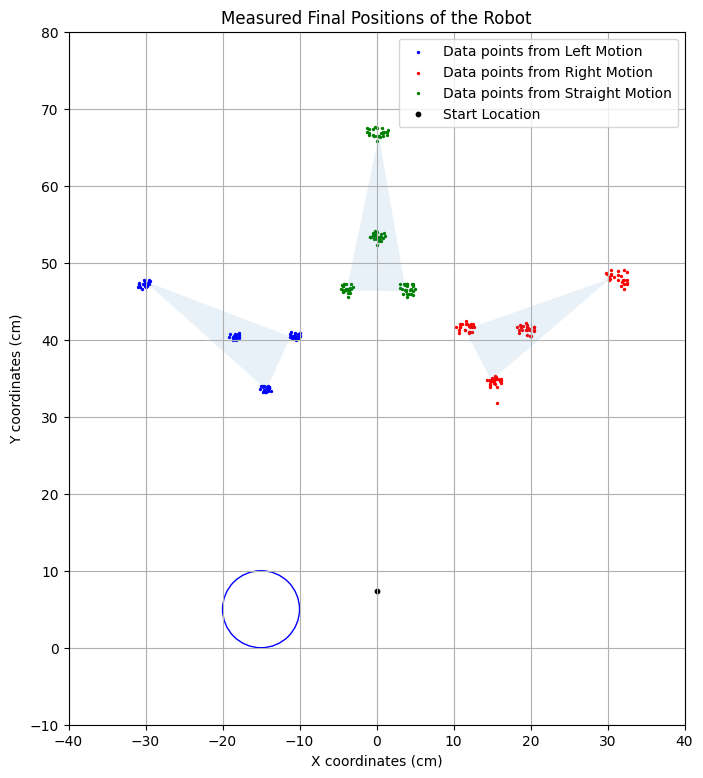

In [8]:
#-------------------------------------------------------------------
# Load the data
columns = ['Final Robot Pose X (cm)', 'Final Robot Pose Y (cm)', 'θ (degrees)']
df_left = pd.read_csv('CSVs/SEE - Left.csv', usecols=columns)
df_right = pd.read_csv('CSVs/SEE - Right.csv', usecols=columns)
df_straight = pd.read_csv('CSVs/SEE - Straight.csv', usecols=columns)

# Set origin
origin = (0, 7.4)

# Plot dotted lines from origin to each point with specified slope
for i in range(0, 25):
    point_left = (df_left['Final Robot Pose X (cm)'][i], df_left['Final Robot Pose Y (cm)'][i])
    theta_left = df_left['θ (degrees)'][i]

    point_right = (df_right['Final Robot Pose X (cm)'][i], df_right['Final Robot Pose Y (cm)'][i])
    theta_right = df_right['θ (degrees)'][i]

    point_straight = (df_straight['Final Robot Pose X (cm)'][i], df_straight['Final Robot Pose Y (cm)'][i])
    theta_straight = df_straight['θ (degrees)'][i]
    
    # Slope line based on theta
    slope = np.tan(np.radians(theta_left))  # Calculate slope from theta (theta in degrees to radians)
    
    # Plot the points
    plt.scatter(point_left[0], point_left[1], color='b', s=2, label='Data points from Left Motion' if i == 0 else "")
    plt.scatter(point_right[0], point_right[1], color='r', s=2, label='Data points from Right Motion' if i == 0 else "")
    plt.scatter(point_straight[0], point_straight[1], color='g', s=2, label='Data points from Straight Motion' if i == 0 else "")

#----------------------------------------------------------------------------------------------------

# Load the data for Front Pen
columns = ['Front Pen X (cm)', 'Front Pen Y (cm)', 'θ (degrees)']
df_left = pd.read_csv('CSVs/SEE - Left.csv', usecols=columns)
df_right = pd.read_csv('CSVs/SEE - Right.csv', usecols=columns)
df_straight = pd.read_csv('CSVs/SEE - Straight.csv', usecols=columns)

# Plot dotted lines from origin to each point with specified slope
for i in range(0, 25):
    point_left = (df_left['Front Pen X (cm)'][i], df_left['Front Pen Y (cm)'][i])
    point_right = (df_right['Front Pen X (cm)'][i], df_right['Front Pen Y (cm)'][i])
    point_straight = (df_straight['Front Pen X (cm)'][i], df_straight['Front Pen Y (cm)'][i])

    plt.scatter(point_left[0], point_left[1], color='b', s=2)
    plt.scatter(point_right[0], point_right[1], color='r', s=2)
    plt.scatter(point_straight[0], point_straight[1], color='g', s=2)

tri_point_left_1 = (point_left[0], point_left[1])
tri_point_right_1 = (point_right[0], point_right[1])
tri_point_straight_1 = (point_straight[0], point_straight[1])

#----------------------------------------------------------------------------------------------------

# Load the data for Back Left Pen
columns = ['Back Left Pen X (cm)', 'Back Left Pen Y (cm)', 'θ (degrees)']
df_left = pd.read_csv('CSVs/SEE - Left.csv', usecols=columns)
df_right = pd.read_csv('CSVs/SEE - Right.csv', usecols=columns)
df_straight = pd.read_csv('CSVs/SEE - Straight.csv', usecols=columns)

# Plot dotted lines from origin to each point with specified slope
for i in range(0, 25):
    point_left = (df_left['Back Left Pen X (cm)'][i], df_left['Back Left Pen Y (cm)'][i])
    point_right = (df_right['Back Left Pen X (cm)'][i], df_right['Back Left Pen Y (cm)'][i])
    point_straight = (df_straight['Back Left Pen X (cm)'][i], df_straight['Back Left Pen Y (cm)'][i])

    plt.scatter(point_left[0], point_left[1], color='b', s=2)
    plt.scatter(point_right[0], point_right[1], color='r', s=2)
    plt.scatter(point_straight[0], point_straight[1], color='g', s=2)

tri_point_left_2 = (point_left[0], point_left[1])
tri_point_right_2 = (point_right[0], point_right[1])
tri_point_straight_2 = (point_straight[0], point_straight[1])

#----------------------------------------------------------------------------------------------------

# Load the data for Back Right Pen
columns = ['Back Right Pen X (cm)', 'Back Right Pen Y (cm)', 'θ (degrees)']
df_left = pd.read_csv('CSVs/SEE - Left.csv', usecols=columns)
df_right = pd.read_csv('CSVs/SEE - Right.csv', usecols=columns)
df_straight = pd.read_csv('CSVs/SEE - Straight.csv', usecols=columns)

# Plot dotted lines from origin to each point with specified slope
for i in range(0, 25):
    point_left = (df_left['Back Right Pen X (cm)'][i], df_left['Back Right Pen Y (cm)'][i])
    point_right = (df_right['Back Right Pen X (cm)'][i], df_right['Back Right Pen Y (cm)'][i])
    point_straight = (df_straight['Back Right Pen X (cm)'][i], df_straight['Back Right Pen Y (cm)'][i])

    plt.scatter(point_left[0], point_left[1], color='b', s=2)
    plt.scatter(point_right[0], point_right[1], color='r', s=2)
    plt.scatter(point_straight[0], point_straight[1], color='g', s=2)

tri_point_left_3 = (point_left[0], point_left[1])
tri_point_right_3 = (point_right[0], point_right[1])
tri_point_straight_3 = (point_straight[0], point_straight[1])

#----------------------------------------------------------------------------------------------------

# Final scatter plot with labels
plt.scatter(0, 7.4, color='k', s=10, label="Start Location")

# Create triangle between the three points
triangle_left = Polygon([tri_point_left_1, tri_point_left_2, tri_point_left_3], closed=True, alpha=0.1)
plt.gca().add_patch(triangle_left)

triangle_right = Polygon([tri_point_right_1, tri_point_right_2, tri_point_right_3], closed=True, alpha=0.1)
plt.gca().add_patch(triangle_right)

triangle_straight = Polygon([tri_point_straight_1, tri_point_straight_2, tri_point_straight_3], closed=True, alpha=0.1)
plt.gca().add_patch(triangle_straight)

circ = plt.Circle((-15, 5), radius=5, edgecolor='b', facecolor='None')

# Set axis limits
ax = plt.gca()
ax.set_xlim([-40, 40])
ax.set_ylim([-10, 80])
ax.add_patch(circ)
ax.set_aspect('equal', 'box')

# Add labels and legend
plt.title("Measured Final Positions of the Robot")
plt.xlabel('X coordinates (cm)')
plt.ylabel('Y coordinates (cm)')
plt.legend()

# Set figure size and save plot
fig = plt.gcf()
fig.set_size_inches(14, 9)
plt.grid()
fig.savefig('test2png.png', dpi=100)

# Show plot
plt.show()


We also take 3 trial runs of the robot to visualize the encoder path to get better understanding.

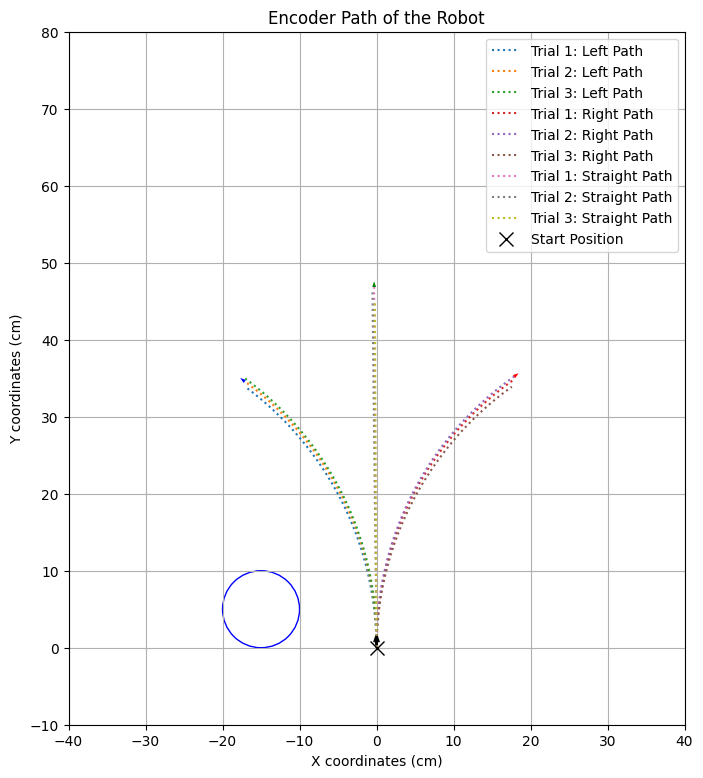

In [9]:
# Load the left_path CSV file
columns = ['x1', 'y1', 'theta1', 'x2', 'y2', 'theta2', 'x3', 'y3', 'theta3']
df_path_left = pd.read_csv('CSVs/left_path.csv', usecols=columns)
df_path_right = pd.read_csv('CSVs/right_path.csv', usecols=columns)
df_path_straight = pd.read_csv('CSVs/straight_path.csv', usecols=columns)

# Extract the x and y coordinates
x_values_left_1 = df_path_left['x1']
y_values_left_1 = df_path_left['y1']
x_values_left_2 = df_path_left['x2']
y_values_left_2 = df_path_left['y2']
x_values_left_3 = df_path_left['x3']
y_values_left_3 = df_path_left['y3']

x_values_right_1 = df_path_right['x1']
y_values_right_1 = df_path_right['y1']
x_values_right_2 = df_path_right['x2']
y_values_right_2 = df_path_right['y2']
x_values_right_3 = df_path_right['x3']
y_values_right_3 = df_path_right['y3']

x_values_straight_1 = df_path_straight['x1']
y_values_straight_1 = df_path_straight['y1']
x_values_straight_2 = df_path_straight['x2']
y_values_straight_2 = df_path_straight['y2']
x_values_straight_3 = df_path_straight['x3']
y_values_straight_3 = df_path_straight['y3']

# Plot the dotted lines passing through all the points
plt.plot(x_values_left_1, y_values_left_1, ':', label="Trial 1: Left Path")
plt.plot(x_values_left_2, y_values_left_2, ':', label="Trial 2: Left Path")
plt.plot(x_values_left_3, y_values_left_3, ':', label="Trial 3: Left Path")

plt.plot(x_values_right_1, y_values_right_1, ':', label="Trial 1: Right Path")
plt.plot(x_values_right_2, y_values_right_2, ':', label="Trial 2: Right Path")
plt.plot(x_values_right_3, y_values_right_3, ':', label="Trial 3: Right Path")

plt.plot(x_values_straight_1, y_values_straight_1, ':', label="Trial 1: Straight Path")
plt.plot(x_values_straight_2, y_values_straight_2, ':', label="Trial 2: Straight Path")
plt.plot(x_values_straight_3, y_values_straight_3, ':', label="Trial 3: Straight Path")

# Add arrows at the end of each path
def add_arrows(x_values, y_values, color):
    plt.arrow(x_values.iloc[-2], y_values.iloc[-2], 
              x_values.iloc[-1] - x_values.iloc[-2], 
              y_values.iloc[-1] - y_values.iloc[-2], 
              shape='full', lw=0, length_includes_head=False, head_width=0.5, color=color)

add_arrows(x_values_left_1, y_values_left_1, color='b')
add_arrows(x_values_left_2, y_values_left_2, color='b')
add_arrows(x_values_left_3, y_values_left_3, color='b')

add_arrows(x_values_right_1, y_values_right_1, color='r')
add_arrows(x_values_right_2, y_values_right_2, color='r')
add_arrows(x_values_right_3, y_values_right_3, color='r')

add_arrows(x_values_straight_1, y_values_straight_1, color='g')
add_arrows(x_values_straight_2, y_values_straight_2, color='g')
add_arrows(x_values_straight_3, y_values_straight_3, color='g')

# Plot a thick black arrow and cross mark at the start position (0,0)
plt.plot(0, 0, 'kx', markersize=10, label="Start Position")  # Cross mark at (0, 0)
plt.arrow(0, 0.5, 0, 1, shape='full', lw=2, length_includes_head=True, head_width=0.4, color='black', zorder=10)  # Thick black arrow

circ = plt.Circle((-15, 5), radius=5, edgecolor='b', facecolor='None')

# Set axis limits if needed (adjust based on the data range)
ax = plt.gca()
ax.set_xlim([-40, 40])
ax.set_ylim([-10, 80])
ax.add_patch(circ)
ax.set_aspect('equal', 'box')

# Add labels and legend
plt.title("Encoder Path of the Robot")
plt.xlabel('X coordinates (cm)')
plt.ylabel('Y coordinates (cm)')
plt.legend()  # Display the labels

# Set figure size and save plot
fig = plt.gcf()
fig.set_size_inches(14, 9)
plt.grid()
fig.savefig('test2png.png', dpi=100)

# Show plot
plt.show()

We visualize Robot's final Poses that we measured during the manual measurement process.

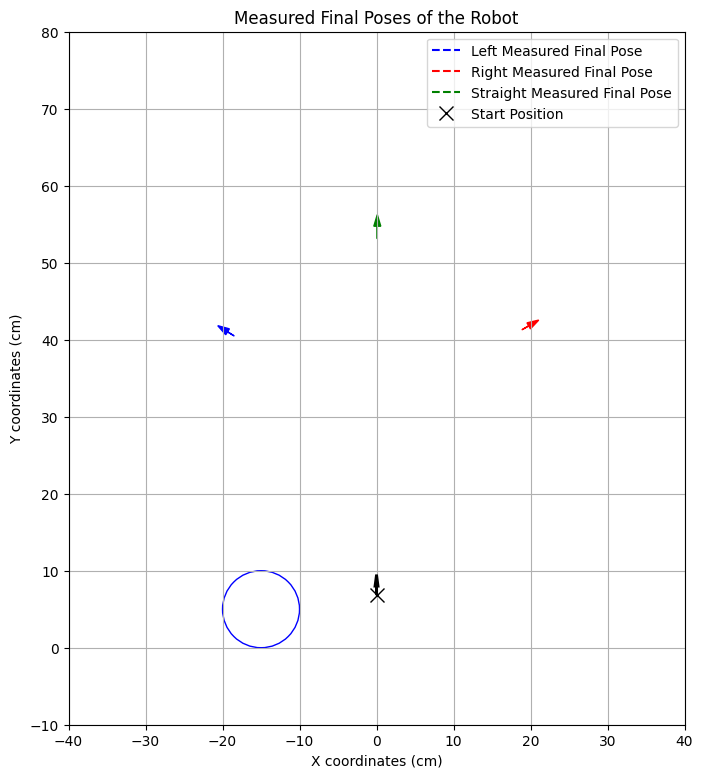

In [10]:
# # Load the data
# columns = ['x', 'y', 'theta']
# df_left = pd.read_csv('left_poses.csv', usecols=columns)
# df_right = pd.read_csv('right_poses.csv', usecols=columns)
# df_straight = pd.read_csv('straight_poses.csv', usecols=columns)

# Load the data
columns = ['Final Robot Pose X (cm)', 'Final Robot Pose Y (cm)', 'final_theta_radians']
df_left = pd.read_csv('CSVs/SEE - Left1.csv', usecols=columns)
df_right = pd.read_csv('CSVs/SEE - Right1.csv', usecols=columns)
df_straight = pd.read_csv('CSVs/SEE - Straight1.csv', usecols=columns)

# Set origin
origin = (0, 6.8)

idx = 1

# Plot the paths (without arrows) for left, right, and straight paths
plt.plot(df_left['Final Robot Pose X (cm)'][:idx], df_left['Final Robot Pose Y (cm)'][:idx], 'b--', label="Left Measured Final Pose")
plt.plot(df_right['Final Robot Pose X (cm)'][:idx], df_right['Final Robot Pose Y (cm)'][:idx], 'r--', label="Right Measured Final Pose")
plt.plot(df_straight['Final Robot Pose X (cm)'][:idx], df_straight['Final Robot Pose Y (cm)'][:idx], 'g--', label="Straight Measured Final Pose")

# Adding arrow only at the final point of each path
final_idx = 24  # Final index to add the arrow (25th point)

#-------------------------------------------------------

# Left path arrow (final point)
x_final_left = df_left['Final Robot Pose X (cm)'][final_idx]
y_final_left = df_left['Final Robot Pose Y (cm)'][final_idx]
theta_left = df_left.final_theta_radians[final_idx]

# Calculate arrow components using theta (radians)
arrow_dx_left = np.cos(theta_left)  # x-component of arrow direction
arrow_dy_left = np.sin(theta_left)  # y-component of arrow direction

# Plot the arrow pointing in the slope direction (left path)
plt.arrow(x_final_left, y_final_left, arrow_dx_left, arrow_dy_left,
          length_includes_head=False, head_width=0.9, head_length=1.5, fc='b', ec='b')

#-------------------------------------------------------

# Right path arrow (final point)
x_final_right = df_right['Final Robot Pose X (cm)'][final_idx]
y_final_right = df_right['Final Robot Pose Y (cm)'][final_idx]
theta_right = df_right.final_theta_radians[final_idx]

# Calculate arrow components using theta
arrow_dx_right = np.cos(theta_right)
arrow_dy_right = np.sin(theta_right)

# Plot the arrow pointing in the slope direction (right path)
plt.arrow(x_final_right, y_final_right, arrow_dx_right, arrow_dy_right,
          length_includes_head=False, head_width=0.9, head_length=1.5, fc='r', ec='r')

#-------------------------------------------------------

# Straight path arrow (final point)
x_final_straight = df_straight['Final Robot Pose X (cm)'][final_idx]
y_final_straight = df_straight['Final Robot Pose Y (cm)'][final_idx]
theta_straight = df_straight.final_theta_radians[final_idx]

# Calculate arrow components using theta
# arrow_dx_straight = np.cos(theta_straight)
# arrow_dy_straight = np.sin(theta_straight)
arrow_dx_straight = 0
arrow_dy_straight = np.pi

# Plot the arrow pointing in the slope direction (straight path)
plt.arrow(x_final_straight, y_final_straight, arrow_dx_straight, arrow_dy_straight,
          length_includes_head=True, head_width=0.9, head_length=1.5, fc='g', ec='g')

#-------------------------------------------------------
# Plot a thick black arrow and cross mark at the start position (0,0)
plt.plot(0, 6.8, 'kx', markersize=10, label="Start Position")  # Cross mark at (0, 0)
plt.arrow(0, 7.0, 0, 1, shape='full', lw=2, length_includes_head=False, head_width=0.4, head_length=1.5, color='black', zorder=10)  # Thick black arrow

circ = plt.Circle((-15, 5), radius=5, edgecolor='b', facecolor='None')

# Set axis limits
ax = plt.gca()
ax.set_xlim([-40, 40])
ax.set_ylim([-10, 80])
ax.add_patch(circ)
ax.set_aspect('equal', 'box')

# Add labels and legend
plt.title("Measured Final Poses of the Robot")
plt.xlabel('X coordinates (cm)')
plt.ylabel('Y coordinates (cm)')
plt.legend()

# Set figure size and save plot
fig = plt.gcf()
fig.set_size_inches(14, 9)
plt.grid()
#fig.savefig('test2png.png', dpi=100)

# Show plot
plt.show()

This figure shows the comparision between the robot path taken from <br> the encoder readings and the final pose measured manually. The difference in poses between the two readings is due to <br> (i) the difference in starting positions of the robot (the encoders consider the center of the robot as the start position and we take the centroid of the robot as the start which is located at the coordinate (0.0, 7.4)) <br> (ii) manual measurement errors.

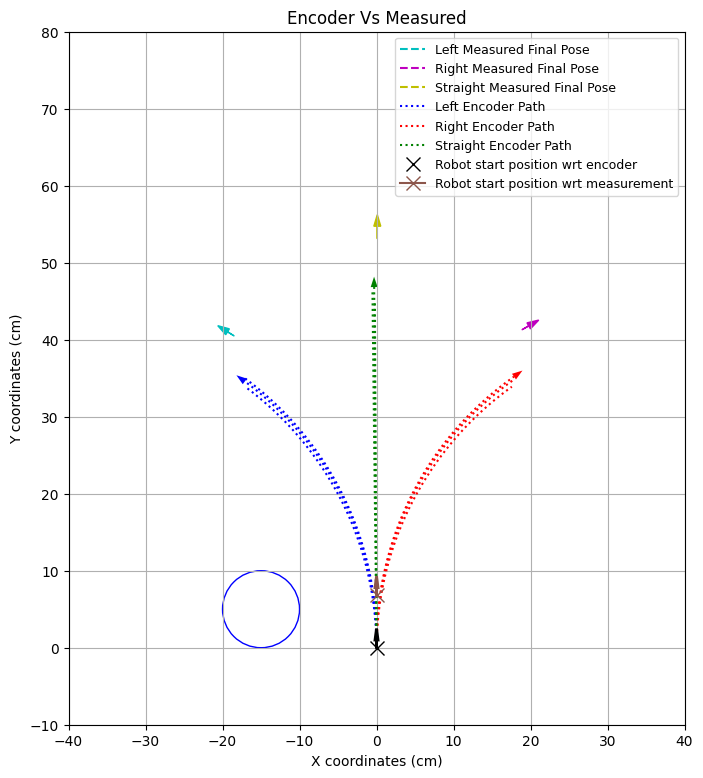

In [11]:
# Plot the paths (without arrows) for left, right, and straight paths
plt.plot(df_left['Final Robot Pose X (cm)'][:idx], df_left['Final Robot Pose Y (cm)'][:idx], 'c--', label="Left Measured Final Pose")
plt.plot(df_right['Final Robot Pose X (cm)'][:idx], df_right['Final Robot Pose Y (cm)'][:idx], 'm--', label="Right Measured Final Pose")
plt.plot(df_straight['Final Robot Pose X (cm)'][:idx], df_straight['Final Robot Pose Y (cm)'][:idx], 'y--', label="Straight Measured Final Pose")

# Plot the arrow pointing in the slope direction (left path)
plt.arrow(x_final_left, y_final_left, arrow_dx_left, arrow_dy_left,
          length_includes_head=False, head_width=0.9, head_length=1.5, fc='c', ec='c')

# Plot the arrow pointing in the slope direction (right path)
plt.arrow(x_final_right, y_final_right, arrow_dx_right, arrow_dy_right,
          length_includes_head=False, head_width=0.9, head_length=1.5, fc='m', ec='m')

# Plot the arrow pointing in the slope direction (straight path)
plt.arrow(x_final_straight, y_final_straight, arrow_dx_straight, arrow_dy_straight,
          length_includes_head=True, head_width=0.9, head_length=1.5, fc='y', ec='y')

#------------------------------------------------------------------------------

# Plot the dotted lines passing through all the points
plt.plot(x_values_left_1, y_values_left_1, 'b:', label="Left Encoder Path")
plt.plot(x_values_left_2, y_values_left_2, 'b:')
plt.plot(x_values_left_3, y_values_left_3, 'b:')

plt.plot(x_values_right_1, y_values_right_1, 'r:', label="Right Encoder Path")
plt.plot(x_values_right_2, y_values_right_2, 'r:')
plt.plot(x_values_right_3, y_values_right_3, 'r:')

plt.plot(x_values_straight_1, y_values_straight_1, 'g:', label="Straight Encoder Path")
plt.plot(x_values_straight_2, y_values_straight_2, 'g:')
plt.plot(x_values_straight_3, y_values_straight_3, 'g:')

# Add arrows at the end of each path
def add_arrows(x_values, y_values, color):
    plt.arrow(x_values.iloc[-2], y_values.iloc[-2], 
              x_values.iloc[-1] - x_values.iloc[-2], 
              y_values.iloc[-1] - y_values.iloc[-2], 
              shape='full', lw=0, length_includes_head=False, head_width=0.9, color=color)

add_arrows(x_values_left_1, y_values_left_1, color='b')
add_arrows(x_values_left_2, y_values_left_2, color='b')
add_arrows(x_values_left_3, y_values_left_3, color='b')

add_arrows(x_values_right_1, y_values_right_1, color='r')
add_arrows(x_values_right_2, y_values_right_2, color='r')
add_arrows(x_values_right_3, y_values_right_3, color='r')

add_arrows(x_values_straight_1, y_values_straight_1, color='g')
add_arrows(x_values_straight_2, y_values_straight_2, color='g')
add_arrows(x_values_straight_3, y_values_straight_3, color='g')

#--------------------------------------------------------------------------------------

plt.plot(0, 0, 'kx', markersize=10, label="Robot start position wrt encoder")  # Cross mark at (0, 0)
plt.arrow(0, 0, 0, 1, shape='full', lw=2, length_includes_head=False, head_width=0.4, head_length=1.5, color='black', zorder=10)  # Thick black arrow
plt.plot(0, 6.8, 'tab:brown', marker='x', markersize=10, label="Robot start position wrt measurement") 
plt.arrow(0, 6.8, 0, 1, shape='full', lw=2, length_includes_head=False, head_width=0.4, head_length=1.5, color='tab:brown', zorder=10)  # Thick black arrow

circ = plt.Circle((-15, 5), radius=5, edgecolor='b', facecolor='None')

# Set axis limits if needed (adjust based on the data range)
ax = plt.gca()
ax.set_xlim([-40, 40])
ax.set_ylim([-10, 80])
ax.add_patch(circ)
ax.set_aspect('equal', 'box')

# Add labels and legend
plt.title("Encoder Vs Measured")
plt.xlabel('X coordinates (cm)')
plt.ylabel('Y coordinates (cm)')
plt.legend(loc=1, prop={'size': 9})
# plt.legend()  # Display the labels

# Set figure size and save plot
fig = plt.gcf()
fig.set_size_inches(14, 9)
plt.grid()
fig.savefig('test2png.png', dpi=100)

# Show plot
plt.show()

Here is the comparison of the measured values with other groups.

Image reference Team 3.

![comparison](images/comparison.png)


<div style="flex: 50%; text-align: left;">
    <h2>2.5 Videos of the Marking</h2>
    <p>Here, is the link to google drive where we have added the way marking was done during the straight, left and right motions of the robot.</p>
   <a href="https://drive.google.com/drive/folders/1-Rbm5btrf4dHEUzmJJlXTnSdgr3fS-0f">Google Drive</a>
</div>

## 2.6 Grid Sheet

Here is the Grid Sheet that includes the markings that were made at the robot's end position.

![grid](images/markings.jpeg)

# Experiment 3: Manual Motion Observation: Statistical Evaluation

## 3.1 Outlier Detection

For the outlier detection we used two different ways:

1. Taking X-Y coordinates separately
2. Taking distance from origin 

### 3.1.1 Outlier Filtering 

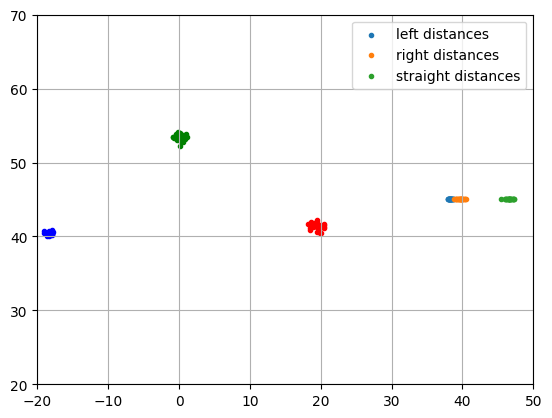

In [12]:
columns = ['final_x', 'final_y', 'final_theta']
df_left = pd.read_csv('CSVs/left_measured.csv', usecols=columns)
df_right = pd.read_csv('CSVs/right_measured.csv', usecols=columns)
df_straight = pd.read_csv('CSVs/straight_measured.csv', usecols=columns)
origin = np.array((0, 6.8))[np.newaxis, :]
#print(origin.shape)

plt.scatter(df_left.final_x, df_left.final_y, marker='.', color='b')
plt.scatter(df_right.final_x, df_right.final_y, marker='.', color='r')
plt.scatter(df_straight.final_x, df_straight.final_y, marker='.', color='g')

df_left_distances = []
df_right_distances = []
df_straight_distances = []

for i in range(0, 25):
    point_left = (df_left.final_x[i], df_left.final_y[i])
    df_left_dist = np.linalg.norm(point_left-origin)
    df_left_distances.append(df_left_dist)

    point_right = (df_right.final_x[i], df_right.final_y[i])
    df_right_dist = np.linalg.norm(point_right-origin)
    df_right_distances.append(df_right_dist)

    point_straight = (df_straight.final_x[i], df_straight.final_y[i])
    df_straight_dist = np.linalg.norm(point_straight-origin)
    df_straight_distances.append(df_straight_dist)

df_left_distances = np.array(df_left_distances)[:, np.newaxis]
arr = np.ones((df_left_distances.shape)) * 45
plt.scatter(df_left_distances, arr, marker='.', label='left distances')

df_right_distances = np.array(df_right_distances)[:, np.newaxis]
arr = np.ones((df_right_distances.shape)) * 45
plt.scatter(df_right_distances, arr, marker='.', label='right distances')

df_straight_distances = np.array(df_straight_distances)[:, np.newaxis]
arr = np.ones((df_straight_distances.shape)) * 45
plt.scatter(df_straight_distances, arr, marker='.', label='straight distances')

ax = plt.gca()
ax.set_xlim(-20, 50)
ax.set_ylim(20, 70)
ax.grid()
ax.set_aspect('auto', 'datalim', 'S')
plt.legend()
plt.show()

def get_inliers(data, pp1):
    '''
    Single pass of Chebyshev Outlier removal
    '''
    mu1 = np.mean(data)
    sigma1 = np.std(data)
    k1 = 1. / np.sqrt(pp1)
    odv1u = mu1 + (k1 * sigma1)
    odv1l = mu1 - (k1 * sigma1)

    # inlier_indices = np.where((data <= odv1u) & (data >= odv1l))[0]
    inlier_indices = np.where((data <= odv1u))[0]
    return inlier_indices

### Outlier Detection in Left Motion

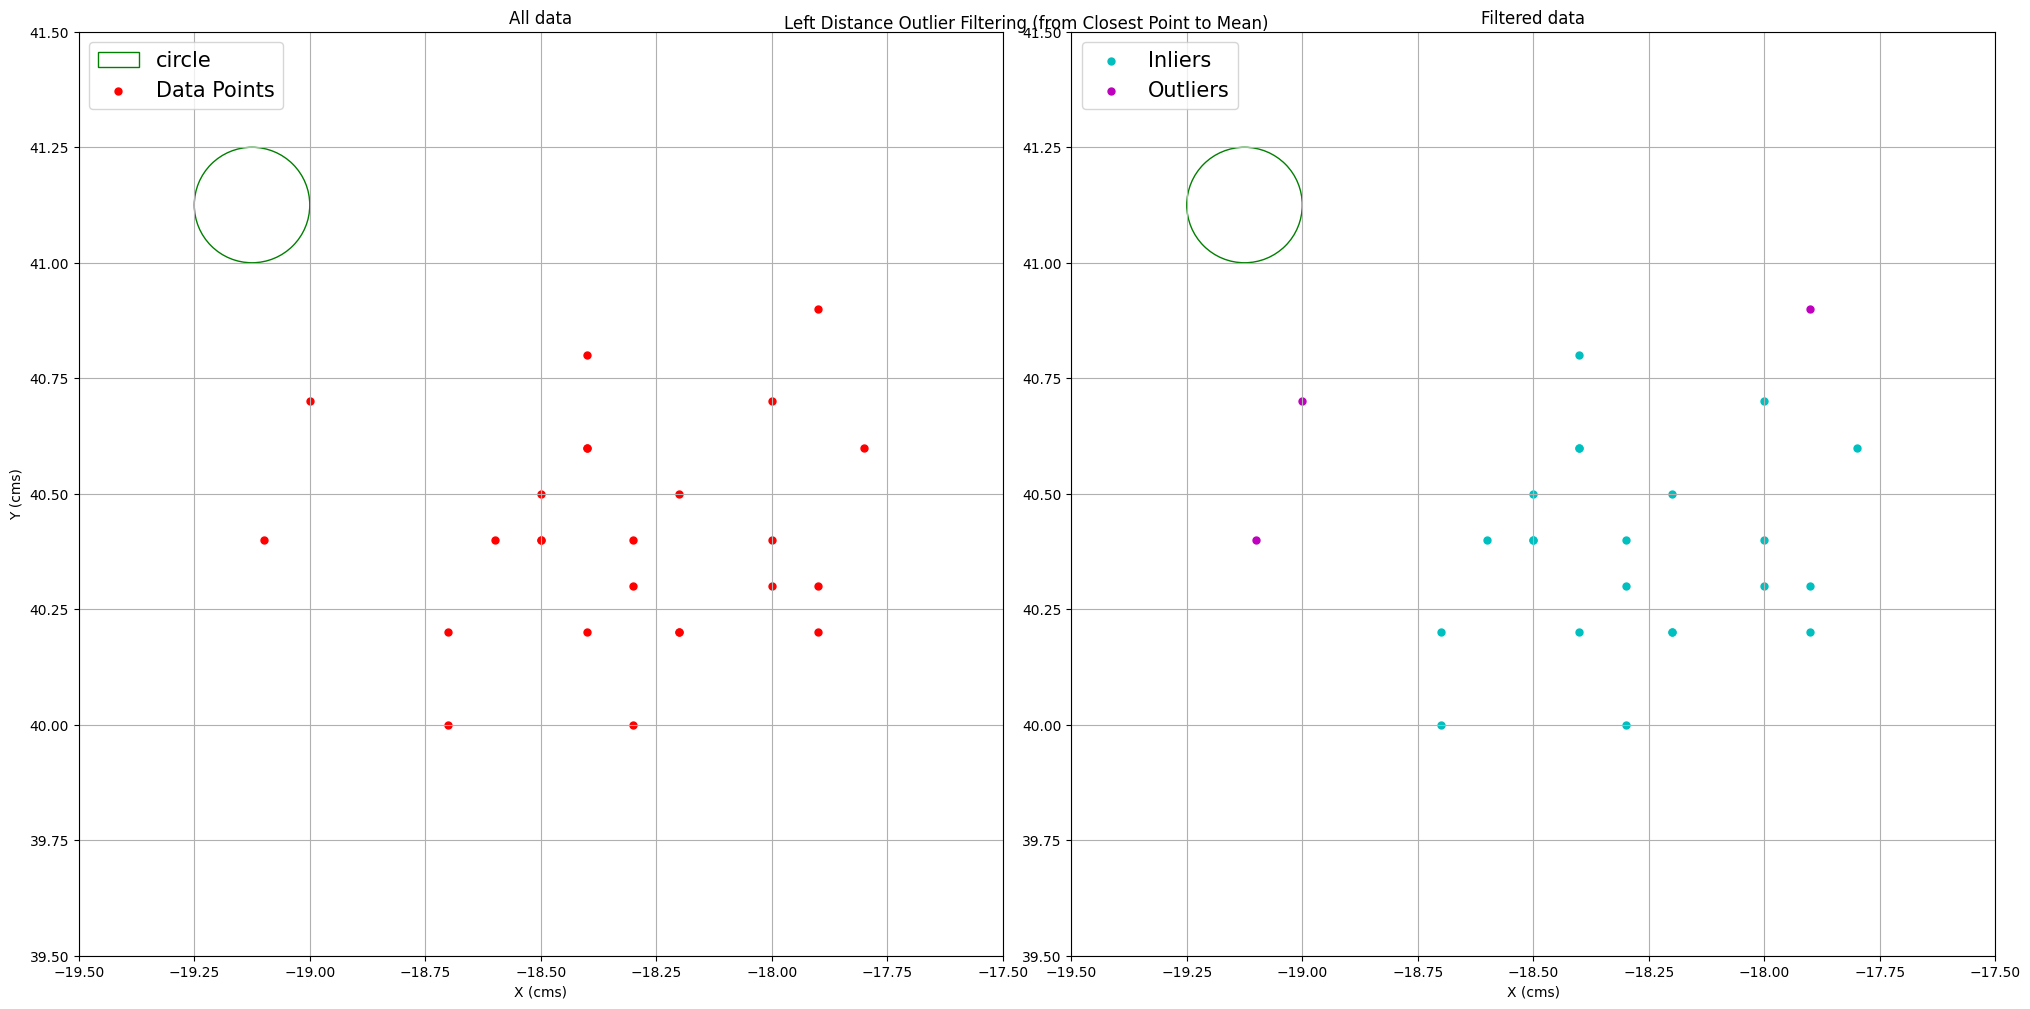

In [13]:
# Compute mean of x and y for df_left
mean_x = np.mean(df_left.final_x)
mean_y = np.mean(df_left.final_y)

# Find the point closest to the mean
distances_to_mean = np.sqrt((df_left.final_x - mean_x)**2 + (df_left.final_y - mean_y)**2)
closest_index = np.argmin(distances_to_mean)
closest_x, closest_y = df_left.final_x.iloc[closest_index], df_left.final_y.iloc[closest_index]

# Update the circle to reflect the new reference point
circ = plt.Circle((-19.125, 41.125), radius=0.125, edgecolor='g', facecolor='None', label='circle')
circ2 = plt.Circle((-19.125, 41.125), radius=0.125, edgecolor='g', facecolor='None')

# Plot setup
fig, ax = plt.subplots(1, 2)
ax[0].set_title('All data')
ax[1].set_title('Filtered data')

fig.set_figheight(10)
fig.set_figwidth(20)
fig.tight_layout()

for axis in ax:
    axis.set_aspect('equal', 'box')
    axis.grid()
    axis.set_xlim([-19.5, -17.5])
    axis.set_ylim([39.5, 41.5])
    axis.set_xlabel('X (cms)')
ax[0].set_ylabel('Y (cms)')

# Add updated circles to mark the closest point to the mean
ax[0].add_patch(circ)
ax[1].add_patch(circ2)
fig.suptitle('Left Distance Outlier Filtering (from Closest Point to Mean)')

# Plot initial data
ax[0].scatter(df_left.final_x, df_left.final_y, marker='.', s=100, color='red', label='Data Points')

# Chebyshev parameter
p1 = 0.5

left_x_vals = df_left.final_x.to_numpy()
left_y_vals = df_left.final_y.to_numpy()

# Calculate the distances from the closest point instead of the origin
df_left_distances = np.sqrt((df_left.final_x - closest_x)**2 + (df_left.final_y - closest_y)**2)

# First pass - Filter based on distances from the closest point
left_inlier_indices = get_inliers(df_left_distances, pp1=p1)
left_inlier_indices = np.array(left_inlier_indices)

# Extract inlier and outlier x/y coordinates
left_x_inliers = df_left.final_x[left_inlier_indices]
left_y_inliers = df_left.final_y[left_inlier_indices]

left_x_outliers = np.delete(left_x_vals, left_inlier_indices)
left_y_outliers = np.delete(left_y_vals, left_inlier_indices)

# Plot filtered inliers and outliers
ax[1].scatter(left_x_inliers, left_y_inliers, marker='.', s=100, color='c', label='Inliers')
ax[1].scatter(left_x_outliers, left_y_outliers, marker='.', s=100, color='m', label='Outliers')

# Add legends and labels
ax[1].legend(loc='upper left', prop={'size': 15})
ax[0].legend(loc='upper left', prop={'size': 15})

plt.show()

### Outlier Detection in Right Motion

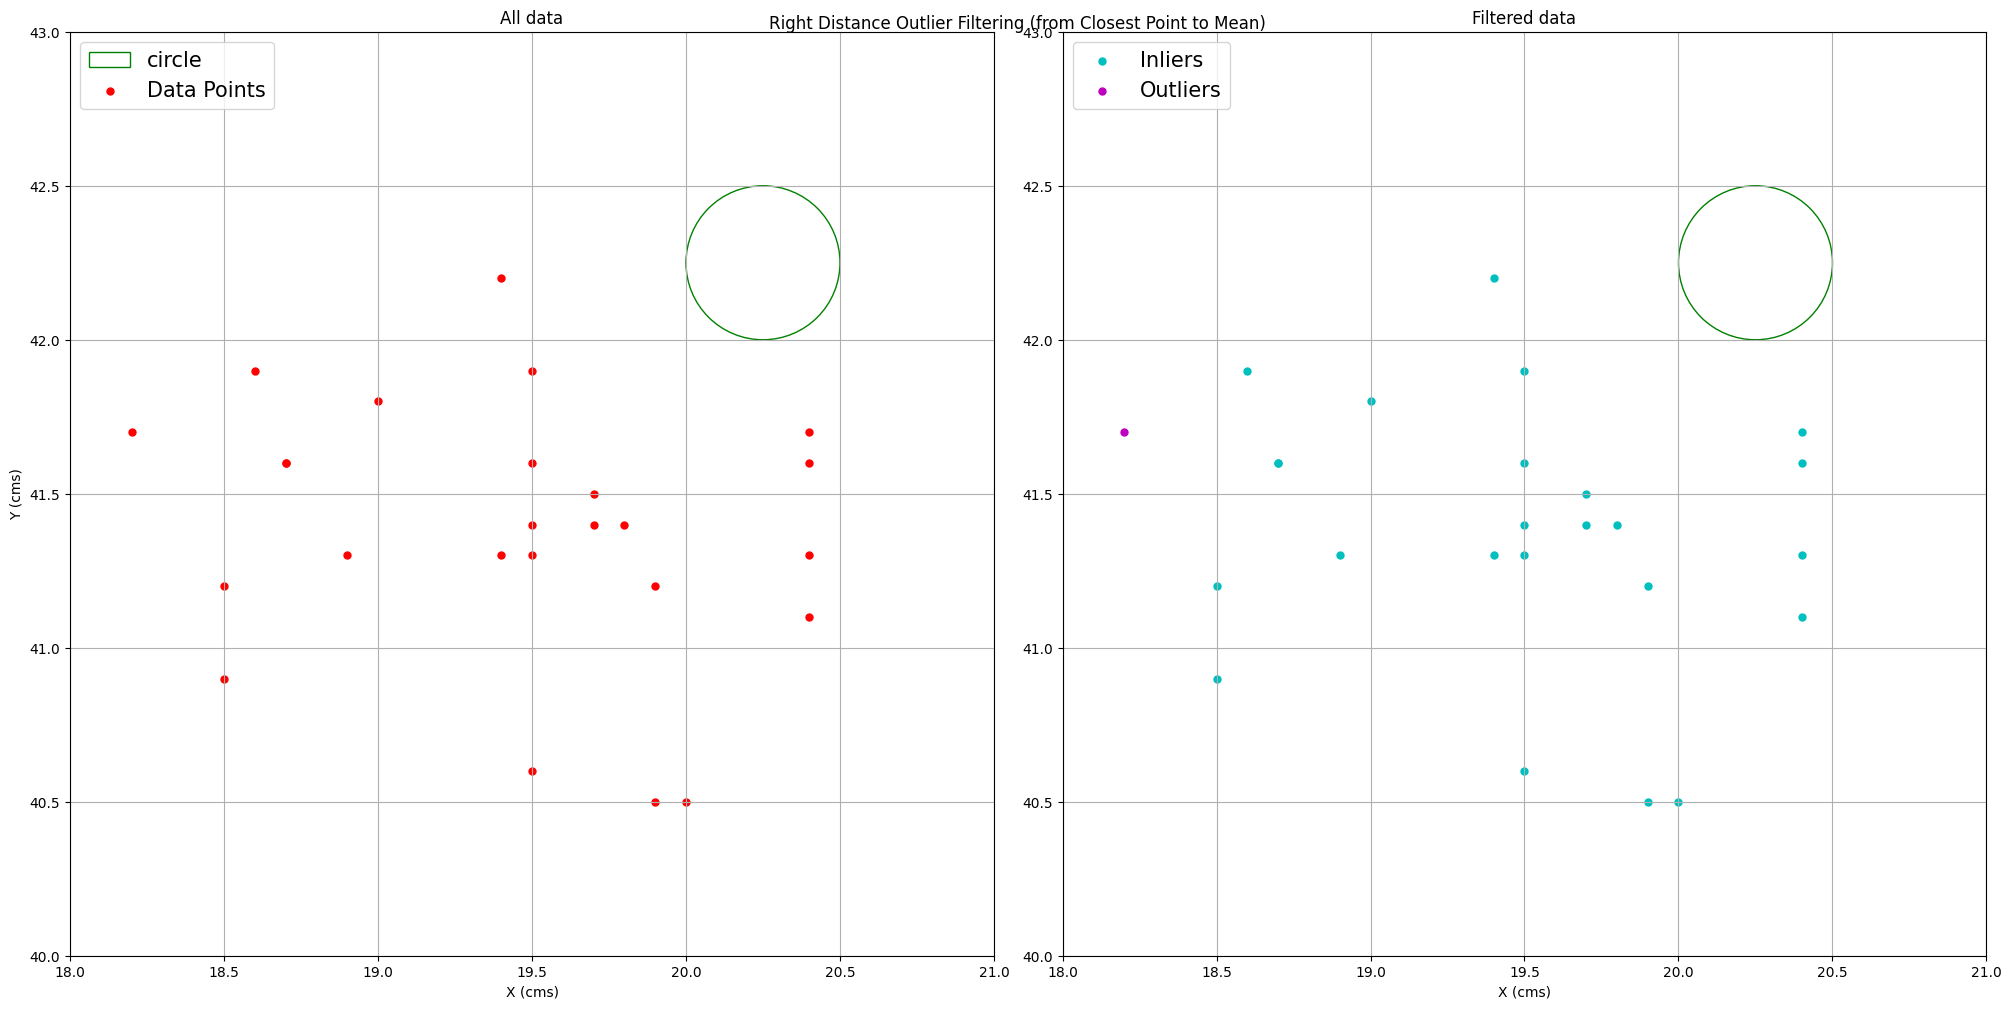

In [14]:
# Compute mean of x and y for df_right
mean_x = np.mean(df_right.final_x)
mean_y = np.mean(df_right.final_y)

# Find the point closest to the mean
distances_to_mean = np.sqrt((df_right.final_x - mean_x)**2 + (df_right.final_y - mean_y)**2)
closest_index = np.argmin(distances_to_mean)
closest_x, closest_y = df_right.final_x.iloc[closest_index], df_right.final_y.iloc[closest_index]

# Update the circle to reflect the new reference point
circ = plt.Circle((20.25, 42.25), radius=0.25, edgecolor='g', facecolor='None', label='circle')
circ2 = plt.Circle((20.25, 42.25), radius=0.25, edgecolor='g', facecolor='None')

# Plot setup
fig, ax = plt.subplots(1, 2)
ax[0].set_title('All data')
ax[1].set_title('Filtered data')

fig.set_figheight(10)
fig.set_figwidth(20)
fig.tight_layout()

for axis in ax:
    axis.set_aspect('equal', 'box')
    axis.grid()
    axis.set_xlim([18, 21])
    axis.set_ylim([40, 43])
    axis.set_xlabel('X (cms)')
ax[0].set_ylabel('Y (cms)')

# Add updated circles to mark the closest point to the mean
ax[0].add_patch(circ)
ax[1].add_patch(circ2)
fig.suptitle('Right Distance Outlier Filtering (from Closest Point to Mean)')

# Plot initial data
ax[0].scatter(df_right.final_x, df_right.final_y, marker='.', s=100, color='red', label='Data Points')

# Chebyshev parameter
p1 = 0.5

right_x_vals = df_right.final_x.to_numpy()
right_y_vals = df_right.final_y.to_numpy()

# Calculate the distances from the closest point instead of the origin
df_right_distances = np.sqrt((df_right.final_x - closest_x)**2 + (df_right.final_y - closest_y)**2)

# First pass - Filter based on distances from the closest point
right_inlier_indices = get_inliers(df_right_distances, pp1=p1)
right_inlier_indices = np.array(right_inlier_indices)

# Extract inlier and outlier x/y coordinates
right_x_inliers = df_right.final_x[right_inlier_indices]
right_y_inliers = df_right.final_y[right_inlier_indices]

right_x_outliers = np.delete(right_x_vals, right_inlier_indices)
right_y_outliers = np.delete(right_y_vals, right_inlier_indices)

# Plot filtered inliers and outliers
ax[1].scatter(right_x_inliers, right_y_inliers, marker='.', s=100, color='c', label='Inliers')
ax[1].scatter(right_x_outliers, right_y_outliers, marker='.', s=100, color='m', label='Outliers')

# Add legends and labels
ax[1].legend(loc='upper left', prop={'size': 15})
ax[0].legend(loc='upper left', prop={'size': 15})

plt.show()

### Outlier Detection in Straight Motion

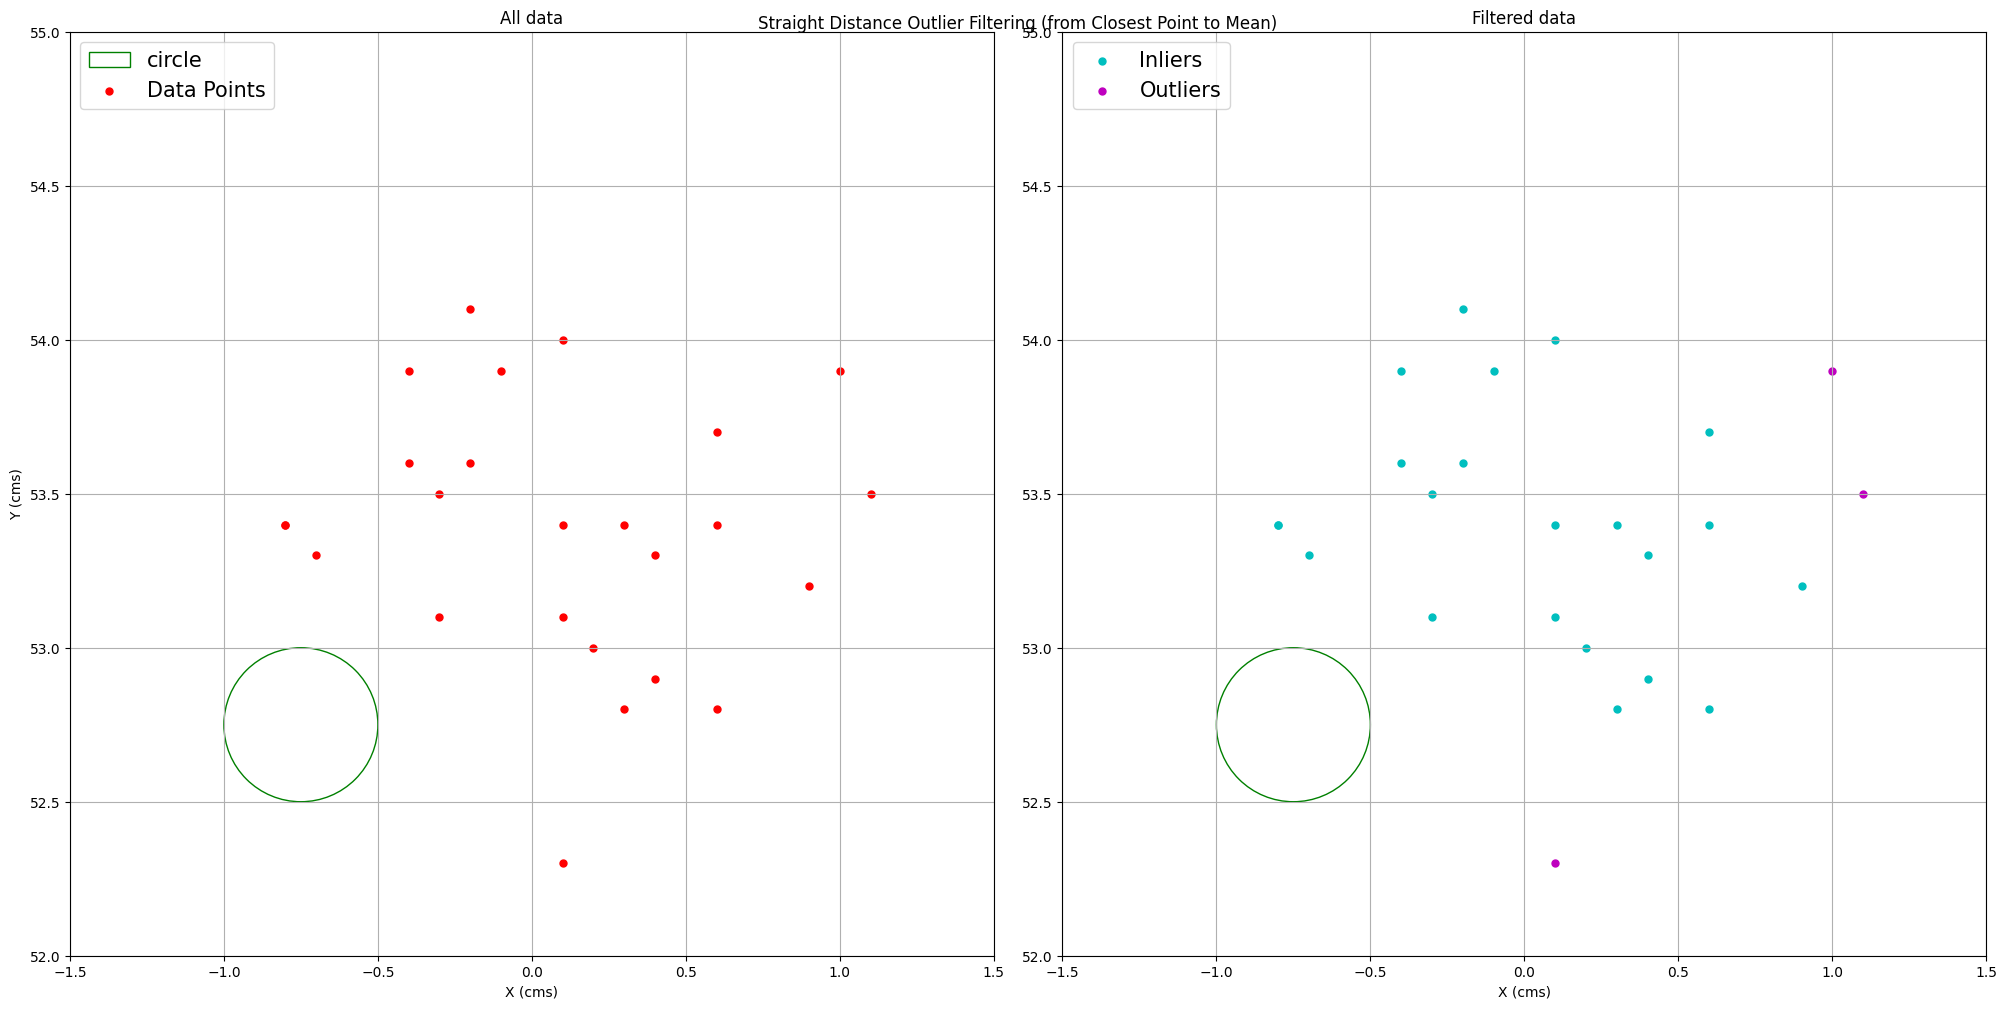

In [15]:
# Compute mean of x and y for df_straight
mean_x = np.mean(df_straight.final_x)
mean_y = np.mean(df_straight.final_y)

# Find the point closest to the mean
distances_to_mean = np.sqrt((df_straight.final_x - mean_x)**2 + (df_straight.final_y - mean_y)**2)
closest_index = np.argmin(distances_to_mean)
closest_x, closest_y = df_straight.final_x.iloc[closest_index], df_straight.final_y.iloc[closest_index]

# Update the circle to reflect the new reference point
circ = plt.Circle((-0.75, 52.75), radius=0.25, edgecolor='g', facecolor='None', label='circle')
circ2 = plt.Circle((-0.75, 52.75), radius=0.25, edgecolor='g', facecolor='None')

# Plot setup
fig, ax = plt.subplots(1, 2)
ax[0].set_title('All data')
ax[1].set_title('Filtered data')

fig.set_figheight(10)
fig.set_figwidth(20)
fig.tight_layout()

for axis in ax:
    axis.set_aspect('equal', 'box')
    axis.grid()
    axis.set_xlim([-1.5, 1.5])
    axis.set_ylim([52, 55])
    axis.set_xlabel('X (cms)')
ax[0].set_ylabel('Y (cms)')

# Add updated circles to mark the closest point to the mean
ax[0].add_patch(circ)
ax[1].add_patch(circ2)
fig.suptitle('Straight Distance Outlier Filtering (from Closest Point to Mean)')

# Plot initial data
ax[0].scatter(df_straight.final_x, df_straight.final_y, marker='.', s=100, color='red', label='Data Points')

# Chebyshev parameter
p1 = 0.5

straight_x_vals = df_straight.final_x.to_numpy()
straight_y_vals = df_straight.final_y.to_numpy()

# Calculate the distances from the closest point instead of the origin
df_straight_distances = np.sqrt((df_straight.final_x - closest_x)**2 + (df_straight.final_y - closest_y)**2)

# First pass - Filter based on distances from the closest point
straight_inlier_indices = get_inliers(df_straight_distances, pp1=p1)
straight_inlier_indices = np.array(straight_inlier_indices)

# Extract inlier and outlier x/y coordinates
straight_x_inliers = df_straight.final_x[straight_inlier_indices]
straight_y_inliers = df_straight.final_y[straight_inlier_indices]

straight_x_outliers = np.delete(straight_x_vals, straight_inlier_indices)
straight_y_outliers = np.delete(straight_y_vals, straight_inlier_indices)

# Plot filtered inliers and outliers
ax[1].scatter(straight_x_inliers, straight_y_inliers, marker='.', s=100, color='c', label='Inliers')
ax[1].scatter(straight_x_outliers, straight_y_outliers, marker='.', s=100, color='m', label='Outliers')

# Add legends and labels
ax[1].legend(loc='upper left', prop={'size': 15})
ax[0].legend(loc='upper left', prop={'size': 15})

plt.show()


## 3.2 Gaussian Fitting 

We did gaussian fit on inlier points after outlier filtering

### Gaussian fitting on left motion

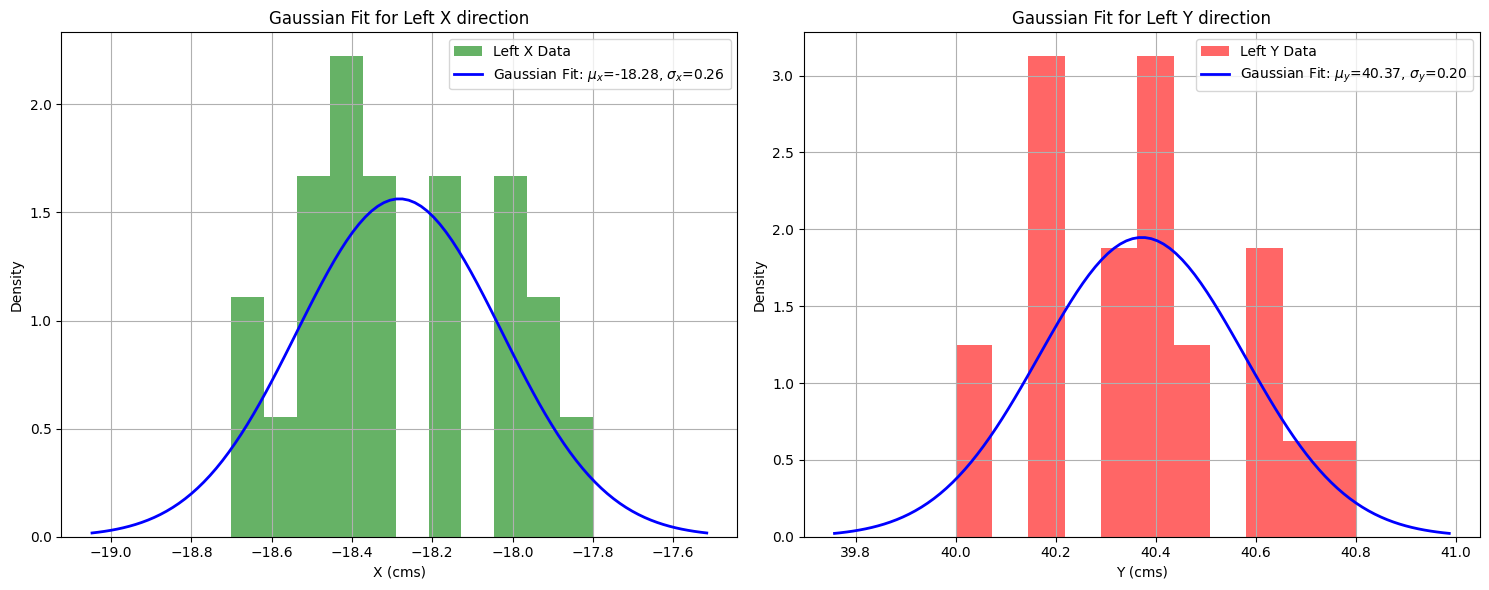

In [16]:
# Calculate the mean and standard deviation for the left side data
mu_x = np.mean(left_x_inliers)
sigma_x = np.std(left_x_inliers)

mu_y = np.mean(left_y_inliers)
sigma_y = np.std(left_y_inliers)

# Create a range of values for x and y
x_vals = np.linspace(mu_x - 3*sigma_x, mu_x + 3*sigma_x, 100)
y_vals = np.linspace(mu_y - 3*sigma_y, mu_y + 3*sigma_y, 100)

# Calculate the Gaussian (normal) distribution for x and y
pdf_x = norm.pdf(x_vals, mu_x, sigma_x)
pdf_y = norm.pdf(y_vals, mu_y, sigma_y)

# Plotting the Gaussian fit for the x direction
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].set_title('Gaussian Fit for Left X direction')
ax[0].hist(left_x_inliers, bins=11, density=True, alpha=0.6, color='g', label='Left X Data')
ax[0].plot(x_vals, pdf_x, color='blue', lw=2, label=f'Gaussian Fit: $\mu_x$={mu_x:.2f}, $\sigma_x$={sigma_x:.2f}')
ax[0].legend()

# Plotting the Gaussian fit for the y direction
ax[1].set_title('Gaussian Fit for Left Y direction')
ax[1].hist(left_y_inliers, bins=11, density=True, alpha=0.6, color='r', label='Left Y Data')
ax[1].plot(y_vals, pdf_y, color='blue', lw=2, label=f'Gaussian Fit: $\mu_y$={mu_y:.2f}, $\sigma_y$={sigma_y:.2f}')
ax[1].legend()

# Add labels and show the plot
ax[0].set_xlabel('X (cms)')
ax[0].set_ylabel('Density')
ax[1].set_xlabel('Y (cms)')
ax[1].set_ylabel('Density')

for axis in ax:
    axis.set_aspect('auto', 'box')
    axis.grid()
plt.tight_layout()
plt.show()

# fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

### Gaussian fitting on Right motion

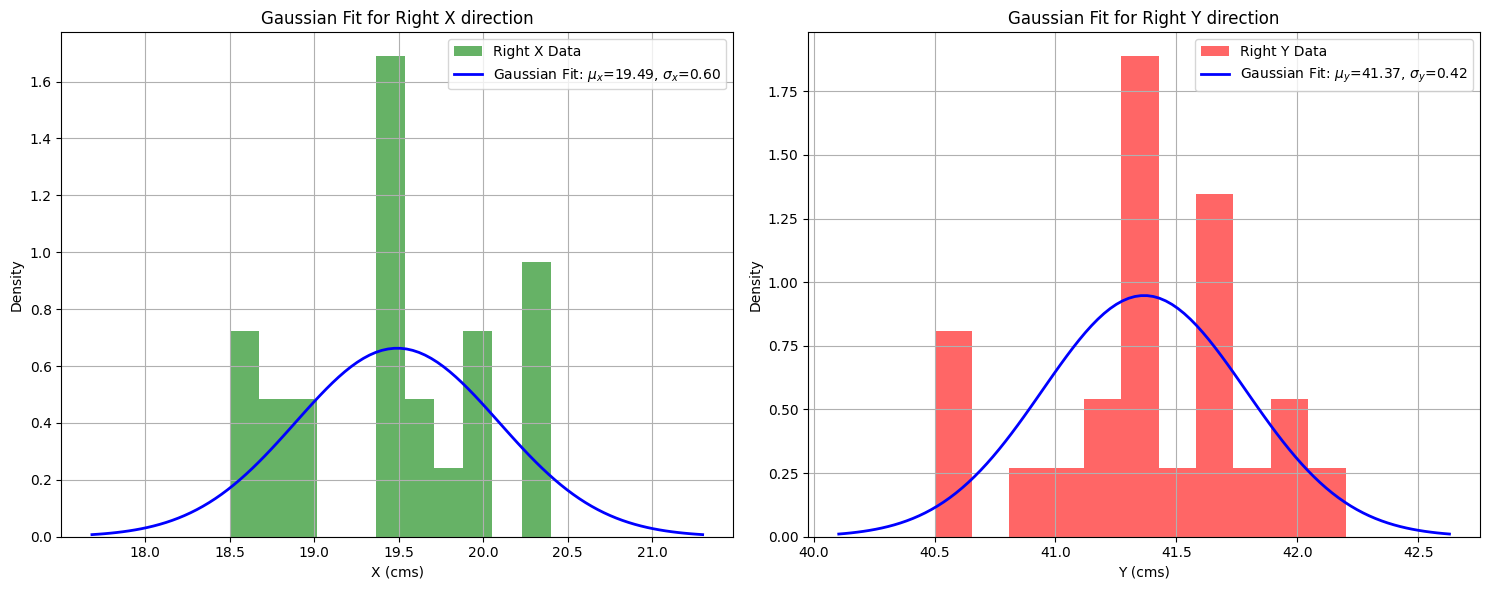

In [17]:
# Calculate the mean and standard deviation for the right side data
mu_x = np.mean(right_x_inliers)
sigma_x = np.std(right_x_inliers)

mu_y = np.mean(right_y_inliers)
sigma_y = np.std(right_y_inliers)

# Create a range of values for x and y
x_vals = np.linspace(mu_x - 3*sigma_x, mu_x + 3*sigma_x, 100)
y_vals = np.linspace(mu_y - 3*sigma_y, mu_y + 3*sigma_y, 100)

# Calculate the Gaussian (normal) distribution for x and y
pdf_x = norm.pdf(x_vals, mu_x, sigma_x)
pdf_y = norm.pdf(y_vals, mu_y, sigma_y)

# Plotting the Gaussian fit for the x direction
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].set_title('Gaussian Fit for Right X direction')
ax[0].hist(right_x_inliers, bins=11, density=True, alpha=0.6, color='g', label='Right X Data')
ax[0].plot(x_vals, pdf_x, color='blue', lw=2, label=f'Gaussian Fit: $\mu_x$={mu_x:.2f}, $\sigma_x$={sigma_x:.2f}')
ax[0].legend()

# Plotting the Gaussian fit for the y direction
ax[1].set_title('Gaussian Fit for Right Y direction')
ax[1].hist(right_y_inliers, bins=11, density=True, alpha=0.6, color='r', label='Right Y Data')
ax[1].plot(y_vals, pdf_y, color='blue', lw=2, label=f'Gaussian Fit: $\mu_y$={mu_y:.2f}, $\sigma_y$={sigma_y:.2f}')
ax[1].legend()

# Add labels and show the plot
ax[0].set_xlabel('X (cms)')
ax[0].set_ylabel('Density')
ax[1].set_xlabel('Y (cms)')
ax[1].set_ylabel('Density')

for axis in ax:
    axis.set_aspect('auto', 'box')
    axis.grid()
plt.tight_layout()
plt.show()

# fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

### Gaussian fitting on Straight motion

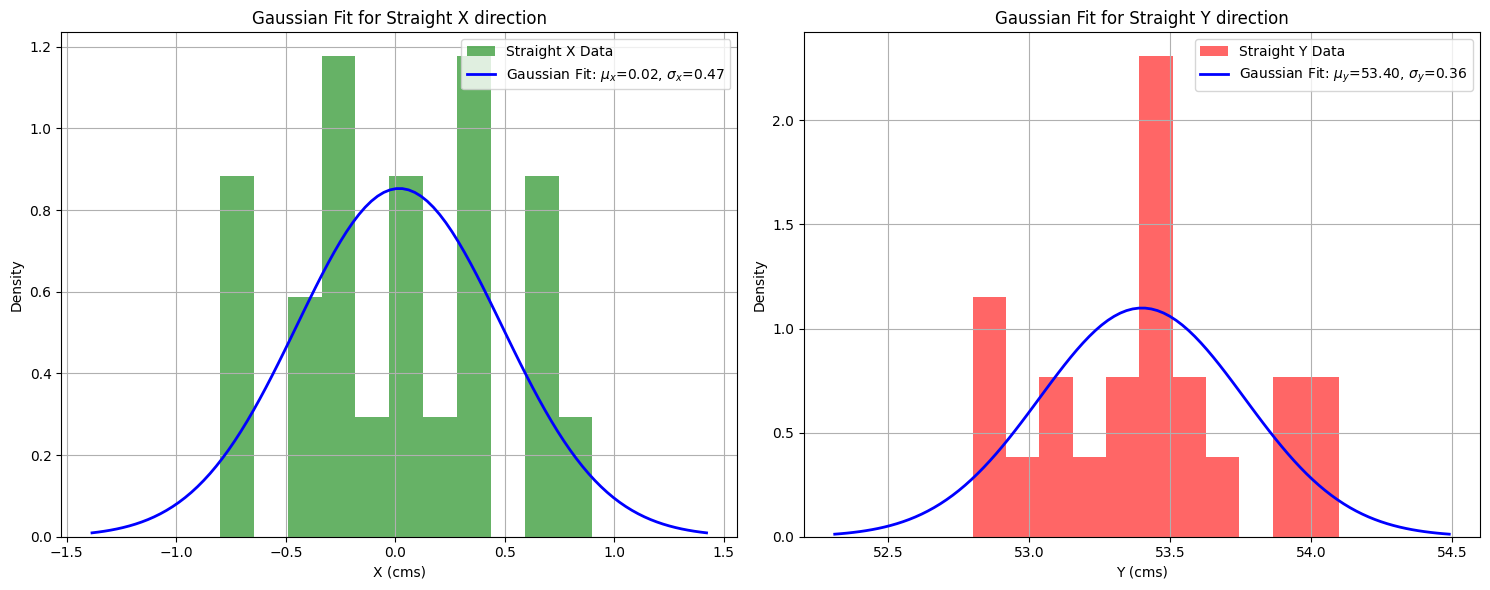

In [18]:
# Calculate the mean and standard deviation for the straight side data
mu_x = np.mean(straight_x_inliers)
sigma_x = np.std(straight_x_inliers)

mu_y = np.mean(straight_y_inliers)
sigma_y = np.std(straight_y_inliers)

# Create a range of values for x and y
x_vals = np.linspace(mu_x - 3*sigma_x, mu_x + 3*sigma_x, 100)
y_vals = np.linspace(mu_y - 3*sigma_y, mu_y + 3*sigma_y, 100)

# Calculate the Gaussian (normal) distribution for x and y
pdf_x = norm.pdf(x_vals, mu_x, sigma_x)
pdf_y = norm.pdf(y_vals, mu_y, sigma_y)

# Plotting the Gaussian fit for the x direction
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].set_title('Gaussian Fit for Straight X direction')
ax[0].hist(straight_x_inliers, bins=11, density=True, alpha=0.6, color='g', label='Straight X Data')
ax[0].plot(x_vals, pdf_x, color='blue', lw=2, label=f'Gaussian Fit: $\mu_x$={mu_x:.2f}, $\sigma_x$={sigma_x:.2f}')
ax[0].legend()

# Plotting the Gaussian fit for the y direction
ax[1].set_title('Gaussian Fit for Straight Y direction')
ax[1].hist(straight_y_inliers, bins=11, density=True, alpha=0.6, color='r', label='Straight Y Data')
ax[1].plot(y_vals, pdf_y, color='blue', lw=2, label=f'Gaussian Fit: $\mu_y$={mu_y:.2f}, $\sigma_y$={sigma_y:.2f}')
ax[1].legend()

# Add labels and show the plot
ax[0].set_xlabel('X (cms)')
ax[0].set_ylabel('Density')
ax[1].set_xlabel('Y (cms)')
ax[1].set_ylabel('Density')

for axis in ax:
    axis.set_aspect('auto', 'box')
    axis.grid()
plt.tight_layout()
plt.show()

# fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

## 3.3 List of Software and Libraries

- Jupyter Hub
- Numpy
- Pandas
- Matplotlib
- Scipy
- Statsmodels

Source code for the outlier removal, used from the lecture slides.

## 3.4 Data Analysing

Ques: When analysing the data with respect to the executed motions, which characteristic of the data do you establish here: the accuracy, the precision, or both?

Ans: When analysing the data with respect to the three motions; left, right and centre; we establish the precision of the data collected. Precision is a measure of how close the measurements are to each other. In this part of the experiment, when we calculate the mean and standard deviation of the data and then use them to eliminate outliers in the measured data, we are removing imprecise measurements. After that we plot a Gaussian distribution of the filtered data to visualise the precision of it. This can be seen by the fact that readings closer to the mean have a higher probability function and as we go farther from this mean, the probability of those readings decreases.

## 3.5 Analysis of Statistical Parameters

## 3.5.1 Analysis on Left Motion

In [19]:
file_path = 'CSVs/left_measured.csv' 
data = pd.read_csv(file_path)

# columns = ['final_x', 'final_y', 'final_theta'] 
# data_subset = data[columns].dropna() 

columns = [left_x_inliers, left_y_inliers] 

#table
means = []
variances = []
test_statistics = []
p_values = []
hypotheses = []

alpha = 0.05 

for column in columns:
    mean = round(np.mean(column), 1)
    variance = round(np.var(column, ddof=1), 1)
    
    # Perform the Lilliefors test (test statistic and p-value)
    stat, p_value = lilliefors(column)
    stat = round(stat, 1)
    p_value = round(p_value, 1)
    
    hypothesis = 'Reject' if p_value < alpha else 'Suggest to Accept'
    
    means.append(mean)
    variances.append(variance)
    test_statistics.append(stat)
    p_values.append(p_value)
    hypotheses.append(hypothesis)

summary_table = pd.DataFrame({
    'Statistic': ['Mean[cm]', 'Variance[cm]', 'Test Statistic[cm]', 'p-value', 'Null Hypothesis'],
    'Final X': [means[0], variances[0], test_statistics[0], p_values[0], hypotheses[0]],
    'Final Y': [means[1], variances[1], test_statistics[1], p_values[1], hypotheses[1]],
    # 'Final Theta': [means[2], variances[2], test_statistics[2], p_values[2], hypotheses[2]]
})



In [20]:
summary_table

Statistic            Final X            Final Y
0            Mean[cm]              -18.3               40.4
1        Variance[cm]                0.1                0.0
2  Test Statistic[cm]                0.1                0.1
3             p-value                0.4                0.4
4     Null Hypothesis  Suggest to Accept  Suggest to Accept

## 3.5.2 Analysis on Right Motion

In [21]:
file_path = 'CSVs/right_measured.csv' 
data = pd.read_csv(file_path)

# columns = ['final_x', 'final_y', 'final_theta']  
# data_subset = data[columns].dropna() 

columns = [right_x_inliers, right_y_inliers]  

#table
means = []
variances = []
test_statistics = []
p_values = []
hypotheses = []


alpha = 0.05 

for column in columns:
    
    mean = round(np.mean(column), 1)
    variance = round(np.var(column, ddof=1), 1)
    
    # Perform the Lilliefors test (test statistic and p-value)
    stat, p_value = lilliefors(column)
    stat = round(stat, 1)
    p_value = round(p_value, 1)
    
    hypothesis = 'Reject' if p_value < alpha else 'Suggest to Accept'
    
    means.append(mean)
    variances.append(variance)
    test_statistics.append(stat)
    p_values.append(p_value)
    hypotheses.append(hypothesis)


summary_table = pd.DataFrame({
    'Statistic': ['Mean[cm]', 'Variance[cm]', 'Test Statistic][cm]', 'p-value', 'Null Hypothesis'],
    'Final X': [means[0], variances[0], test_statistics[0], p_values[0], hypotheses[0]],
    'Final Y': [means[1], variances[1], test_statistics[1], p_values[1], hypotheses[1]],
    # 'Final Theta': [means[2], variances[2], test_statistics[2], p_values[2], hypotheses[2]]
})



In [22]:
summary_table

Statistic            Final X            Final Y
0             Mean[cm]               19.5               41.4
1         Variance[cm]                0.4                0.2
2  Test Statistic][cm]                0.1                0.1
3              p-value                0.2                0.2
4      Null Hypothesis  Suggest to Accept  Suggest to Accept

## 3.5.3 Analysis on Straight Motion

In [23]:
file_path = 'CSVs/straight_measured.csv' 
data = pd.read_csv(file_path)

# columns = ['final_x', 'final_y', 'final_theta']  
# data_subset = data[columns].dropna() 

columns = [straight_x_inliers, straight_y_inliers]  

#table
means = []
variances = []
test_statistics = []
p_values = []
hypotheses = []

alpha = 0.05  

for column in columns:
    
    mean = round(np.mean(column), 1)
    variance = round(np.var(column, ddof=1), 1)
    
    # Perform the Lilliefors test (test statistic and p-value)
    stat, p_value = lilliefors(column)
    stat = round(stat, 1)
    p_value = round(p_value, 1)
    
    hypothesis = 'Reject' if p_value < alpha else 'Suggest to Accept'
    
    means.append(mean)
    variances.append(variance)
    test_statistics.append(stat)
    p_values.append(p_value)
    hypotheses.append(hypothesis)


summary_table = pd.DataFrame({
    'Statistic': ['Mean[cm]', 'Variance[cm]', 'Test Statistic[cm]', 'p-value', 'Null Hypothesis'],
    'Final X': [means[0], variances[0], test_statistics[0], p_values[0], hypotheses[0]],
    'Final Y': [means[1], variances[1], test_statistics[1], p_values[1], hypotheses[1]],
    # 'Final Theta': [means[2], variances[2], test_statistics[2], p_values[2], hypotheses[2]]
})



In [24]:
summary_table

Statistic            Final X            Final Y
0            Mean[cm]                0.0               53.4
1        Variance[cm]                0.2                0.1
2  Test Statistic[cm]                0.1                0.1
3             p-value                0.6                0.4
4     Null Hypothesis  Suggest to Accept  Suggest to Accept

# Experiment 4: Calibrating an Optical Tracking System

## 4.1 Description of the Setup

### 4.1.1 Calibration:

The process of estimating the parameters of a camera is called camera calibration.
This means that we find the parameters that a camera uses to recreate the world that it sees. This process provides us with all the information(co-efficients or parameters) to determine the relationship between a 3D point in the real world and it's 2D projection(pixel) in the image created by the camera.

### 4.1.2 Description of setup:
- We position the camera on top of a monitor in the lab. 
- The camera is connected to a laptop via the USB port.
- For the camera we made sure that autofocus was disabled.
- We open the image capturing application on the laptop. 
- We take images of a 7x9 checkerboard in various orientations and later use OpenCV for python to perform the calibration process.
- We used OpenCV toolbox version == 4.10.0
- The calibration setup is as shown in the image below. <br>

<div style="display: flex; justify-content: space-between;">
    <img src="setup2.jpg" alt="Image 1" style="width: 45%; margin-right: 10px;">
    <img src="setup3.jpg" alt="Image 2" style="width: 45%; margin-right: 10px;">
</div>
<br>
<div>
    <img src="setup4.jpg" alt="Image 3" style="width: 45%; margin-left: 250px;">
</div>

                                       Figure shows the setup used for taking images.

__Possible pitfalls:__

OpenCV calibration is a robust process, however there might be some possible pitfalls that could affect the end result
- The checkerboard we use is printed on a cardboard which is handheld. There are chances that the cardboard is bent, which could lead to inaccuracies in the end result. 
- We have used 9 images which gave us a satisfactory output. However in some cases this may not be enough and the users might have to take 10 or more images to perform a successful calibration process.
- Poor lighting or glare on the checkerboard can make it difficult to detect corners accurately. We avoided this by ensuring to take images in an enviornment with proper and even light on the board.
- As mentioned earlier we disabled autofocus so that the focal length does not change in between images, which may lead to inconsistent calibration. Aditionally we ensured to hold the board stable in front of the camera to avoid out-of-focus or blurred images.

## 4.2 Calibration Process

### Step 4.2.1: Camera Calibration

In [25]:
# Termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*9, 3), np.float32)
objp[:, :2] = np.mgrid[0:7, 0:9].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images.
objpoints = []  # 3d points in real world space
imgpoints = []  # 2d points in image plane.

# Path to images
image_path = 'images/CV_Inputs/*.jpg'

# Get list of images
images = glob.glob(image_path)
print(f"Found {len(images)} images.")

for fname in images:
    # print(f"Processing {fname}...")
    img = cv.imread(fname)

    if img is None:
        print(f"Failed to load image: {fname}")
        continue

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7, 9), None)

    if ret == True:
        # print(f"Chessboard found in {fname}.")
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)

        cv.drawChessboardCorners(img, (7, 9), corners2, ret)
        output_dir = 'output'
        os.makedirs(output_dir, exist_ok=True) 

        output_file = f"{output_dir}output2_{fname.split('/')[-1]}"
        cv.imwrite(output_file, img)
        # print(f"Saved output to {output_file}.")
    else:
        print(f"Chessboard not found in {fname}.")

cv.destroyAllWindows()

## Calibration
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Set print options for numpy arrays
np.set_printoptions(suppress=True)

# Round off each output to 2 decimal places
mtx = np.round(mtx, decimals=2)
dist = np.round(dist, decimals=2)
rvecs = [np.round(rvec, decimals=2) for rvec in rvecs]
tvecs = [np.round(tvec, decimals=2) for tvec in tvecs]

print(f"Camera matrix :\n{np.matrix.view(mtx)}\n")
print(f"distortion coordinates :\n{np.matrix.view(dist)}\n")
print(f"rotation vectors :\n{np.matrix.view(np.array(rvecs))}\n")
print(f"translation vectors :\n{np.matrix.view(np.array(tvecs))}\n")

Found 9 images.
Camera matrix :
[[819.24   0.   358.41]
 [  0.   818.09 204.97]
 [  0.     0.     1.  ]]

distortion coordinates :
[[  1.11 -21.66  -0.02   0.02 144.03]]

rotation vectors :
[[[ 0.16]
  [-0.09]
  [-1.58]]

 [[ 0.68]
  [ 0.76]
  [ 1.57]]

 [[ 0.85]
  [-0.73]
  [-1.44]]

 [[ 0.71]
  [ 0.65]
  [-1.4 ]]

 [[ 1.17]
  [-0.03]
  [-1.02]]

 [[-0.18]
  [ 1.27]
  [-1.34]]

 [[-0.01]
  [-0.29]
  [ 1.07]]

 [[ 0.71]
  [-0.59]
  [ 1.05]]

 [[-0.66]
  [-0.9 ]
  [-1.5 ]]]

translation vectors :
[[[-4.27]
  [ 3.53]
  [20.3 ]]

 [[ 1.38]
  [-2.09]
  [20.58]]

 [[-3.74]
  [ 3.63]
  [18.77]]

 [[-5.14]
  [ 1.28]
  [33.17]]

 [[-6.24]
  [ 1.28]
  [27.06]]

 [[ 0.32]
  [-0.25]
  [34.98]]

 [[-0.84]
  [-3.57]
  [27.92]]

 [[-0.24]
  [-3.55]
  [27.21]]

 [[-4.98]
  [ 2.97]
  [29.3 ]]]



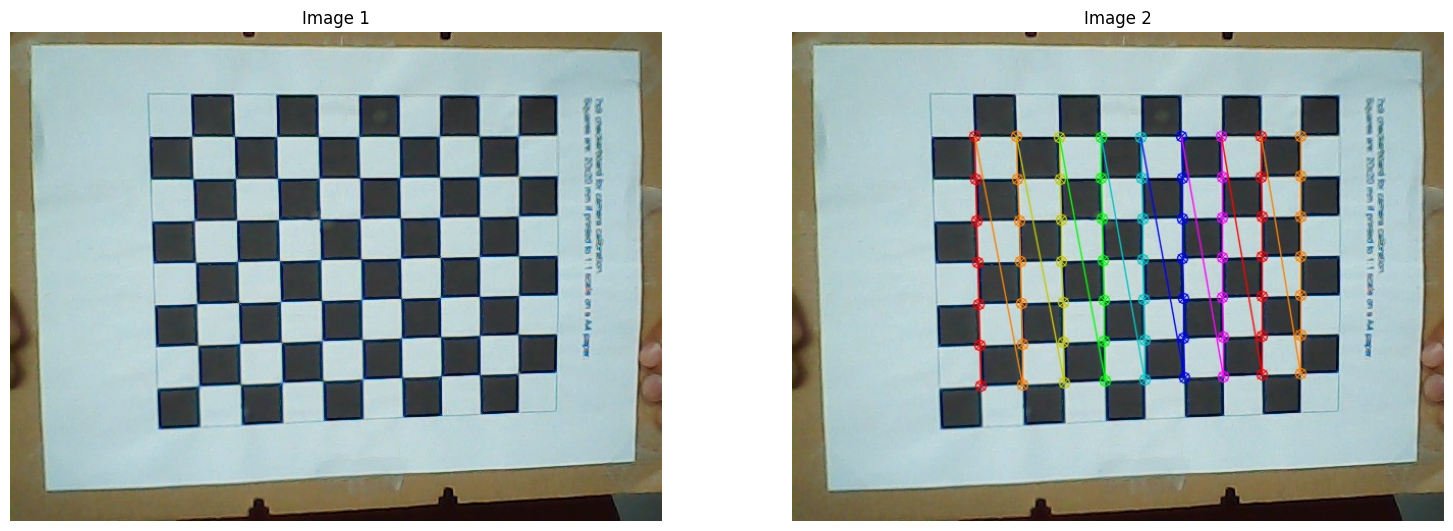

In [26]:
# Image paths
image_path1 = 'images/CV_Inputs/1.jpg'
image_path2 = 'output/output_1.jpg'

img1 = cv.imread(image_path1)
img2 = cv.imread(image_path2)

img1_rgb = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2_rgb = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# Plot the images 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img1_rgb)
axes[0].set_title("Image 1")
axes[0].axis("off")
   
axes[1].imshow(img2_rgb)
axes[1].set_title("Image 2")
axes[1].axis("off")

fig.set_size_inches(18.5, 10.5)

plt.show()


#### 2.1.1 Explanation

- First, the Algorithm Creates a 3D grid of points that represent the real-world coordinates of chessboard corners; in our case 9x7 grid

- `objpoints` stores 3D points in real-world space 
- `imgpoints` stores the 2D image plane coordinates
- Converts each image to grayscale for easier processing.

- `cv.findChessboardCorners` attempts to find a 7x9 chessboard pattern in each image. 
- `cv.cornerSubPix` refines the corner points' accuracy.

- If the chessboard is found, the detected corners are drawn on the image, and the modified image is saved to the specified output folder.

- `cv.calibrateCamera` estimates the camera's intrinsic parameters, distortion coefficients, rotation, and translation vectors:
   - **Intrinsic Parameters (mtx)**: The camera matrix, which includes focal lengths and optical center.
   - **Distortion Coefficients (dist)**: Describes lens distortion.
   - **Rotation Vectors (rvecs)**: The orientation of the camera for each image.
   - **Translation Vectors (tvecs)**: The position of the camera relative to the chessboard for each image.

### Step 4.2.2: Undistortion of Captured Images

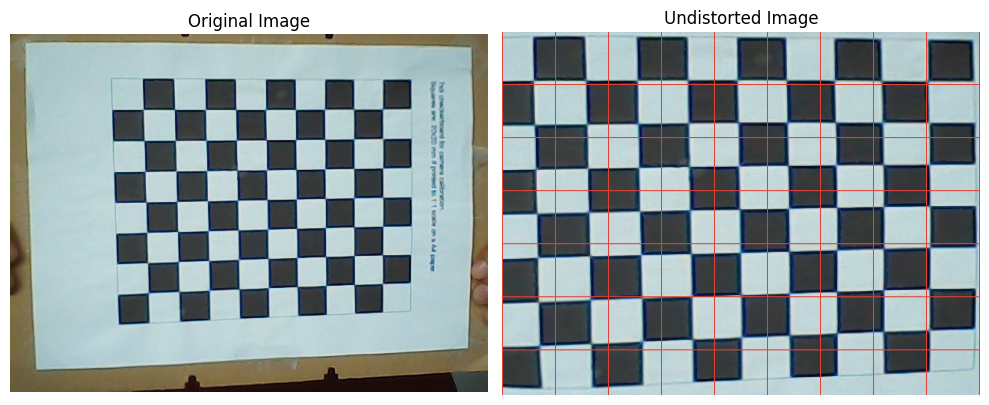

In [27]:
# Define paths for the input and output images
input_image_path = 'images/CV_Inputs/1.jpg'
output_image_path = 'images/distortion vs undistortion/undistorted2.jpeg'

# Load the original image
img = cv.imread(input_image_path)
h, w = img.shape[:2]

# Get the optimal new camera matrix for undistortion
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))

# Undistort the image
dst = cv.undistort(img, mtx, dist, None, newcameramtx)

# Crop the undistorted image to the region of interest (ROI)
x, y, w, h = roi
dst = dst[y-50:y+h+100, x-100:x+w+20]

# Save the undistorted image
os.makedirs(os.path.dirname(output_image_path), exist_ok=True)
cv.imwrite(output_image_path, dst)

# Convert images from BGR to RGB for Matplotlib display
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
dst_rgb = cv.cvtColor(dst, cv.COLOR_BGR2RGB)

# Grid lines at these intervals (in pixels)
# dx and dy can be different
dx, dy = 50,50
# Custom (rgb) grid color
grid_color = [227, 66, 52]
# Modify the image to include the grid
dst_rgb[:,::dy,:] = grid_color
dst_rgb[::dx,:,:] = grid_color

# Display the original and undistorted images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dst_rgb)
plt.title("Undistorted Image")
plt.axis('off')

plt.tight_layout()
plt.show()

#### 4.2.2.1 Explanation

- `cv.getOptimalNewCameraMatrix` refines the camera matrix (`mtx`) to improve the undistortion process:
    - It adjusts the matrix to balance between keeping more of the image and reducing distortion.
     - `roi` (Region of Interest) returns the part of the undistorted image that has valid pixels, which can be used for cropping later.

- `cv.undistort`, corrects the lens distortion using:
  - `mtx` (original camera matrix),
  - `dist` (distortion coefficients),
  - and `newcameramtx` (refined camera matrix).
  
- Cropping the Image: crops the image based on `roi`. Without cropping, the image might have black areas around the edges due to undistortion.

### Step 4.2.3: Error Calculation

In [28]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2)/len(imgpoints2)
    mean_error += error
    
total_error = mean_error/len(objpoints)
total_error = np.round(total_error, decimals=2)
print( f"total error: {total_error}")

total error: 0.18


#### 4.2.3.1 Explanation

- Reprojection of Object Points: The 3D object points are reprojected into the 2D image plane using the camera parameters (rotation, translation, camera matrix, and distortion coefficients).

- Error Calculation: The Euclidean distance between the actual detected image points and the reprojected points is computed and normalized for each image.

- Mean Reprojection Error: The average of all reprojection errors across the images is calculated to assess the overall accuracy of the camera calibration process.

## 4.3 Description of the Intrinsic and Extrinsic parameters

__Intrinsic parameters:__
- Intrinsic parameters are the internal characteristics of a camera.
- They describe how a 3D point in the camera’s own coordinate system is projected onto the 2D image plane.
- They are unique to each camera and remain constant for a given lens and focal length. 
- They are represented by a camera matrix K:
$$ K =
\begin{bmatrix}
f_x & {\alpha}f_x & c_x \\
0 & f_y & c_y \\
0 & 0 & 1 
\end{bmatrix}
$$
where, 
1. $f_x$ and $f_y$ are focal lengths in terms of pixels.
2. ${\alpha}f_x$ is generally taken to be zero.
3. $c_x$ and $c_y$ are coordinates of the optical center (principal point), which is where the optical axis intersects the image plane, typically near the center of the image.
- Additional intrinsic parameters may include __Distortion Coefficients__ which account for lens distortions. The distortion coefficients in OpenCV are represented as $k_1, k_2, p_1, p_2, k_3$(up to $k_6$ for higher-order distortions) and are used to correct this. 

__Extrinsic parameters:__
- Extrinsic parameters define the camera’s orientation and position in the 3D world.
- They describe the relationship between the camera's coordinate system and the world coordinate system, showing where the camera is located and what it’s looking at.
- They are composed of a __Rotation matrix(R)__ and a __Translation matrix(T)__ 
- Together, these parameters allow us to map a 3D point from the world coordinate system ($X_{world}$) to the camera coordinate system ($X_{camera}$):
$$X_{camera} = R\cdot X_{world} + T $$
where,
1. __Rotation matrix($R$)__ describes the camera's orientation (i.e., how it’s tilted or rotated in space).
2. __Translation matrix($T$)__ describes the camera's position relative to the world coordinate system (i.e., the offset between the camera and the origin of the 3D scene).

__Outputs of the calibration process:__
We obtained the intrinsic and extrinsic parameters as an output of the calibration process. 

$$Intrinsic\ parameters:\
\begin{bmatrix}
819.24 &  0. &         358.41 \\
0.     &    818.09 & 204.97  \\
0. & 0. &  1. 
\end{bmatrix}
$$
<br>
$$
Distortion\ coordinates:\ 
\begin{bmatrix}
1.11012616e+00 & -2.16583133e+01 & -1.83282310e-02 & 1.77138038e-02 & 1.44033139e+02
\end{bmatrix}
$$
<br>



## 4.4 Final Result

1. From the calibration set up and program, we obtained the parametric
matrix of our camera T(cms) as:

$
\begin{bmatrix}
819.24 & 0. & 358.41 \\
0. & 818.09 & 204.97 \\
0. & 0. & 1.
\end{bmatrix}
$

2. Total error(cms) we accounted for the calibration: $0.18$
3. We observed that the calibaration error increases with rounding off after decimel places. Therefore we kept all our values with 2 decimel places to get less error.

## 4.5 Images used of calibration

<div style="display: flex; justify-content: space-between;">
    <img src="images/CV_Inputs/1.jpg" alt="Image 1" style="width: 30%; margin-right: 20px;">
    <img src="images/CV_Inputs/2.jpg" alt="Image 2" style="width: 30%; margin-right: 20px;">
    <img src="images/CV_Inputs/3.jpg" alt="Image 3" style="width: 30%;">
</div>

<div style="display: flex; justify-content: space-between;">
    <img src="images/CV_Inputs/4.jpg" alt="Image 4" style="width: 30%; margin-right: 20px;">
    <img src="images/CV_Inputs/5.jpg" alt="Image 5" style="width: 30%; margin-right: 20px;">
    <img src="images/CV_Inputs/6.jpg" alt="Image 6" style="width: 30%;">
</div>

<div style="display: flex; justify-content: space-between;">
    <img src="images/CV_Inputs/7.jpg" alt="Image 7" style="width: 30%; margin-right: 20px;">
    <img src="images/CV_Inputs/8.jpg" alt="Image 8" style="width: 30%; margin-right: 20px;">
    <img src="images/CV_Inputs/9.jpg" alt="Image 9" style="width: 30%;">
</div>

# Experiment 5: Measuring the Accuracy and Precision of a KUKA youBot Arm

## 5.1 Experimental Setup

This experiment is to check how accurate and precise a 5 DoF robotic arm is. The robot, **a KUKA youBot arm**, will do pick-and-place tasks. It will place three different objects: small, medium, large in three positions: straight, left, and right.

This experiment was performed 25 times for each object performing each motion. Thus, we did 225 trials in total.

Components used for this Experiment:
1. **KUKA youBot arm**: This robotic arm is programmed to pick up and place objects using three types of movements: straight, left, and right. A computer connected to the KUKA arm sends commands to control its movements. The data coming from the robot arm gets saved as the rosbag, which later is converted into .csv files.
<div style="text-align: center;">
    <img src="images/bot.jpeg" alt="KUKA youBot arm" width="400" height="300">
    <p><b><center>Figure 1:</center></b> KUKA youBot arm</p>
</div>

2. **Objects**: Three objects with different heights - small, medium, large are taken  to perform the pick and place procedure.
3. **Container**: To ensure that the objects are placed in the same place and in the range of robot's grasping position, this container setup is made on the table.
<div style="text-align: center;">
    <img src="images/container.jpeg" alt="KUKA youBot arm" width="400" height="300">
    <p><b><center>Figure 2:</center></b> Object placement Container</p>
</div>
3. **Optitrack System**: The new system that is installed in the lab is used to get the object's position and orientation while running the experiment.
4. **Optitrack Markers**: The markers are placed on the top of each object whose pose is needed to collected. This markers helps optitrack to find the position and orientation of the object.
5. **Optitrack Motive**: This software is used to visualize the live action of the experiment and later for saving the .csv used for the analysis.

## 5.2 Experimental Procedure

To perform this experiment, we followed the SEE manual that is provided to us.

1. To start the robot, we ran the ROS launch commands; such as:

    `roscore`: used to establish communication.

    `roslaunch youbot driver ros interface youbot driver.launch`: used to launch the robot drivers.

    `roslaunch youbot moveit move group.launch`: used to bring the robot arm to pregrasp pose. 

    `roslaunch youBot placing experiment youBot placing.launch`: here you get a choice to choose between 3 different motions - left, right and straight.

2. Once, the object is placed inside the container, and the desired motion is given, the robot arm picks up the object and places it according to the pre-programmed location.

3. During this run, optitrack captures the motion of the markers placed on the object. 

4. Once, the object gets placed onto the location, its .csv from the optitrack motive and rosbag data is stored.

## 5.3 Experimental Errors

1. While, placing the object inside the container, there are possibilty of misplacements.

2. After the robot arm places the object on the ground, it occures that sometimes the object shakes; more the height of the block, more possibility of shaking.

3. As, the markers provide the position and orientation of the object, it is necessary to place the object in similar position everytime.
<div style="text-align: center;">
    <img src="images/markers.jpeg" alt="KUKA youBot arm" width="400" height="300">
    <p><b><center>Figure 3:</center></b> Correct Marker Placement</p>
</div>

4. Recording the data before the object is placed on the ground can also cause the error.

## 5.4 Experimental Data Collected

- The end poses of three different objects performing three different motions are collected and saved as .csv files from the Optitrack motive software.
- The Optitrack gives the coordinates of the object in 3-dimensional space, however for the purpose of visualization we have taken only the x-coordinates and the z-coordinates (which corresponds to the x-y planar coordinates for a 2-dimensional graph)
- Henceforth the z-coordinates from the optitrack will be refered to as the y-coordinates for visualization while the x-coordinates remains the same.
- The start coordinates for the each motion of the kuka arm remains the same throughout the experiment. This is taken as the origin and all other coordinates are transformed with respect to this point.
- This helps in a better visualization as differences between each points can be easily seen on a known scale.
- All coordinates as taken in cms. 
- As, the optitrack data doesn't show much variations while rounding off to 1 decimal, we kept the decimal upto 2 digits.
- OptiTrack systems typically produce less than 0.2 mm of measurement error, even across large tracking areas—even of those 10,000 sq ft or more. In smaller measurement areas, OptiTrack systems regularly produce errors of [0.1 mm or less](https://www.optitrack.com/applications/movement-sciences/#:~:text=OptiTrack%20systems%20typically%20produce%20less,of%200.1%20mm%20or%20less.).

In [29]:
# Start Coordinates / Origin 
x_start = -242.49
y_start = 91.54
z_start = 55.17

#Start Vector
org = np.array([x_start, y_start, z_start])[:, np.newaxis]
print(f'Origin with respect to the World frame (Optitrack):\n{org}')

Origin with respect to the World frame (Optitrack):
[[-242.49]
 [  91.54]
 [  55.17]]


In [30]:
# Import CSVs
columns = ['Position-X', 'Position-Y', 'Position-Z']
df_large_left = pd.read_csv('CSVs/Optitrack_CSVs/Assignment-5_Large-Object - Left.csv', usecols=columns, skiprows=1)
df_large_right = pd.read_csv('CSVs/Optitrack_CSVs/Assignment-5_Large-Object - Right.csv', usecols=columns, skiprows=1)
df_large_straight = pd.read_csv('CSVs/Optitrack_CSVs/Assignment-5_Large-Object - Straight.csv', usecols=columns, skiprows=1)
df_large = pd.concat([df_large_left.rename(columns={"Position-X": "LeftPosition-X", "Position-Y": "LeftPosition-Y", "Position-Z": "LeftPosition-Z"}), 
                      df_large_right.rename(columns={"Position-X": "RightPosition-X", "Position-Y": "RightPosition-Y", "Position-Z": "RightPosition-Z"}), 
                      df_large_straight.rename(columns={"Position-X": "StraightPosition-X", "Position-Y": "StraightPosition-Y", "Position-Z": "StraightPosition-Z"})],
                     axis=1, join='inner')

df_medium_left = pd.read_csv('CSVs/Optitrack_CSVs/Assignment-5_Medium-Object - Left.csv', usecols=columns, skiprows=1)
df_medium_right = pd.read_csv('CSVs/Optitrack_CSVs/Assignment-5_Medium-Object - Right.csv', usecols=columns, skiprows=1)
df_medium_straight = pd.read_csv('CSVs/Optitrack_CSVs/Assignment-5_Medium-Object - Straight.csv', usecols=columns, skiprows=1)
df_medium = pd.concat([df_medium_left.rename(columns={"Position-X": "LeftPosition-X", "Position-Y": "LeftPosition-Y", "Position-Z": "LeftPosition-Z"}), 
                      df_medium_right.rename(columns={"Position-X": "RightPosition-X", "Position-Y": "RightPosition-Y", "Position-Z": "RightPosition-Z"}), 
                      df_medium_straight.rename(columns={"Position-X": "StraightPosition-X", "Position-Y": "StraightPosition-Y", "Position-Z": "StraightPosition-Z"})],
                     axis=1, join='inner')

df_small_left = pd.read_csv('CSVs/Optitrack_CSVs/Assignment-5_Small-Object - Left.csv', usecols=columns, skiprows=1)
df_small_right = pd.read_csv('CSVs/Optitrack_CSVs/Assignment-5_Small-Object - Right.csv', usecols=columns, skiprows=1)
df_small_straight = pd.read_csv('CSVs/Optitrack_CSVs/Assignment-5_Small-Object - Straight.csv', usecols=columns, skiprows=1)
df_small = pd.concat([df_small_left.rename(columns={"Position-X": "LeftPosition-X", "Position-Y": "LeftPosition-Y", "Position-Z": "LeftPosition-Z"}), 
                      df_small_right.rename(columns={"Position-X": "RightPosition-X", "Position-Y": "RightPosition-Y", "Position-Z": "RightPosition-Z"}), 
                      df_small_straight.rename(columns={"Position-X": "StraightPosition-X", "Position-Y": "StraightPosition-Y", "Position-Z": "StraightPosition-Z"})],
                     axis=1, join='inner')

### Table 5.4.1: Measurement Data of Large Object

In [31]:
display(Markdown(df_large.head(26).to_html(index=False)))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>LeftPosition-X</th>
      <th>LeftPosition-Y</th>
      <th>LeftPosition-Z</th>
      <th>RightPosition-X</th>
      <th>RightPosition-Y</th>
      <th>RightPosition-Z</th>
      <th>StraightPosition-X</th>
      <th>StraightPosition-Y</th>
      <th>StraightPosition-Z</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>-221.35</td>
      <td>93.92</td>
      <td>62.41</td>
      <td>-262.72</td>
      <td>94.58</td>
      <td>57.01</td>
      <td>-240.96</td>
      <td>93.98</td>
      <td>69.14</td>
    </tr>
    <tr>
      <td>-221.40</td>
      <td>93.92</td>
      <td>62.34</td>
      <td>-262.74</td>
      <td>94.58</td>
      <td>57.00</td>
      <td>-241.02</td>
      <td>93.98</td>
      <td>69.33</td>
    </tr>
    <tr>
      <td>-221.31</td>
      <td>93.88</td>
      <td>62.79</td>
      <td>-262.72</td>
      <td>94.58</td>
      <td>56.89</td>
      <td>-241.00</td>
      <td>93.99</td>
      <td>69.24</td>
    </tr>
    <tr>
      <td>-221.35</td>
      <td>93.93</td>
      <td>62.33</td>
      <td>-262.69</td>
      <td>94.58</td>
      <td>57.01</td>
      <td>-241.02</td>
      <td>93.98</td>
      <td>69.25</td>
    </tr>
    <tr>
      <td>-221.35</td>
      <td>93.94</td>
      <td>62.29</td>
      <td>-262.84</td>
      <td>94.58</td>
      <td>57.04</td>
      <td>-240.99</td>
      <td>93.98</td>
      <td>69.31</td>
    </tr>
    <tr>
      <td>-221.32</td>
      <td>93.89</td>
      <td>62.78</td>
      <td>-262.74</td>
      <td>94.57</td>
      <td>57.02</td>
      <td>-241.02</td>
      <td>93.98</td>
      <td>69.28</td>
    </tr>
    <tr>
      <td>-221.42</td>
      <td>93.93</td>
      <td>62.29</td>
      <td>-262.70</td>
      <td>94.58</td>
      <td>56.97</td>
      <td>-241.06</td>
      <td>93.98</td>
      <td>69.24</td>
    </tr>
    <tr>
      <td>-221.41</td>
      <td>93.93</td>
      <td>62.24</td>
      <td>-262.74</td>
      <td>94.58</td>
      <td>56.97</td>
      <td>-241.05</td>
      <td>93.98</td>
      <td>69.33</td>
    </tr>
    <tr>
      <td>-221.45</td>
      <td>93.92</td>
      <td>62.32</td>
      <td>-262.72</td>
      <td>94.57</td>
      <td>56.96</td>
      <td>-241.06</td>
      <td>93.98</td>
      <td>69.29</td>
    </tr>
    <tr>
      <td>-221.36</td>
      <td>93.93</td>
      <td>62.39</td>
      <td>-262.74</td>
      <td>94.58</td>
      <td>56.97</td>
      <td>-241.09</td>
      <td>93.96</td>
      <td>69.40</td>
    </tr>
    <tr>
      <td>-221.40</td>
      <td>93.93</td>
      <td>62.35</td>
      <td>-262.73</td>
      <td>94.59</td>
      <td>57.01</td>
      <td>-241.04</td>
      <td>93.98</td>
      <td>69.26</td>
    </tr>
    <tr>
      <td>-221.37</td>
      <td>93.93</td>
      <td>62.35</td>
      <td>-262.78</td>
      <td>94.56</td>
      <td>56.99</td>
      <td>-241.07</td>
      <td>93.98</td>
      <td>69.35</td>
    </tr>
    <tr>
      <td>-221.33</td>
      <td>93.93</td>
      <td>62.28</td>
      <td>-262.72</td>
      <td>94.58</td>
      <td>56.95</td>
      <td>-241.02</td>
      <td>93.99</td>
      <td>69.36</td>
    </tr>
    <tr>
      <td>-221.41</td>
      <td>93.93</td>
      <td>62.30</td>
      <td>-262.72</td>
      <td>94.59</td>
      <td>57.01</td>
      <td>-241.00</td>
      <td>93.99</td>
      <td>69.39</td>
    </tr>
    <tr>
      <td>-221.30</td>
      <td>93.93</td>
      <td>62.30</td>
      <td>-262.72</td>
      <td>94.59</td>
      <td>57.00</td>
      <td>-241.04</td>
      <td>93.98</td>
      <td>69.37</td>
    </tr>
    <tr>
      <td>-221.33</td>
      <td>93.93</td>
      <td>62.30</td>
      <td>-262.72</td>
      <td>94.58</td>
      <td>56.95</td>
      <td>-241.00</td>
      <td>93.99</td>
      <td>69.40</td>
    </tr>
    <tr>
      <td>-221.50</td>
      <td>93.92</td>
      <td>62.33</td>
      <td>-262.71</td>
      <td>94.57</td>
      <td>56.97</td>
      <td>-241.03</td>
      <td>93.99</td>
      <td>69.38</td>
    </tr>
    <tr>
      <td>-221.41</td>
      <td>93.93</td>
      <td>62.33</td>
      <td>-262.72</td>
      <td>94.60</td>
      <td>57.00</td>
      <td>-241.04</td>
      <td>93.98</td>
      <td>69.36</td>
    </tr>
    <tr>
      <td>-221.27</td>
      <td>93.93</td>
      <td>62.33</td>
      <td>-262.76</td>
      <td>94.58</td>
      <td>56.94</td>
      <td>-241.03</td>
      <td>93.99</td>
      <td>69.38</td>
    </tr>
    <tr>
      <td>-221.54</td>
      <td>93.92</td>
      <td>62.31</td>
      <td>-262.70</td>
      <td>94.58</td>
      <td>56.92</td>
      <td>-241.00</td>
      <td>93.99</td>
      <td>69.39</td>
    </tr>
    <tr>
      <td>-221.35</td>
      <td>93.93</td>
      <td>62.34</td>
      <td>-262.74</td>
      <td>94.59</td>
      <td>57.00</td>
      <td>-240.96</td>
      <td>93.99</td>
      <td>69.39</td>
    </tr>
    <tr>
      <td>-221.39</td>
      <td>93.92</td>
      <td>62.33</td>
      <td>-262.77</td>
      <td>94.59</td>
      <td>56.99</td>
      <td>-240.94</td>
      <td>93.99</td>
      <td>69.46</td>
    </tr>
    <tr>
      <td>-221.33</td>
      <td>93.93</td>
      <td>62.29</td>
      <td>-262.73</td>
      <td>94.58</td>
      <td>56.91</td>
      <td>-241.00</td>
      <td>93.99</td>
      <td>69.41</td>
    </tr>
    <tr>
      <td>-221.35</td>
      <td>93.93</td>
      <td>62.35</td>
      <td>-262.72</td>
      <td>94.58</td>
      <td>56.92</td>
      <td>-241.01</td>
      <td>93.98</td>
      <td>69.36</td>
    </tr>
    <tr>
      <td>-221.42</td>
      <td>93.94</td>
      <td>62.29</td>
      <td>-262.73</td>
      <td>94.59</td>
      <td>56.97</td>
      <td>-241.01</td>
      <td>93.99</td>
      <td>69.41</td>
    </tr>
  </tbody>
</table>

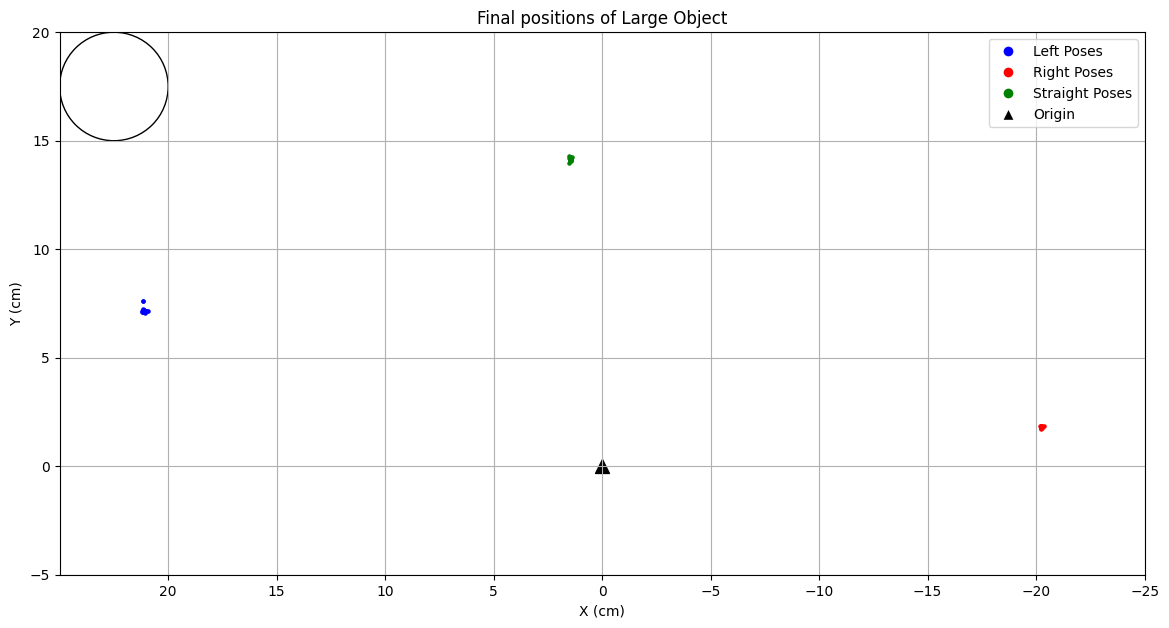

In [32]:
#Plot Points
df_large_left_dist = []
df_large_right_dist = []
df_large_straight_dist = []

for i in range(0, 25):
    arr_left = np.array([df_large_left['Position-X'][i], df_large_left['Position-Y'][i], df_large_left['Position-Z'][i]])[:, np.newaxis]
    arr_right = np.array([df_large_right['Position-X'][i], df_large_right['Position-Y'][i], df_large_right['Position-Z'][i]])[:, np.newaxis]
    arr_straight = np.array([df_large_straight['Position-X'][i], df_large_straight['Position-Y'][i], df_large_straight['Position-Z'][i]])[:, np.newaxis]
    
    new_left = arr_left - org
    new_right = arr_right - org
    new_straight = arr_straight - org

    df_large_left_dist.append(new_left)
    df_large_right_dist.append(new_right)
    df_large_straight_dist.append(new_straight)
    
    plt.scatter(new_left[0], new_left[2], color='b', s=5)
    plt.scatter(new_right[0], new_right[2], color='r', s=5)
    plt.scatter(new_straight[0], new_straight[2], color='g', s=5)

# Plot Circle
circ = plt.Circle((22.5, 17.5), radius=2.5, edgecolor='k', facecolor='None')
origin = plt.scatter(0, 0, color='k', s=100, marker='^', label='Origin')

# Set axis limits
ax = plt.gca()
ax.set_xlim([25, -25])
ax.set_ylim([-5, 20])
ax.add_patch(circ)
ax.set_aspect('equal', 'box')

# Add Grid, labels and Create custom legend markers
plt.title("Final positions of Large Object")
plt.xlabel('X (cm)')
plt.ylabel('Y (cm)')
# plt.legend(['Left Poses (blue)', 'Right Poses (red)', 'Straight Poses (green)', 'Origin (black)'])
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Left Poses', markerfacecolor='b', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Right Poses', markerfacecolor='r', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Straight Poses', markerfacecolor='g', markersize=8),
    Line2D([0], [0], marker='^', color='w', label='Origin', markerfacecolor='k', markersize=8)
]
plt.legend(handles=legend_elements)
plt.xticks(np.arange(-25, 25, step=5))
plt.grid()

# Set figure size and ahow plot
fig = plt.gcf()
fig.set_size_inches(14, 9)
# fig.savefig('test2png.png', dpi=100)
plt.show()

### Table 5.4.2: Measurement Data of Medium Object

In [33]:
display(Markdown(df_medium.head(26).to_html(index=False)))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>LeftPosition-X</th>
      <th>LeftPosition-Y</th>
      <th>LeftPosition-Z</th>
      <th>RightPosition-X</th>
      <th>RightPosition-Y</th>
      <th>RightPosition-Z</th>
      <th>StraightPosition-X</th>
      <th>StraightPosition-Y</th>
      <th>StraightPosition-Z</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>-222.11</td>
      <td>91.32</td>
      <td>61.94</td>
      <td>-262.90</td>
      <td>92.03</td>
      <td>56.04</td>
      <td>-241.28</td>
      <td>91.37</td>
      <td>68.69</td>
    </tr>
    <tr>
      <td>-222.11</td>
      <td>91.33</td>
      <td>61.93</td>
      <td>-262.92</td>
      <td>92.02</td>
      <td>56.02</td>
      <td>-241.38</td>
      <td>91.38</td>
      <td>68.69</td>
    </tr>
    <tr>
      <td>-222.12</td>
      <td>91.34</td>
      <td>61.92</td>
      <td>-262.88</td>
      <td>91.99</td>
      <td>56.07</td>
      <td>-241.36</td>
      <td>91.37</td>
      <td>68.73</td>
    </tr>
    <tr>
      <td>-222.13</td>
      <td>91.35</td>
      <td>61.91</td>
      <td>-262.89</td>
      <td>91.99</td>
      <td>56.10</td>
      <td>-241.28</td>
      <td>91.38</td>
      <td>68.70</td>
    </tr>
    <tr>
      <td>-222.05</td>
      <td>91.35</td>
      <td>61.91</td>
      <td>-262.92</td>
      <td>92.03</td>
      <td>56.04</td>
      <td>-241.51</td>
      <td>91.38</td>
      <td>68.67</td>
    </tr>
    <tr>
      <td>-222.09</td>
      <td>91.34</td>
      <td>61.93</td>
      <td>-262.88</td>
      <td>92.01</td>
      <td>56.19</td>
      <td>-241.39</td>
      <td>91.38</td>
      <td>68.70</td>
    </tr>
    <tr>
      <td>-222.15</td>
      <td>91.35</td>
      <td>61.83</td>
      <td>-262.92</td>
      <td>92.02</td>
      <td>56.03</td>
      <td>-241.47</td>
      <td>91.38</td>
      <td>68.70</td>
    </tr>
    <tr>
      <td>-222.13</td>
      <td>91.34</td>
      <td>61.91</td>
      <td>-262.92</td>
      <td>91.99</td>
      <td>56.05</td>
      <td>-241.38</td>
      <td>91.39</td>
      <td>68.70</td>
    </tr>
    <tr>
      <td>-222.12</td>
      <td>91.34</td>
      <td>61.90</td>
      <td>-262.91</td>
      <td>92.00</td>
      <td>56.02</td>
      <td>-241.49</td>
      <td>91.39</td>
      <td>68.67</td>
    </tr>
    <tr>
      <td>-222.02</td>
      <td>91.34</td>
      <td>61.92</td>
      <td>-262.83</td>
      <td>91.99</td>
      <td>55.99</td>
      <td>-241.48</td>
      <td>91.38</td>
      <td>68.51</td>
    </tr>
    <tr>
      <td>-221.98</td>
      <td>91.33</td>
      <td>61.94</td>
      <td>-262.90</td>
      <td>92.04</td>
      <td>56.10</td>
      <td>-241.47</td>
      <td>91.39</td>
      <td>68.66</td>
    </tr>
    <tr>
      <td>-222.09</td>
      <td>91.35</td>
      <td>61.79</td>
      <td>-262.89</td>
      <td>92.04</td>
      <td>56.09</td>
      <td>-241.33</td>
      <td>91.39</td>
      <td>68.73</td>
    </tr>
    <tr>
      <td>-222.07</td>
      <td>91.30</td>
      <td>61.94</td>
      <td>-262.91</td>
      <td>92.02</td>
      <td>56.10</td>
      <td>-241.49</td>
      <td>91.38</td>
      <td>68.54</td>
    </tr>
    <tr>
      <td>-222.10</td>
      <td>91.31</td>
      <td>61.94</td>
      <td>-262.91</td>
      <td>92.03</td>
      <td>56.08</td>
      <td>-241.31</td>
      <td>91.37</td>
      <td>68.72</td>
    </tr>
    <tr>
      <td>-222.06</td>
      <td>91.34</td>
      <td>61.92</td>
      <td>-262.89</td>
      <td>92.03</td>
      <td>56.07</td>
      <td>-241.36</td>
      <td>91.37</td>
      <td>68.70</td>
    </tr>
    <tr>
      <td>-222.08</td>
      <td>91.33</td>
      <td>61.90</td>
      <td>-262.89</td>
      <td>91.99</td>
      <td>56.06</td>
      <td>-241.47</td>
      <td>91.37</td>
      <td>68.57</td>
    </tr>
    <tr>
      <td>-222.01</td>
      <td>91.32</td>
      <td>61.93</td>
      <td>-262.87</td>
      <td>91.99</td>
      <td>56.18</td>
      <td>-241.37</td>
      <td>91.39</td>
      <td>68.71</td>
    </tr>
    <tr>
      <td>-222.12</td>
      <td>91.33</td>
      <td>61.92</td>
      <td>-262.89</td>
      <td>91.99</td>
      <td>56.10</td>
      <td>-241.34</td>
      <td>91.37</td>
      <td>68.71</td>
    </tr>
    <tr>
      <td>-222.02</td>
      <td>91.29</td>
      <td>61.91</td>
      <td>-262.88</td>
      <td>92.00</td>
      <td>56.17</td>
      <td>-241.37</td>
      <td>91.37</td>
      <td>68.72</td>
    </tr>
    <tr>
      <td>-222.10</td>
      <td>91.31</td>
      <td>61.91</td>
      <td>-262.89</td>
      <td>92.03</td>
      <td>56.11</td>
      <td>-241.39</td>
      <td>91.38</td>
      <td>68.70</td>
    </tr>
    <tr>
      <td>-222.15</td>
      <td>91.32</td>
      <td>61.88</td>
      <td>-262.88</td>
      <td>91.99</td>
      <td>56.14</td>
      <td>-241.36</td>
      <td>91.38</td>
      <td>68.72</td>
    </tr>
    <tr>
      <td>-222.09</td>
      <td>91.31</td>
      <td>61.89</td>
      <td>-262.90</td>
      <td>91.98</td>
      <td>56.10</td>
      <td>-241.39</td>
      <td>91.39</td>
      <td>68.75</td>
    </tr>
    <tr>
      <td>-222.15</td>
      <td>91.34</td>
      <td>61.93</td>
      <td>-262.89</td>
      <td>92.04</td>
      <td>56.10</td>
      <td>-241.48</td>
      <td>91.38</td>
      <td>68.68</td>
    </tr>
    <tr>
      <td>-222.11</td>
      <td>91.35</td>
      <td>61.93</td>
      <td>-262.87</td>
      <td>92.01</td>
      <td>56.04</td>
      <td>-241.44</td>
      <td>91.38</td>
      <td>68.71</td>
    </tr>
    <tr>
      <td>-222.15</td>
      <td>91.33</td>
      <td>61.89</td>
      <td>-262.88</td>
      <td>92.03</td>
      <td>56.05</td>
      <td>-241.45</td>
      <td>91.38</td>
      <td>68.70</td>
    </tr>
  </tbody>
</table>

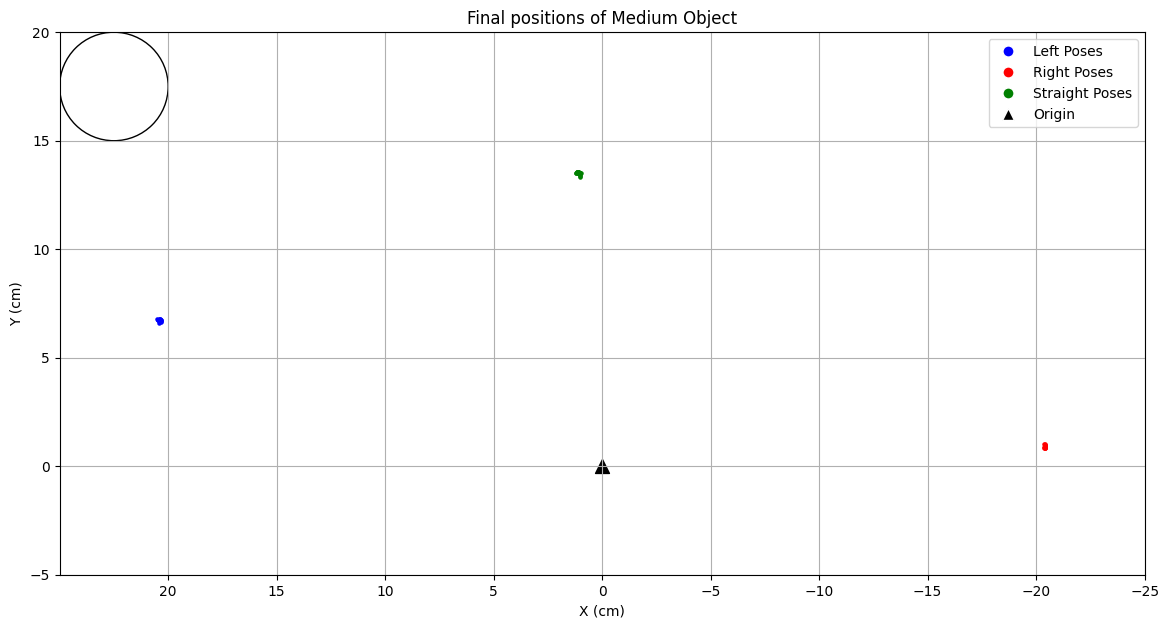

In [34]:
#Plot Points
df_medium_left_dist = []
df_medium_right_dist = []
df_medium_straight_dist = []

for i in range(0, 25):
    arr_left = np.array([df_medium_left['Position-X'][i], df_medium_left['Position-Y'][i], df_medium_left['Position-Z'][i]])[:, np.newaxis]
    arr_right = np.array([df_medium_right['Position-X'][i], df_medium_right['Position-Y'][i], df_medium_right['Position-Z'][i]])[:, np.newaxis]
    arr_straight = np.array([df_medium_straight['Position-X'][i], df_medium_straight['Position-Y'][i], df_medium_straight['Position-Z'][i]])[:, np.newaxis]
    
    new_left = arr_left - org
    new_right = arr_right - org
    new_straight = arr_straight - org

    df_medium_left_dist.append(new_left)
    df_medium_right_dist.append(new_right)
    df_medium_straight_dist.append(new_straight)
    
    plt.scatter(new_left[0], new_left[2], color='b', s=5)
    plt.scatter(new_right[0], new_right[2], color='r', s=5)
    plt.scatter(new_straight[0], new_straight[2], color='g', s=5)

# Plot Circle
circ = plt.Circle((22.5, 17.5), radius=2.5, edgecolor='k', facecolor='None')
origin = plt.scatter(0, 0, color='k', s=100, marker='^', label='Origin')

# Set axis limits
ax = plt.gca()
ax.set_xlim([25, -25])
ax.set_ylim([-5, 20])
ax.add_patch(circ)
ax.set_aspect('equal', 'box')

# Add Grid, labels and Create custom legend markers
plt.title("Final positions of Medium Object")
plt.xlabel('X (cm)')
plt.ylabel('Y (cm)')
# plt.legend(['Left Poses (blue)', 'Right Poses (red)', 'Straight Poses (green)', 'Origin (black)'])
# 
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Left Poses', markerfacecolor='b', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Right Poses', markerfacecolor='r', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Straight Poses', markerfacecolor='g', markersize=8),
    Line2D([0], [0], marker='^', color='w', label='Origin', markerfacecolor='k', markersize=8)
]
plt.legend(handles=legend_elements)
plt.xticks(np.arange(-25, 25, step=5))
plt.grid()

# Set figure size and ahow plot
fig = plt.gcf()
fig.set_size_inches(14, 9)
plt.show()

### Table 5.4.3: Measurement Data of Small Object

In [35]:
display(Markdown(df_small.head(26).to_html(index=False)))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>LeftPosition-X</th>
      <th>LeftPosition-Y</th>
      <th>LeftPosition-Z</th>
      <th>RightPosition-X</th>
      <th>RightPosition-Y</th>
      <th>RightPosition-Z</th>
      <th>StraightPosition-X</th>
      <th>StraightPosition-Y</th>
      <th>StraightPosition-Z</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>-220.32</td>
      <td>86.05</td>
      <td>62.77</td>
      <td>-262.85</td>
      <td>86.74</td>
      <td>57.89</td>
      <td>-240.60</td>
      <td>86.09</td>
      <td>70.23</td>
    </tr>
    <tr>
      <td>-220.45</td>
      <td>86.04</td>
      <td>62.84</td>
      <td>-262.89</td>
      <td>86.74</td>
      <td>57.85</td>
      <td>-240.46</td>
      <td>86.08</td>
      <td>70.20</td>
    </tr>
    <tr>
      <td>-220.33</td>
      <td>86.04</td>
      <td>62.78</td>
      <td>-262.88</td>
      <td>86.74</td>
      <td>57.86</td>
      <td>-240.45</td>
      <td>86.09</td>
      <td>70.20</td>
    </tr>
    <tr>
      <td>-220.56</td>
      <td>86.02</td>
      <td>62.89</td>
      <td>-262.89</td>
      <td>86.74</td>
      <td>57.88</td>
      <td>-240.50</td>
      <td>86.08</td>
      <td>70.20</td>
    </tr>
    <tr>
      <td>-220.50</td>
      <td>86.01</td>
      <td>62.86</td>
      <td>-262.93</td>
      <td>86.73</td>
      <td>57.88</td>
      <td>-240.51</td>
      <td>86.09</td>
      <td>70.19</td>
    </tr>
    <tr>
      <td>-220.48</td>
      <td>86.03</td>
      <td>62.90</td>
      <td>-262.83</td>
      <td>86.74</td>
      <td>57.87</td>
      <td>-240.50</td>
      <td>86.09</td>
      <td>70.19</td>
    </tr>
    <tr>
      <td>-220.40</td>
      <td>86.03</td>
      <td>62.81</td>
      <td>-262.88</td>
      <td>86.73</td>
      <td>57.88</td>
      <td>-240.51</td>
      <td>86.09</td>
      <td>70.20</td>
    </tr>
    <tr>
      <td>-220.61</td>
      <td>86.04</td>
      <td>62.95</td>
      <td>-262.87</td>
      <td>86.75</td>
      <td>57.88</td>
      <td>-240.51</td>
      <td>86.09</td>
      <td>70.21</td>
    </tr>
    <tr>
      <td>-220.39</td>
      <td>86.05</td>
      <td>62.82</td>
      <td>-262.89</td>
      <td>86.74</td>
      <td>57.88</td>
      <td>-240.50</td>
      <td>86.09</td>
      <td>70.21</td>
    </tr>
    <tr>
      <td>-220.37</td>
      <td>86.05</td>
      <td>62.79</td>
      <td>-262.85</td>
      <td>86.76</td>
      <td>57.84</td>
      <td>-240.51</td>
      <td>86.09</td>
      <td>70.23</td>
    </tr>
    <tr>
      <td>-220.40</td>
      <td>86.04</td>
      <td>62.80</td>
      <td>-262.87</td>
      <td>86.75</td>
      <td>57.84</td>
      <td>-240.54</td>
      <td>86.09</td>
      <td>70.19</td>
    </tr>
    <tr>
      <td>-220.41</td>
      <td>86.05</td>
      <td>62.83</td>
      <td>-262.85</td>
      <td>86.75</td>
      <td>57.83</td>
      <td>-240.56</td>
      <td>86.06</td>
      <td>70.17</td>
    </tr>
    <tr>
      <td>-220.42</td>
      <td>86.05</td>
      <td>62.83</td>
      <td>-262.87</td>
      <td>86.76</td>
      <td>57.88</td>
      <td>-240.61</td>
      <td>86.09</td>
      <td>70.18</td>
    </tr>
    <tr>
      <td>-220.40</td>
      <td>86.05</td>
      <td>62.80</td>
      <td>-262.88</td>
      <td>86.76</td>
      <td>57.84</td>
      <td>-240.58</td>
      <td>86.09</td>
      <td>70.20</td>
    </tr>
    <tr>
      <td>-220.45</td>
      <td>86.05</td>
      <td>62.85</td>
      <td>-262.91</td>
      <td>86.76</td>
      <td>57.85</td>
      <td>-240.58</td>
      <td>86.09</td>
      <td>70.22</td>
    </tr>
    <tr>
      <td>-220.32</td>
      <td>86.06</td>
      <td>62.78</td>
      <td>-262.95</td>
      <td>86.76</td>
      <td>57.81</td>
      <td>-240.61</td>
      <td>86.10</td>
      <td>70.19</td>
    </tr>
    <tr>
      <td>-220.51</td>
      <td>86.02</td>
      <td>62.92</td>
      <td>-262.89</td>
      <td>86.76</td>
      <td>57.85</td>
      <td>-240.60</td>
      <td>86.10</td>
      <td>70.17</td>
    </tr>
    <tr>
      <td>-220.52</td>
      <td>86.03</td>
      <td>62.92</td>
      <td>-262.89</td>
      <td>86.76</td>
      <td>57.83</td>
      <td>-240.57</td>
      <td>86.09</td>
      <td>70.17</td>
    </tr>
    <tr>
      <td>-220.46</td>
      <td>86.03</td>
      <td>62.88</td>
      <td>-262.88</td>
      <td>86.76</td>
      <td>57.84</td>
      <td>-240.54</td>
      <td>86.09</td>
      <td>70.22</td>
    </tr>
    <tr>
      <td>-220.45</td>
      <td>86.05</td>
      <td>62.86</td>
      <td>-262.89</td>
      <td>86.76</td>
      <td>57.86</td>
      <td>-240.60</td>
      <td>86.10</td>
      <td>70.21</td>
    </tr>
    <tr>
      <td>-220.40</td>
      <td>86.04</td>
      <td>62.83</td>
      <td>-262.90</td>
      <td>86.76</td>
      <td>57.81</td>
      <td>-240.64</td>
      <td>86.10</td>
      <td>70.21</td>
    </tr>
    <tr>
      <td>-220.45</td>
      <td>86.03</td>
      <td>62.87</td>
      <td>-262.88</td>
      <td>86.77</td>
      <td>57.84</td>
      <td>-240.65</td>
      <td>86.10</td>
      <td>70.19</td>
    </tr>
    <tr>
      <td>-220.29</td>
      <td>86.04</td>
      <td>62.79</td>
      <td>-262.85</td>
      <td>86.77</td>
      <td>57.84</td>
      <td>-240.61</td>
      <td>86.10</td>
      <td>70.22</td>
    </tr>
    <tr>
      <td>-220.51</td>
      <td>86.03</td>
      <td>62.89</td>
      <td>-262.90</td>
      <td>86.76</td>
      <td>57.82</td>
      <td>-240.63</td>
      <td>86.10</td>
      <td>70.18</td>
    </tr>
    <tr>
      <td>-220.46</td>
      <td>86.02</td>
      <td>62.83</td>
      <td>-262.88</td>
      <td>86.77</td>
      <td>57.81</td>
      <td>-240.61</td>
      <td>86.10</td>
      <td>70.16</td>
    </tr>
  </tbody>
</table>

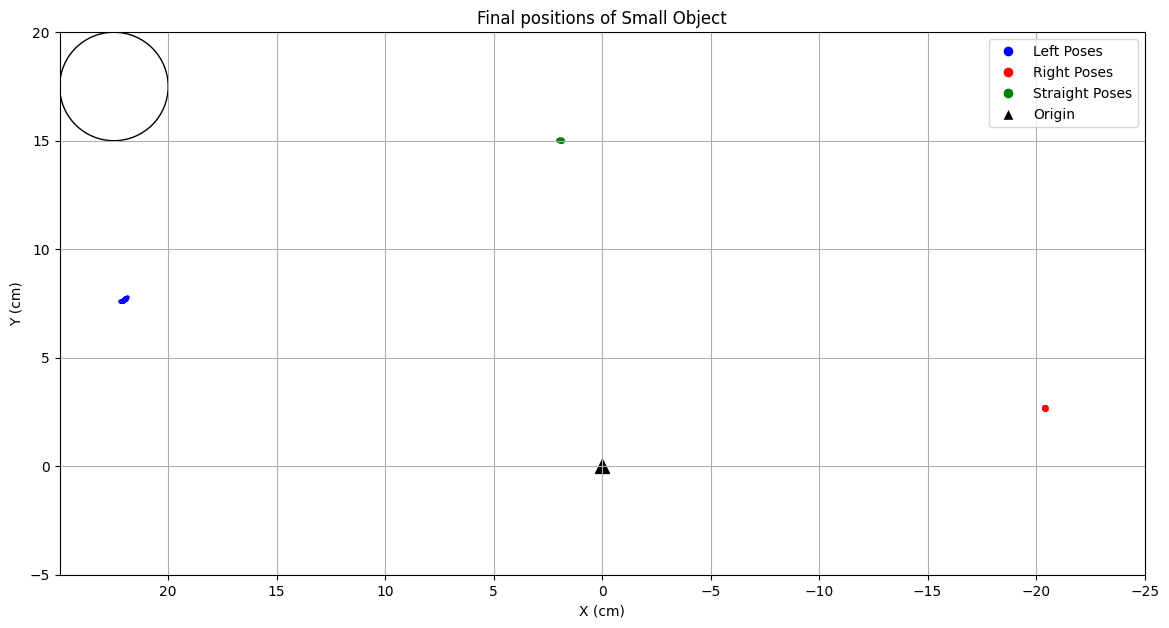

In [36]:
#Plot Points
df_small_left_dist = []
df_small_right_dist = []
df_small_straight_dist = []

for i in range(0, 25):
    arr_left = np.array([df_small_left['Position-X'][i], df_small_left['Position-Y'][i], df_small_left['Position-Z'][i]])[:, np.newaxis]
    arr_right = np.array([df_small_right['Position-X'][i], df_small_right['Position-Y'][i], df_small_right['Position-Z'][i]])[:, np.newaxis]
    arr_straight = np.array([df_small_straight['Position-X'][i], df_small_straight['Position-Y'][i], df_small_straight['Position-Z'][i]])[:, np.newaxis]
    
    new_left = arr_left - org
    new_right = arr_right - org
    new_straight = arr_straight - org

    df_small_left_dist.append(new_left)
    df_small_right_dist.append(new_right)
    df_small_straight_dist.append(new_straight)
    
    plt.scatter(new_left[0], new_left[2], color='b', s=5)
    plt.scatter(new_right[0], new_right[2], color='r', s=5)
    plt.scatter(new_straight[0], new_straight[2], color='g', s=5)

# Plot Circle
circ = plt.Circle((22.5, 17.5), radius=2.5, edgecolor='k', facecolor='None')
origin = plt.scatter(0, 0, color='k', s=100, marker='^', label='Origin')

# Set axis limits
ax = plt.gca()
ax.set_xlim([25, -25])
ax.set_ylim([-5, 20])
ax.add_patch(circ)
ax.set_aspect('equal', 'box')

# Add Grid, labels and Create custom legend markers
plt.title("Final positions of Small Object")
plt.xlabel('X (cm)')
plt.ylabel('Y (cm)')
# plt.legend(['Left Poses (blue)', 'Right Poses (red)', 'Straight Poses (green)', 'Origin (black)'])
# 
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Left Poses', markerfacecolor='b', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Right Poses', markerfacecolor='r', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Straight Poses', markerfacecolor='g', markersize=8),
    Line2D([0], [0], marker='^', color='w', label='Origin', markerfacecolor='k', markersize=8)
]
plt.legend(handles=legend_elements)
plt.xticks(np.arange(-25, 25, step=5))
plt.grid()

# Set figure size and ahow plot
fig = plt.gcf()
fig.set_size_inches(14, 9)
plt.show()

### Combined Comparisions

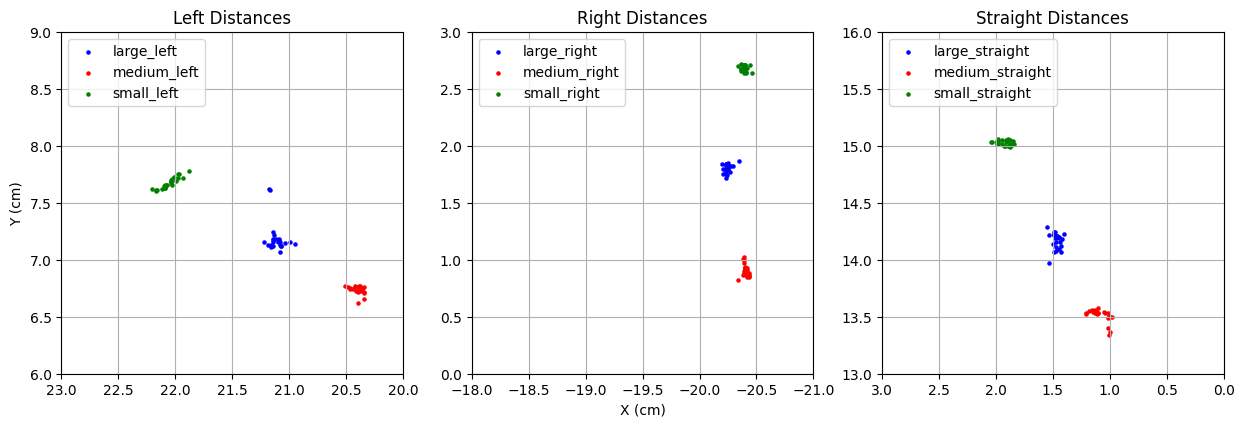

In [37]:
fig, axs = plt.subplots(1, 3)

for i in range(0, 25):
    axs[0].scatter(df_large_left_dist[i][0], df_large_left_dist[i][2], color='b', s=5, label='large_left' if i == 0 else "")
    axs[0].scatter(df_medium_left_dist[i][0], df_medium_left_dist[i][2], color='r', s=5, label='medium_left' if i == 0 else "")
    axs[0].scatter(df_small_left_dist[i][0], df_small_left_dist[i][2], color='g', s=5, label='small_left' if i == 0 else "")

    axs[1].scatter(df_large_right_dist[i][0], df_large_right_dist[i][2], color='b', s=5, label='large_right' if i == 0 else "")
    axs[1].scatter(df_medium_right_dist[i][0], df_medium_right_dist[i][2], color='r', s=5, label='medium_right' if i == 0 else "")
    axs[1].scatter(df_small_right_dist[i][0], df_small_right_dist[i][2], color='g', s=5, label='small_right' if i == 0 else "")

    axs[2].scatter(df_large_straight_dist[i][0], df_large_straight_dist[i][2], color='b', s=5, label='large_straight' if i == 0 else "")
    axs[2].scatter(df_medium_straight_dist[i][0], df_medium_straight_dist[i][2], color='r', s=5, label='medium_straight' if i == 0 else "")
    axs[2].scatter(df_small_straight_dist[i][0], df_small_straight_dist[i][2], color='g', s=5, label='small_straight' if i == 0 else "")

# Set axis limit
axs[0].set_xlim(23, 20)
axs[0].set_ylim(6, 9)
axs[0].set_title('Left Distances')
axs[0].set_aspect('equal', 'box')
axs[0].grid()
axs[0].legend(loc='upper left')

axs[1].set_xlim(-18, -21)
axs[1].set_ylim(0, 3)
axs[1].set_title('Right Distances')
axs[1].set_aspect('equal', 'box')
axs[1].grid()
axs[1].legend(loc='upper left')

axs[2].set_xlim(3, 0)
axs[2].set_ylim(13, 16)
axs[2].set_title('Straight Distances')
axs[2].set_aspect('equal', 'box')
axs[2].grid()
axs[2].legend(loc='upper left')

axs[1].set_xlabel('X (cm)')
axs[0].set_ylabel('Y (cm)')

# Adjust figure size
fig.set_figheight(18)
fig.set_figwidth(15)
plt.show()

## 5.5 Experimental Pose Filtering Procedure: Outlier Removal

In [38]:
#Common Functions
def get_inliers(data, pp1):
    '''
    Single pass of Chebyshev Outlier removal
    '''
    mu1 = np.mean(data)
    sigma1 = np.std(data)
    k1 = 1. / np.sqrt(pp1)
    odv1u = mu1 + (k1 * sigma1)
    odv1l = mu1 - (k1 * sigma1)

    # inlier_indices = np.where((data <= odv1u) & (data >= odv1l))[0]
    inlier_indices = np.where((data <= odv1u))[0]
    return inlier_indices

def filter_and_plot_inliers_outliers_from_list(
    ax, 
    data_list, 
    pp1=0.5, 
    marker_size=50, 
    circle_center=None, 
    circle_radius=None, 
    xlim=None, 
    ylim=None
):
    """
    Filters inliers and outliers from a list of arrays and plots them.

    Parameters:
    - ax: Matplotlib axis where the data will be plotted.
    - data_list: List of arrays, where each array contains data.
    - pp1: Chebyshev parameter for distance thresholding.
    - marker_size: Size of the markers in the plot.
    - circle_center: Tuple (x, y) for the center of the circle. If None, no circle is plotted.
    - circle_radius: Radius of the circle to be plotted. Used only if circle_center is provided.
    - xlim: Tuple (xmin, xmax) for x-axis limits. If None, limits are not set.
    - ylim: Tuple (ymin, ymax) for y-axis limits. If None, limits are not set.

    Returns:
    - inliers_x: X-coordinates of inliers.
    - inliers_y: Y-coordinates of inliers.
    - outliers_x: X-coordinates of outliers.
    - outliers_y: Y-coordinates of outliers.
    """
    x_vals = np.array([arr[0] for arr in data_list])
    y_vals = np.array([arr[2] for arr in data_list])

    mean_x = np.mean(x_vals)
    mean_y = np.mean(y_vals)

    distances_to_mean = np.sqrt((x_vals - mean_x)**2 + (y_vals - mean_y)**2)
    closest_index = np.argmin(distances_to_mean)
    closest_x, closest_y = x_vals[closest_index], y_vals[closest_index]

    distances = np.sqrt((x_vals - closest_x)**2 + (y_vals - closest_y)**2)

    inlier_indices = get_inliers(distances, pp1=pp1)

    inliers_x = x_vals[inlier_indices]
    inliers_y = y_vals[inlier_indices]

    outliers_x = np.delete(x_vals, inlier_indices)
    outliers_y = np.delete(y_vals, inlier_indices)
    
    print(f"Number of inliers: {len(inliers_x)}")
    print(f"Number of outliers: {len(outliers_x)}")

    ax.scatter(inliers_x, inliers_y, marker='.', s=marker_size, color='c', label='Inliers')
    ax.scatter(outliers_x, outliers_y, marker='.', s=marker_size, color='m', label='Outliers')
    ax.legend()

    if circle_center and circle_radius:
        circle = plt.Circle(circle_center, circle_radius, color='k', fill=False, label='Circle Test')
        ax.add_patch(circle)

    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)

    return inliers_x, inliers_y, outliers_x, outliers_y

### 5.5.1 Outlier Filtering for Large Object

Number of inliers: 23
Number of outliers: 2
Number of inliers: 23
Number of outliers: 2
Number of inliers: 23
Number of outliers: 2


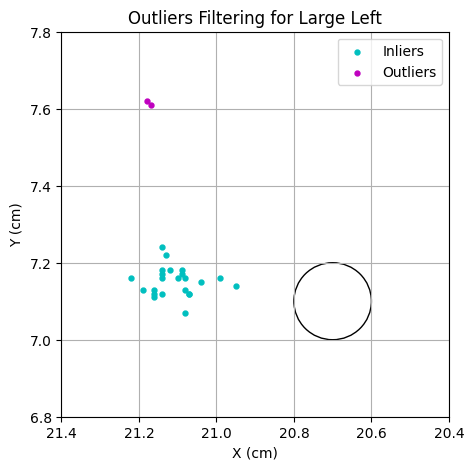

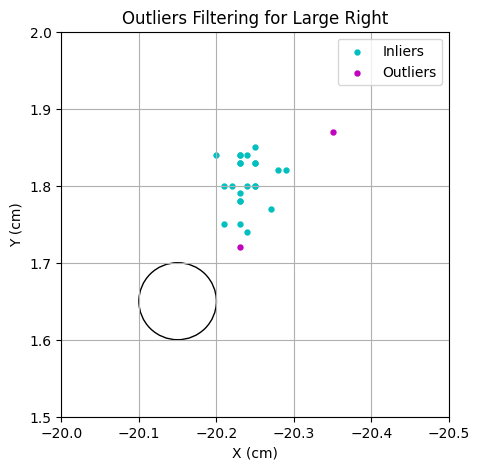

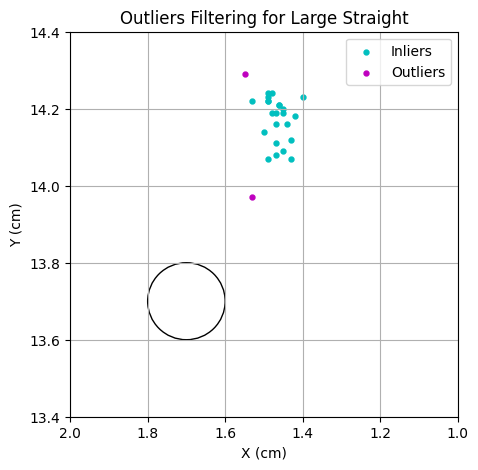

In [39]:
pp_One = 0.5

# Left large----------------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))

# Define circle parameters and axis limits
circle_center = (20.7, 7.1)
circle_radius = 0.1
xlim = (21.4, 20.4)
ylim = (6.8, 7.8)

ll_inliers_x, ll_inliers_y, ll_outliers_x, ll_outliers_y = filter_and_plot_inliers_outliers_from_list(
    ax=ax,
    data_list=df_large_left_dist,
    pp1=pp_One,
    circle_center=circle_center,
    circle_radius=circle_radius,
    xlim=xlim,
    ylim=ylim
)

ax.set_title("Outliers Filtering for Large Left")
ax.set_xlabel("X (cm)")
ax.set_ylabel("Y (cm)")
ax.grid()

#Right Large---------------------------------------------------------------------------------------------
fig2, ax2 = plt.subplots(figsize=(5, 5))

# Define circle parameters and axis limits
circle_center2 = (-20.15, 1.65)
circle_radius2 = 0.05
xlim2 = (-20, -20.5)
ylim2 = (1.5, 2)

lr_inliers_x, lr_inliers_y, lr_outliers_x, lr_outliers_y = filter_and_plot_inliers_outliers_from_list(
    ax=ax2,
    data_list=df_large_right_dist,
    pp1=pp_One,
    circle_center=circle_center2,
    circle_radius=circle_radius2,
    xlim=xlim2,
    ylim=ylim2
)

ax2.set_title("Outliers Filtering for Large Right")
ax2.set_xlabel("X (cm)")
ax2.set_ylabel("Y (cm)")
ax2.grid()

#Straight Large---------------------------------------------------------------------------------------------
fig3, ax3 = plt.subplots(figsize=(5, 5))

# Define circle parameters and axis limits
circle_center3 = (1.7, 13.7)
circle_radius3 = 0.1
xlim3 = (2, 1)
ylim3 = (13.4, 14.4)

ls_inliers_x, ls_inliers_y, ls_outliers_x, ls_outliers_y = filter_and_plot_inliers_outliers_from_list(
    ax=ax3,
    data_list=df_large_straight_dist,
    pp1=pp_One,
    circle_center=circle_center3,
    circle_radius=circle_radius3,
    xlim=xlim3,
    ylim=ylim3
)

ax3.set_title("Outliers Filtering for Large Straight")
ax3.set_xlabel("X (cm)")
ax3.set_ylabel("Y (cm)")
ax3.grid()

plt.show()

### 5.5.2 Outlier Filtering for Medium Object

Number of inliers: 22
Number of outliers: 3
Number of inliers: 22
Number of outliers: 3
Number of inliers: 22
Number of outliers: 3


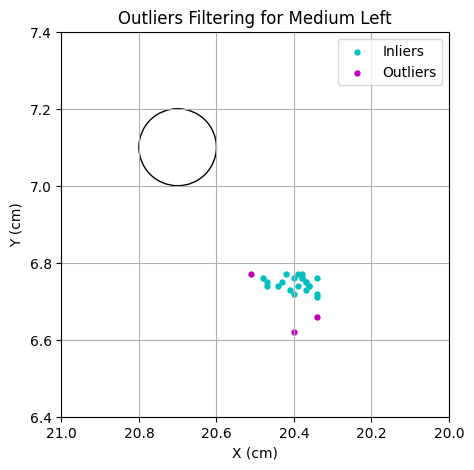

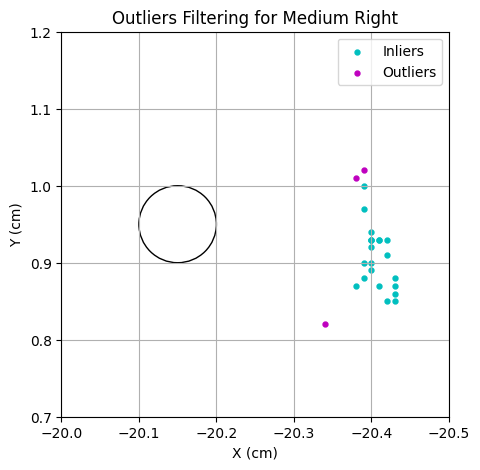

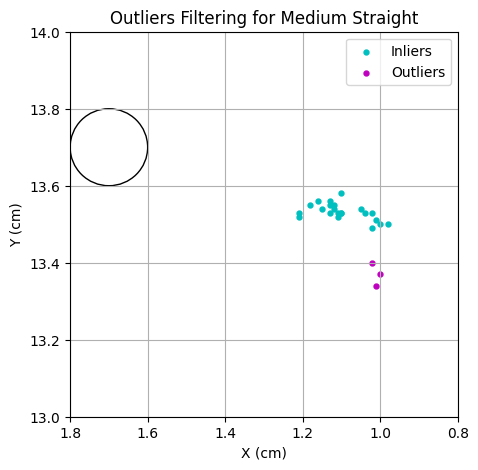

In [40]:
pp_One = 0.5

# Left Medium----------------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))

# Define circle parameters and axis limits
circle_center = (20.7, 7.1)
circle_radius = 0.1
xlim = (21, 20)
ylim = (6.4, 7.4)

ml_inliers_x, ml_inliers_y, ml_outliers_x, ml_outliers_y = filter_and_plot_inliers_outliers_from_list(
    ax=ax,
    data_list=df_medium_left_dist,
    pp1=pp_One,
    circle_center=circle_center,
    circle_radius=circle_radius,
    xlim=xlim,
    ylim=ylim
)

ax.set_title("Outliers Filtering for Medium Left")
ax.set_xlabel("X (cm)")
ax.set_ylabel("Y (cm)")
ax.grid()

#Right Medium---------------------------------------------------------------------------------------------
fig2, ax2 = plt.subplots(figsize=(5, 5))

# Define circle parameters and axis limits
circle_center2 = (-20.15, 0.95)
circle_radius2 = 0.05
xlim2 = (-20, -20.5)
ylim2 = (0.7, 1.2)

mr_inliers_x, mr_inliers_y, mr_outliers_x, mr_outliers_y = filter_and_plot_inliers_outliers_from_list(
    ax=ax2,
    data_list=df_medium_right_dist,
    pp1=pp_One,
    circle_center=circle_center2,
    circle_radius=circle_radius2,
    xlim=xlim2,
    ylim=ylim2
)

ax2.set_title("Outliers Filtering for Medium Right")
ax2.set_xlabel("X (cm)")
ax2.set_ylabel("Y (cm)")
ax2.grid()

#Straight Medium---------------------------------------------------------------------------------------------
fig3, ax3 = plt.subplots(figsize=(5, 5))

# Define circle parameters and axis limits
circle_center3 = (1.7, 13.7)
circle_radius3 = 0.1
xlim3 = (1.8, 0.8)
ylim3 = (13, 14)

ms_inliers_x, ms_inliers_y, ms_outliers_x, ms_outliers_y = filter_and_plot_inliers_outliers_from_list(
    ax=ax3,
    data_list=df_medium_straight_dist,
    pp1=pp_One,
    circle_center=circle_center3,
    circle_radius=circle_radius3,
    xlim=xlim3,
    ylim=ylim3
)

ax3.set_title("Outliers Filtering for Medium Straight")
ax3.set_xlabel("X (cm)")
ax3.set_ylabel("Y (cm)")
ax3.grid()

plt.show()

### 5.5.2 Outlier Filtering for Small Object

Number of inliers: 23
Number of outliers: 2
Number of inliers: 23
Number of outliers: 2
Number of inliers: 23
Number of outliers: 2


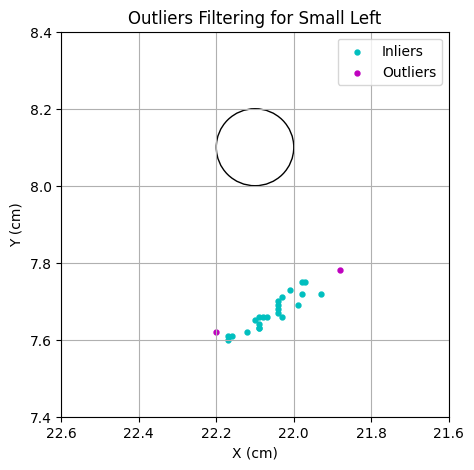

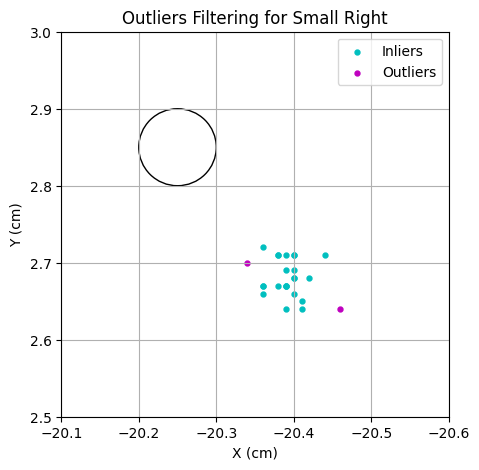

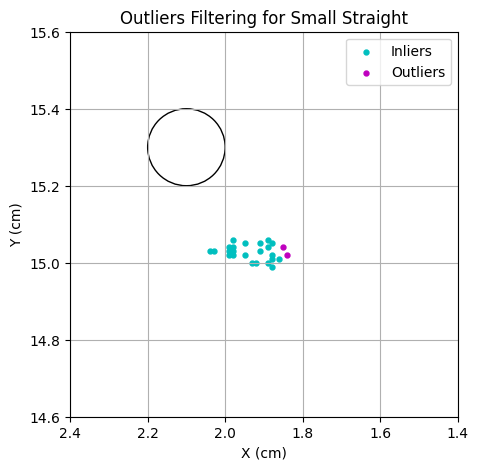

In [41]:
pp_One = 0.5

# Left Small----------------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))

# Define circle parameters and axis limits
circle_center = (22.1, 8.1)
circle_radius = 0.1
xlim = (22.6, 21.6)
ylim = (7.4, 8.4)

sl_inliers_x, sl_inliers_y, sl_outliers_x, sl_outliers_y = filter_and_plot_inliers_outliers_from_list(
    ax=ax,
    data_list=df_small_left_dist,
    pp1=pp_One,
    circle_center=circle_center,
    circle_radius=circle_radius,
    xlim=xlim,
    ylim=ylim
)

ax.set_title("Outliers Filtering for Small Left")
ax.set_xlabel("X (cm)")
ax.set_ylabel("Y (cm)")
ax.grid()

#Right Small---------------------------------------------------------------------------------------------
fig2, ax2 = plt.subplots(figsize=(5, 5))

# Define circle parameters and axis limits
circle_center2 = (-20.25, 2.85)
circle_radius2 = 0.05
xlim2 = (-20.1, -20.6)
ylim2 = (2.5, 3)

sr_inliers_x, sr_inliers_y, sr_outliers_x, sr_outliers_y = filter_and_plot_inliers_outliers_from_list(
    ax=ax2,
    data_list=df_small_right_dist,
    pp1=pp_One,
    circle_center=circle_center2,
    circle_radius=circle_radius2,
    xlim=xlim2,
    ylim=ylim2
)

ax2.set_title("Outliers Filtering for Small Right")
ax2.set_xlabel("X (cm)")
ax2.set_ylabel("Y (cm)")
ax2.grid()

#Straight Small---------------------------------------------------------------------------------------------
fig3, ax3 = plt.subplots(figsize=(5, 5))

# Define circle parameters and axis limits
circle_center3 = (2.1, 15.3)
circle_radius3 = 0.1
xlim3 = (2.4, 1.4)
ylim3 = (14.6, 15.6)

ss_inliers_x, ss_inliers_y, ss_outliers_x, ss_outliers_y = filter_and_plot_inliers_outliers_from_list(
    ax=ax3,
    data_list=df_small_straight_dist,
    pp1=pp_One,
    circle_center=circle_center3,
    circle_radius=circle_radius3,
    xlim=xlim3,
    ylim=ylim3
)

ax3.set_title("Outliers Filtering for Small Straight")
ax3.set_xlabel("X (cm)")
ax3.set_ylabel("Y (cm)")
ax3.grid()

plt.show()

### Outliers in Data

| Object Size    | Direction | No. of Outliers | No. of Inliers |
| -------- | ------- | ------- | -------- |
| Small  | Straight    | 2 | 23 |
| Small | Left     | 2 | 23 |
| Small    | Right | 2 | 23 |
| -------- | ------- | ------- | -------- |
| Medium  | Straight   | 3 | 22 |
| Medium | Left    | 3 | 22 |
| Medium    | Right   | 3 | 22 |
| -------- | ------- | ------- | -------- |
| Large  | Straight    | 2 | 23 |
| Large | Left     | 2 | 23 |
| Large    | Right  | 2 | 23 |


## 5.6 Gaussian Filtering

In [42]:
#Common Function
def plot_gaussian_fit_multiple(
    x1_inliers, y1_inliers,
    x2_inliers, y2_inliers,
    x3_inliers, y3_inliers,
    bins, figsize=(15, 15)
):
    """
    Plots Gaussian fits for three sets of x and y inliers and returns the PDF values.

    Parameters:
    - x1_inliers, y1_inliers: Inlier values for dataset 1 (x and y).
    - x2_inliers, y2_inliers: Inlier values for dataset 2 (x and y).
    - x3_inliers, y3_inliers: Inlier values for dataset 3 (x and y).
    - bins: Number of bins for the histograms.
    - figsize: Tuple specifying figure size.

    Returns:
    - A dictionary with the x and y PDFs for each dataset.
    """
    def calculate_pdf(data, label):
        mu, sigma = np.mean(data), np.std(data)
        vals = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
        pdf = norm.pdf(vals, mu, sigma)
        return vals, pdf, mu, sigma

    # Calculate PDFs
    x1_vals, pdf_x1, mu_x1, sigma_x1 = calculate_pdf(x1_inliers, "X1")
    y1_vals, pdf_y1, mu_y1, sigma_y1 = calculate_pdf(y1_inliers, "Y1")

    x2_vals, pdf_x2, mu_x2, sigma_x2 = calculate_pdf(x2_inliers, "X2")
    y2_vals, pdf_y2, mu_y2, sigma_y2 = calculate_pdf(y2_inliers, "Y2")

    x3_vals, pdf_x3, mu_x3, sigma_x3 = calculate_pdf(x3_inliers, "X3")
    y3_vals, pdf_y3, mu_y3, sigma_y3 = calculate_pdf(y3_inliers, "Y3")

    fig, axs = plt.subplots(3, 2, figsize=figsize)

    #----------------------------------------------------------------------------------------
    axs[0, 0].set_title('Gaussian Fit for Left_X')
    axs[0, 0].hist(x1_inliers, bins=bins, density=True, alpha=0.6, color='g', label='Left_X Data')
    axs[0, 0].plot(x1_vals, pdf_x1, color='blue', lw=2, label=f'Fit: $\mu_x$={mu_x1:.2f}, $\sigma_x$={sigma_x1:.2f}')
    axs[0, 0].legend()
    axs[0, 0].grid()

    axs[0, 1].set_title('Gaussian Fit for Left_Y')
    axs[0, 1].hist(y1_inliers, bins=bins, density=True, alpha=0.6, color='r', label='Left_Y Data')
    axs[0, 1].plot(y1_vals, pdf_y1, color='blue', lw=2, label=f'Fit: $\mu_y$={mu_y1:.2f}, $\sigma_y$={sigma_y1:.2f}')
    axs[0, 1].legend()
    axs[0, 1].grid()

    # ---------------------------------------------------------------------------------------------
    axs[1, 0].set_title('Gaussian Fit for Right_X')
    axs[1, 0].hist(x2_inliers, bins=bins, density=True, alpha=0.6, color='g', label='Right_X2 Data')
    axs[1, 0].plot(x2_vals, pdf_x2, color='blue', lw=2, label=f'Fit: $\mu_x$={mu_x2:.2f}, $\sigma_x$={sigma_x2:.2f}')
    axs[1, 0].legend()
    axs[1, 0].grid()

    axs[1, 1].set_title('Gaussian Fit for Right_Y')
    axs[1, 1].hist(y2_inliers, bins=bins, density=True, alpha=0.6, color='r', label='Right_Y Data')
    axs[1, 1].plot(y2_vals, pdf_y2, color='blue', lw=2, label=f'Fit: $\mu_y$={mu_y2:.2f}, $\sigma_y$={sigma_y2:.2f}')
    axs[1, 1].legend()
    axs[1, 1].grid()

    # --------------------------------------------------------------------------------------------
    axs[2, 0].set_title('Gaussian Fit for Straight_X')
    axs[2, 0].hist(x3_inliers, bins=bins, density=True, alpha=0.6, color='g', label='Straight_X Data')
    axs[2, 0].plot(x3_vals, pdf_x3, color='blue', lw=2, label=f'Fit: $\mu_x$={mu_x3:.2f}, $\sigma_x$={sigma_x3:.2f}')
    axs[2, 0].legend()
    axs[2, 0].grid()

    axs[2, 1].set_title('Gaussian Fit for Straight_Y')
    axs[2, 1].hist(y3_inliers, bins=bins, density=True, alpha=0.6, color='r', label='Straight_Y Data')
    axs[2, 1].plot(y3_vals, pdf_y3, color='blue', lw=2, label=f'Fit: $\mu_y$={mu_y3:.2f}, $\sigma_y$={sigma_y3:.2f}')
    axs[2, 1].legend()
    axs[2, 1].grid()

    for row in axs:
        for ax in row:
            ax.set_xlabel('Value')
            ax.set_ylabel('Density')

    plt.tight_layout()
    plt.show()

    return {
        'Dataset1': {'x_vals': x1_vals, 'pdf_x': pdf_x1, 'y_vals': y1_vals, 'pdf_y': pdf_y1},
        'Dataset2': {'x_vals': x2_vals, 'pdf_x': pdf_x2, 'y_vals': y2_vals, 'pdf_y': pdf_y2},
        'Dataset3': {'x_vals': x3_vals, 'pdf_x': pdf_x3, 'y_vals': y3_vals, 'pdf_y': pdf_y3}
    }

### 5.6.1 Gaussian Filtering for Large Object

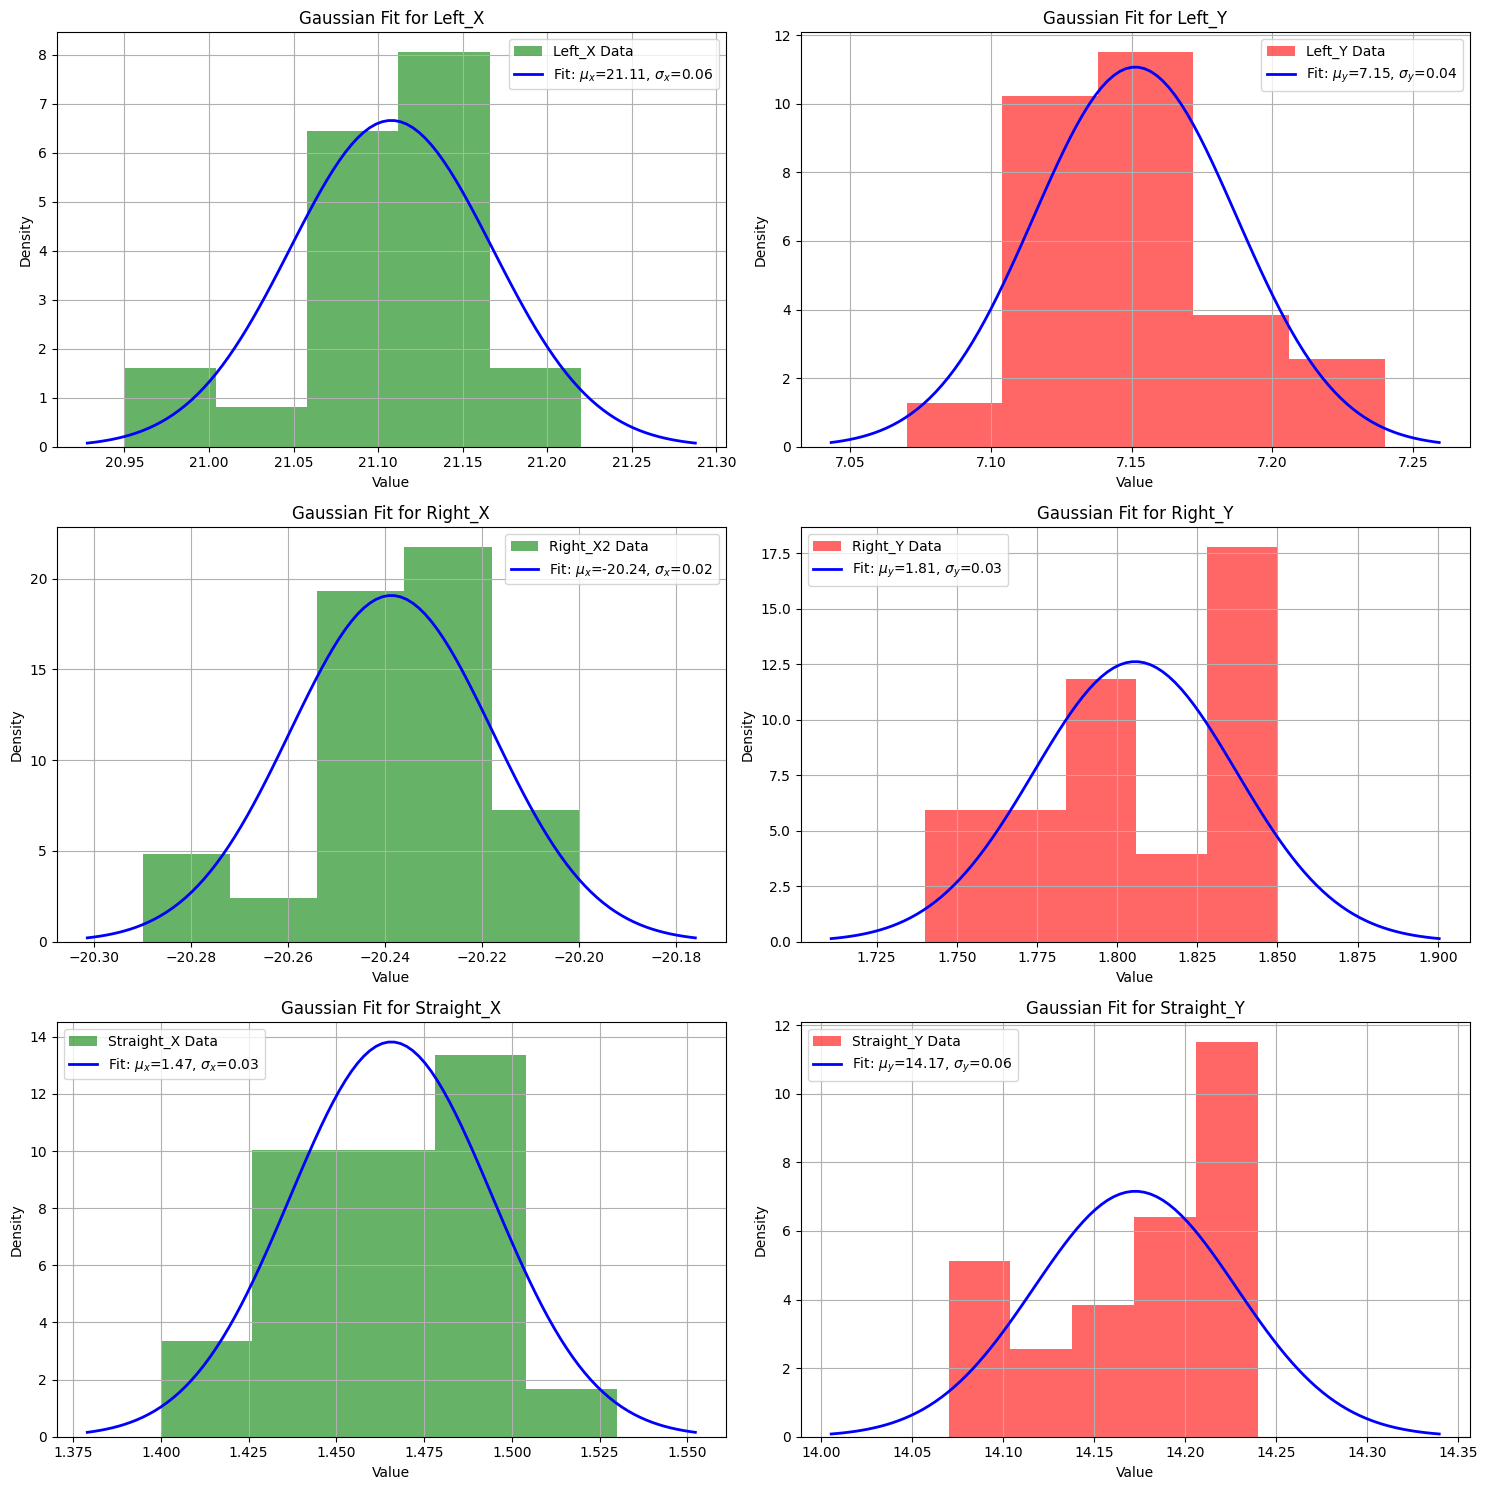

In [43]:
# Large Object gaussian filtering
x1_inliers, y1_inliers = ll_inliers_x, ll_inliers_y
x2_inliers, y2_inliers = lr_inliers_x, lr_inliers_y
x3_inliers, y3_inliers = ls_inliers_x, ls_inliers_y

pdfs_large = plot_gaussian_fit_multiple(x1_inliers, y1_inliers, x2_inliers, y2_inliers, x3_inliers, y3_inliers, bins=5)

### 5.6.2 Gaussian Filtering for Medium Object

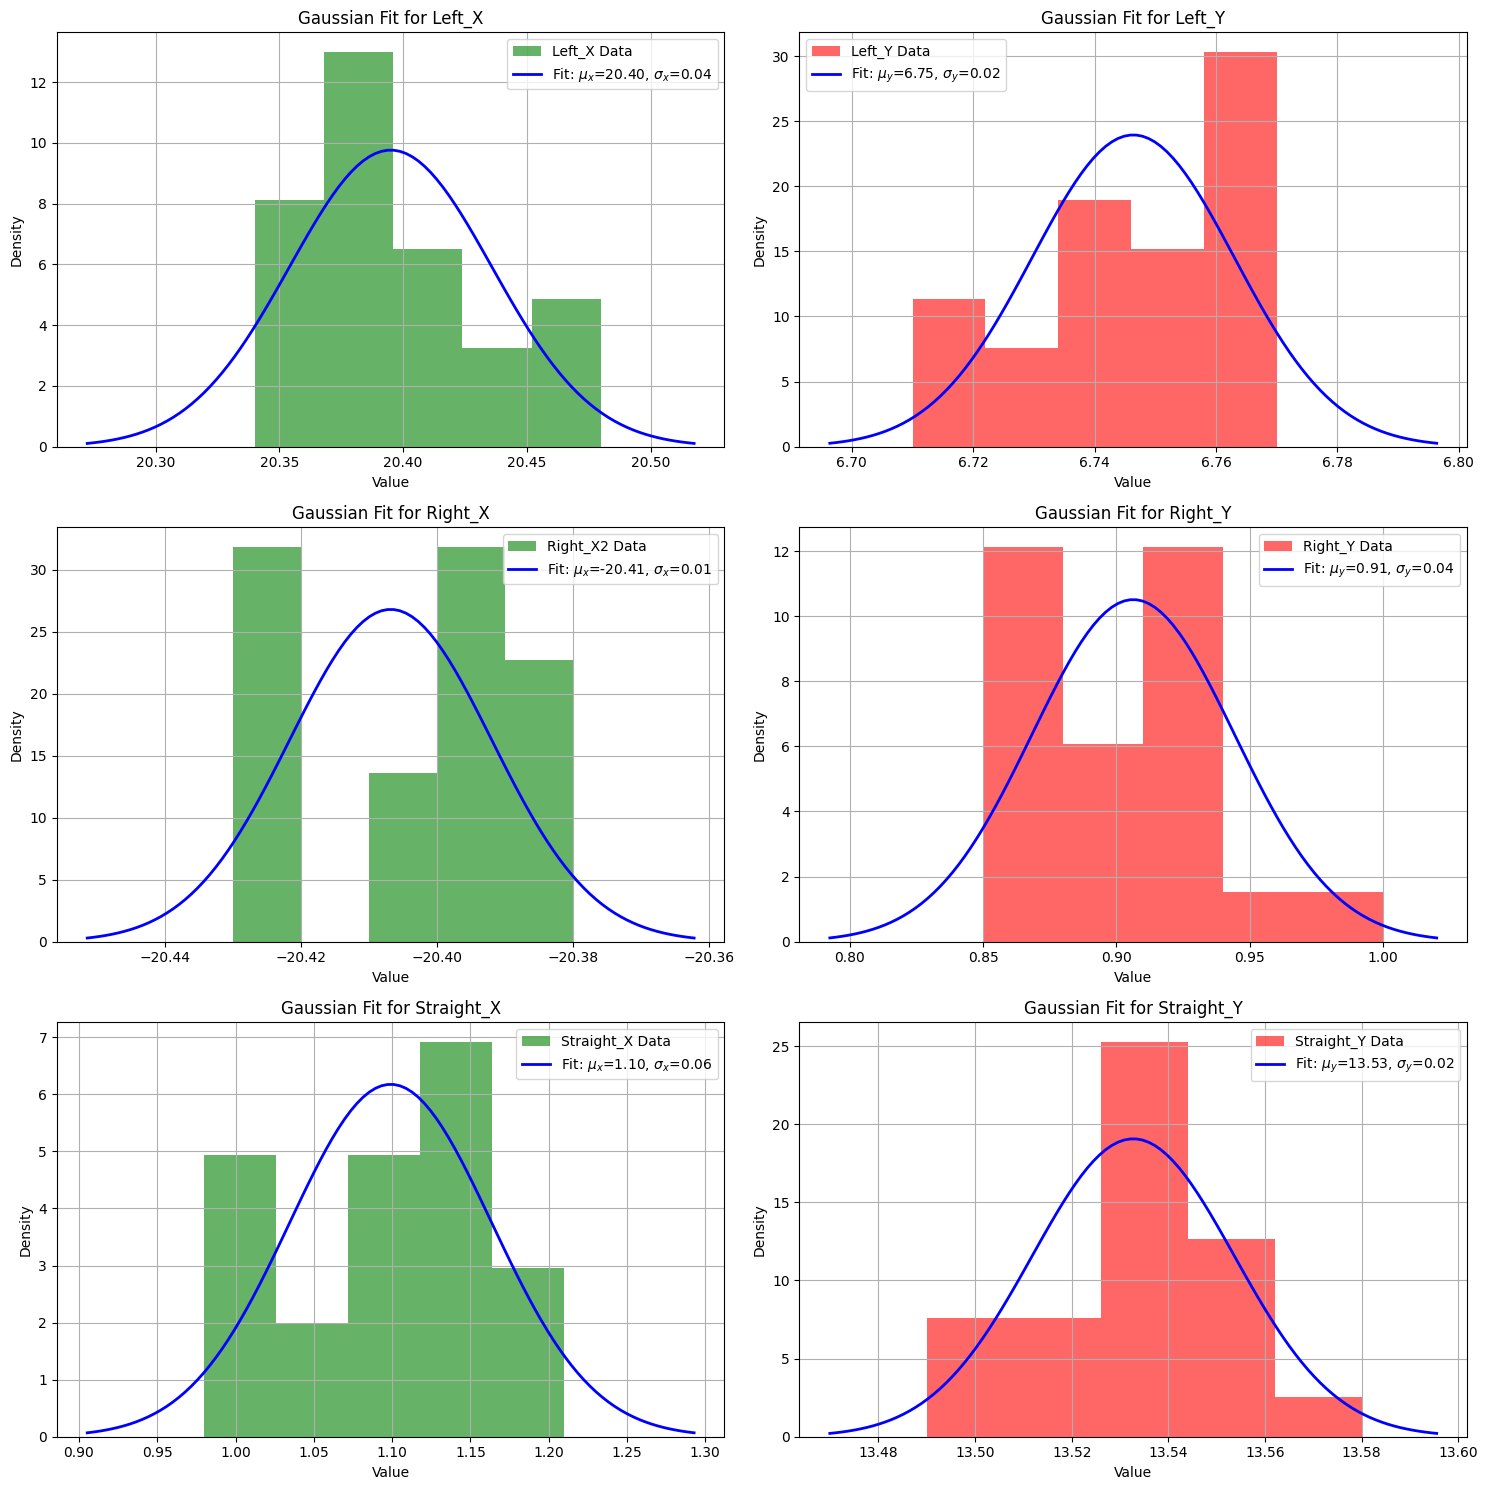

In [44]:
# Medium Object gaussian filtering
x1_inliers, y1_inliers = ml_inliers_x, ml_inliers_y
x2_inliers, y2_inliers = mr_inliers_x, mr_inliers_y
x3_inliers, y3_inliers = ms_inliers_x, ms_inliers_y

pdfs_large = plot_gaussian_fit_multiple(x1_inliers, y1_inliers, x2_inliers, y2_inliers, x3_inliers, y3_inliers, bins=5)

### 5.6.3 Gaussian Filtering for Small Object

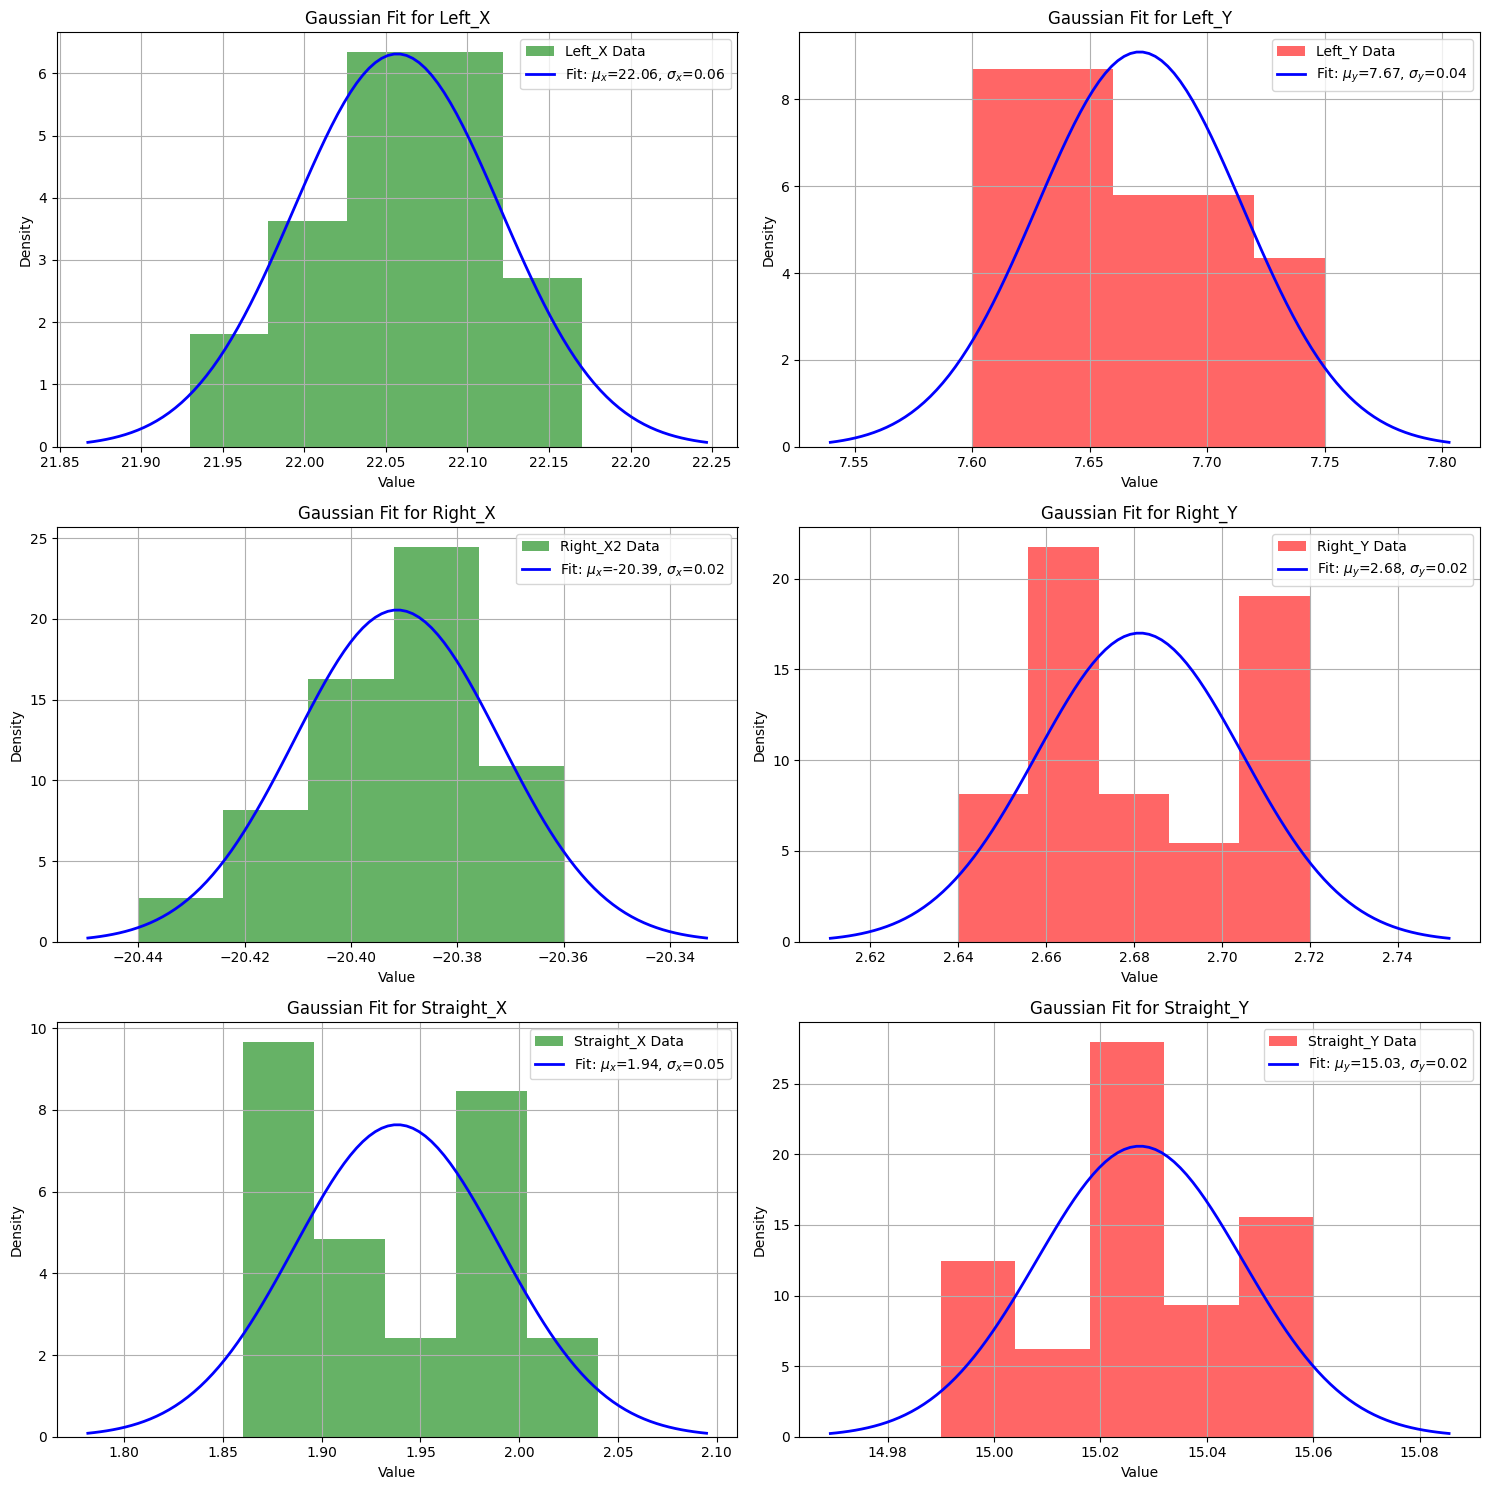

In [45]:
# Small Object gaussian filtering
x1_inliers, y1_inliers = sl_inliers_x, sl_inliers_y
x2_inliers, y2_inliers = sr_inliers_x, sr_inliers_y
x3_inliers, y3_inliers = ss_inliers_x, ss_inliers_y

pdfs_large = plot_gaussian_fit_multiple(x1_inliers, y1_inliers, x2_inliers, y2_inliers, x3_inliers, y3_inliers, bins=5)

In [46]:
# For Saving Inlier CSV
def create_dataframe_from_lists(lists, column_names):
    """
    Create a DataFrame.

    Parameters:
        lists: A list where each element is a list.
        column_names (list of str): A list of column names corresponding to each list.

    Returns:
        pd.DataFrame: A DataFrame containing all lists as columns.
    """
    if len(lists) != len(column_names):
        raise ValueError("The number of lists and column names must match.")
   

    dataframes = [pd.DataFrame(data, columns=[name]) for data, name in zip(lists, column_names)]
    result_df = pd.concat(dataframes, axis=1)
    return result_df


inlier_names = [ll_inliers_x, ll_inliers_y, lr_inliers_x, lr_inliers_y, ls_inliers_x, ls_inliers_y,
               ml_inliers_x, ml_inliers_y, mr_inliers_x, mr_inliers_y, ms_inliers_x, ms_inliers_y,
               sl_inliers_x, sl_inliers_y, sr_inliers_x, sr_inliers_y, ss_inliers_x, ss_inliers_y]

column_names = ['ll_inliers_x', 'll_inliers_y', 'lr_inliers_x', 'lr_inliers_y', 'ls_inliers_x', 'ls_inliers_y',
               'ml_inliers_x', 'ml_inliers_y', 'mr_inliers_x', 'mr_inliers_y', 'ms_inliers_x', 'ms_inliers_y',
               'sl_inliers_x', 'sl_inliers_y', 'sr_inliers_x', 'sr_inliers_y', 'ss_inliers_x', 'ss_inliers_y']


inlier_df = create_dataframe_from_lists(inlier_names, column_names)
inlier_df.to_csv('CSVs/inlier_data.csv', index=False)  

## 5.7 ROS data plot

In [47]:
#Common Function
def plot_csv_data_from_folders(folders, folder_colors, x_label='X-axis', y_label='Y-axis', title='CSV Data Plot'):
    """
    Plots CSV data from multiple folders with unique colors and labels.

    Parameters:
    - folders (list of str): List of folder paths containing CSV files.
    - folder_colors (dict): Dictionary mapping folder paths to specific colors.
    - x_label (str): Label for the x-axis.
    - y_label (str): Label for the y-axis.
    - title (str): Title of the plot.
    """
    for folder in folders:
        folder_color = folder_colors.get(folder, 'black')  # Default to black
        files = glob.glob(folder + '*.csv')
        
        for idx, file_name in enumerate(files):
            df = pd.read_csv(file_name, low_memory=False, header=None)
            label = folder.split('/')[-2] if idx == 0 else None
            plt.plot(df[0], df[1], color=folder_color, label=label)
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    circ = plt.Circle((-0.05, -0.25), 0.05, color='k', fill=False, label='Circle Test')
    ax = plt.gca()
    ax.set_xlim([-0.10, 0.40])
    ax.set_ylim([-0.6, -0.1])
    ax.add_patch(circ)
    ax.set_aspect('equal', 'box')
    plt.grid()
    plt.title(title)
    plt.legend(loc='best', fontsize=8)  # Adjust legend font size
    plt.show()

### 5.7.1 Large Object

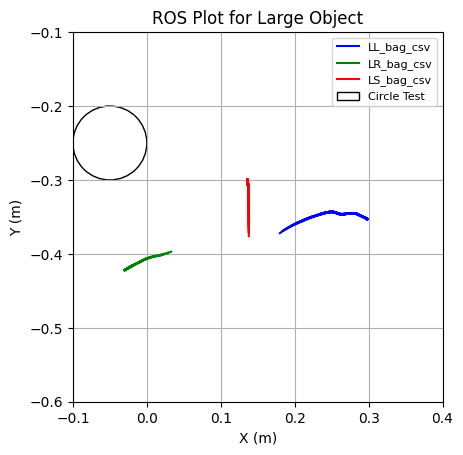

In [48]:
folders = ['CSVs/ROS_CSVs/LL_bag_csv/', 'CSVs/ROS_CSVs/LR_bag_csv/', 'CSVs/ROS_CSVs/LS_bag_csv/']

folder_colors = {
    'CSVs/ROS_CSVs/LL_bag_csv/': 'blue',
    'CSVs/ROS_CSVs/LR_bag_csv/': 'green',
    'CSVs/ROS_CSVs/LS_bag_csv/': 'red'
}
plot_csv_data_from_folders(
    folders=folders,
    folder_colors=folder_colors,
    x_label='X (m)',
    y_label='Y (m)',
    title='ROS Plot for Large Object'
)

### 5.7.2 Medium Object

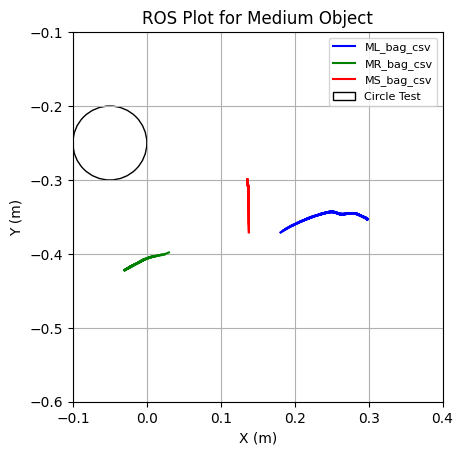

In [49]:
folders = ['CSVs/ROS_CSVs/ML_bag_csv/', 'CSVs/ROS_CSVs/MR_bag_csv/', 'CSVs/ROS_CSVs/MS_bag_csv/']

folder_colors = {
    'CSVs/ROS_CSVs/ML_bag_csv/': 'blue',
    'CSVs/ROS_CSVs/MR_bag_csv/': 'green',
    'CSVs/ROS_CSVs/MS_bag_csv/': 'red'
}
plot_csv_data_from_folders(
    folders=folders,
    folder_colors=folder_colors,
    x_label='X (m)',
    y_label='Y (m)',
    title='ROS Plot for Medium Object'
)

### 5.7.3 Small Object

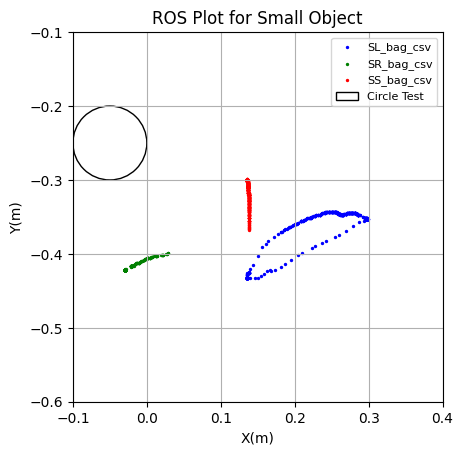

In [50]:
folders = ['CSVs/ROS_CSVs/SL_bag_csv/', 'CSVs/ROS_CSVs/SR_bag_csv/', 'CSVs/ROS_CSVs/SS_bag_csv/']

folder_colors = {
    'CSVs/ROS_CSVs/SL_bag_csv/': 'blue',
    'CSVs/ROS_CSVs/SR_bag_csv/': 'green',
    'CSVs/ROS_CSVs/SS_bag_csv/': 'red'
}

for folder in folders:
    folder_color = folder_colors.get(folder, 'black')  # Default to black 
    
    files = glob.glob(folder + '*.csv')
    
    for idx, file_name in enumerate(files):
        df = pd.read_csv(file_name, low_memory=False, header=None)
        
        label = folder.split('/')[-2] if idx == 0 else None 
        plt.scatter(df[0], df[1], color=folder_color, label=label, s=2)

circ = plt.Circle((-0.05, -0.25), 0.05, color='k', fill=False, label='Circle Test')
ax = plt.gca()
ax.set_xlim([-0.10, 0.40])
ax.set_ylim([-0.6, -0.1])
ax.add_patch(circ)
ax.set_aspect('equal', 'box')
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.title('ROS Plot for Small Object')
plt.legend(loc='best', fontsize=8)
plt.grid()
plt.show()

## 5.8 Combined data plot with other groups

 ### 5.8.1 Combined data for Large Object in Left direction

In [51]:
#Importing CSVs
data_team_1 = pd.read_csv('CSVs/Optitrack_CSVs/Combined data - Team 1.csv')
data_team_2 = pd.read_csv('CSVs/Optitrack_CSVs/Combined data - Team 2.csv')
data_team_3 = pd.read_csv('CSVs/Optitrack_CSVs/Combined data - Team 3.csv')

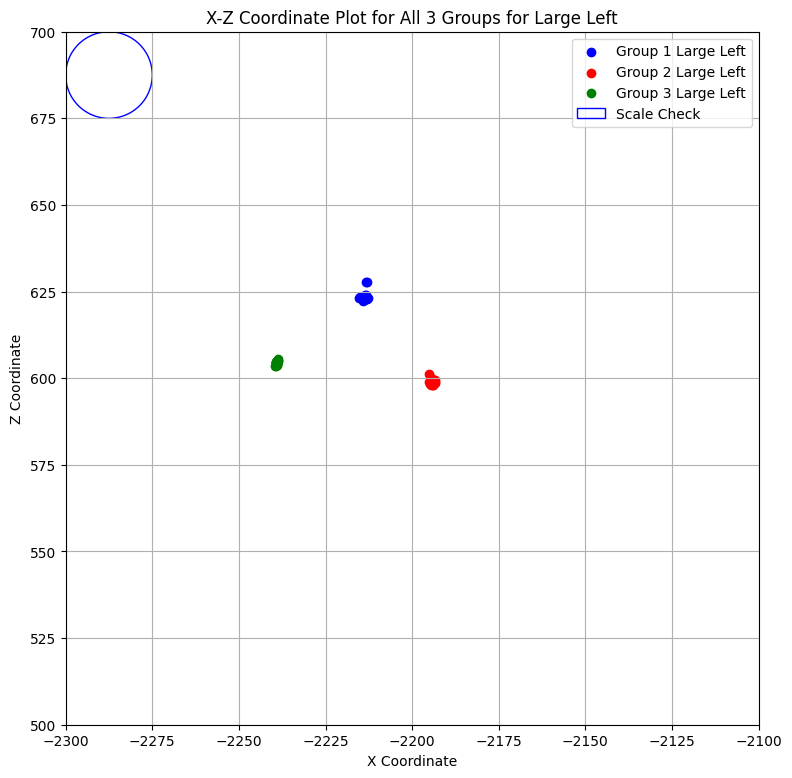

In [52]:
team_1_large_left_x, team_1_large_left_z = data_team_1['Large-LeftPosition-X'], data_team_1['Large-LeftPosition-Z']
team_2_large_left_x, team_2_large_left_z = data_team_2['Large-LeftPosition-X'], data_team_2['Large-LeftPosition-Z']
team_3_large_left_x, team_3_large_left_z = data_team_3['Large-LeftPosition-X'], data_team_3['Large-LeftPosition-Z']

plt.figure(figsize=(10, 10))
plt.xlim(-2300, -2100)
plt.ylim(500, 700)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.scatter(team_1_large_left_x, team_1_large_left_z, marker='o', linestyle='-', color='blue', label='Group 1 Large Left')
plt.scatter(team_2_large_left_x, team_2_large_left_z, marker='o', linestyle='-', color='red', label='Group 2 Large Left')
plt.scatter(team_3_large_left_x, team_3_large_left_z, marker='o', linestyle='-', color='green', label='Group 3 Large Left')

plt.title('X-Z Coordinate Plot for All 3 Groups for Large Left')
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')

plt.grid(True)

circ = plt.Circle((-2287.5, 687.5), radius=12.5, edgecolor='b', facecolor='None', label='Scale Check')
plt.gca().add_patch(circ)
# origin = plt.scatter(0, 0, color='k', s=100, marker='^', label='Origin')

# fig = plt.gcf()
fig = plt.gcf()
fig.set_size_inches(14, 9)
plt.legend()
plt.show()

 ### 5.8.2 Combined data for Large Object in Right direction

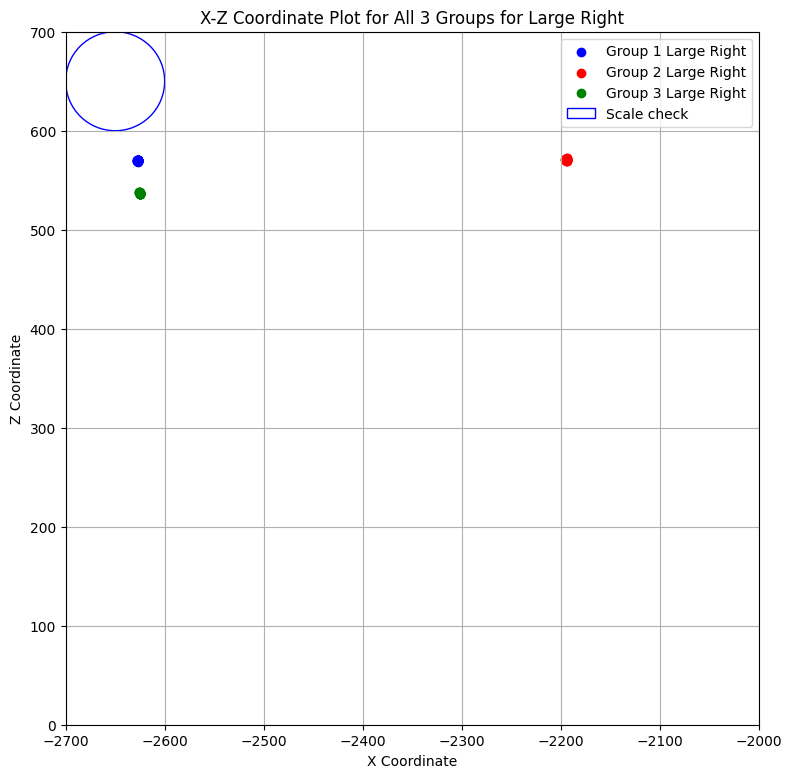

In [53]:
team_1_large_right_x, team_1_large_right_z = data_team_1['Large-RightPosition-X'], data_team_1['Large-RightPosition-Z']
team_2_large_right_x, team_2_large_right_z = data_team_2['Large-RightPosition-X'], data_team_2['Large-RightPosition-Z']
team_3_large_right_x, team_3_large_right_z = data_team_3['Large-RightPosition-X'], data_team_3['Large-RightPosition-Z']

plt.figure(figsize=(10, 10))
plt.xlim(-2700, -2000)
plt.ylim(0, 700)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.scatter(team_1_large_right_x, team_1_large_right_z, marker='o', linestyle='-', color='blue', label='Group 1 Large Right')
plt.scatter(team_2_large_right_x, team_2_large_right_z, marker='o', linestyle='-', color='red', label='Group 2 Large Right')
plt.scatter(team_3_large_right_x, team_3_large_right_z, marker='o', linestyle='-', color='green', label='Group 3 Large Right')

plt.title('X-Z Coordinate Plot for All 3 Groups for Large Right')
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')

plt.grid(True)

circle1 = plt.Circle((-2650, 650), 50, color='b', fill=False,  label = "Scale check")
plt.gca().add_patch(circle1)
# origin = plt.scatter(0, 0, color='k', s=100, marker='^', label='Origin')

fig = plt.gcf()
fig.set_size_inches(14, 9)
plt.legend()
plt.show()

 ### 5.8.3 Combined data for Large Object in Straight direction

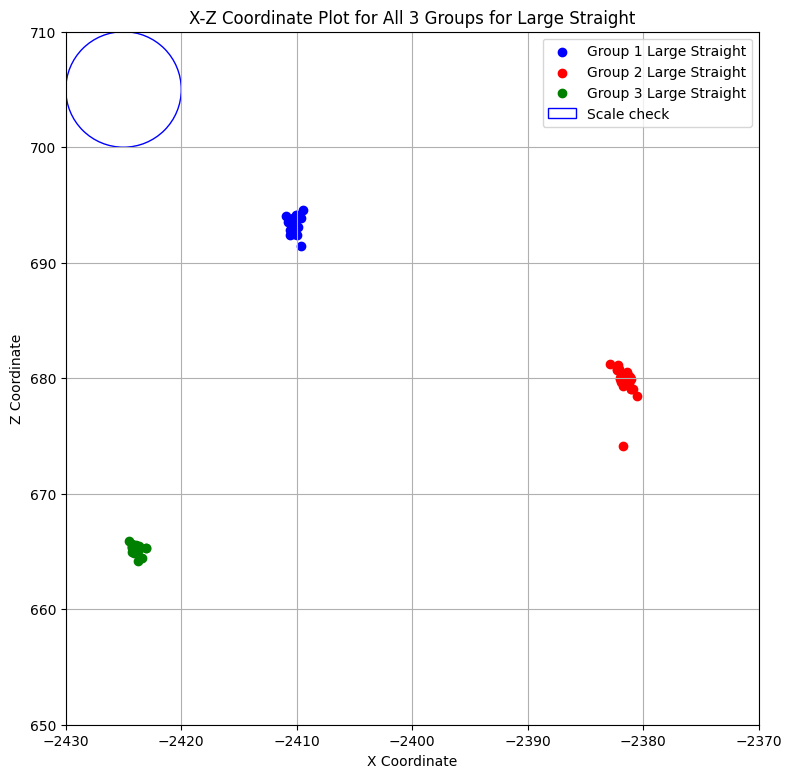

In [54]:
team_1_large_straight_x, team_1_large_straight_z = data_team_1['Large-StraightPosition-X'], data_team_1['Large-StraightPosition-Z']
team_2_large_straight_x, team_2_large_straight_z = data_team_2['Large-StraightPosition-X'], data_team_2['Large-StraightPosition-Z']
team_3_large_straight_x, team_3_large_straight_z = data_team_3['Large-StraightPosition-X'], data_team_3['Large-StraightPosition-Z']

plt.figure(figsize=(10, 10))
plt.xlim(-2430, -2370)
plt.ylim(650, 710)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.scatter(team_1_large_straight_x, team_1_large_straight_z, marker='o', linestyle='-', color='blue', label='Group 1 Large Straight')
plt.scatter(team_2_large_straight_x, team_2_large_straight_z, marker='o', linestyle='-', color='red', label='Group 2 Large Straight')
plt.scatter(team_3_large_straight_x, team_3_large_straight_z, marker='o', linestyle='-', color='green', label='Group 3 Large Straight')

plt.title('X-Z Coordinate Plot for All 3 Groups for Large Straight')
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')

plt.grid(True)

circle1 = plt.Circle((-2425, 705), 5, color='b', fill=False,  label = "Scale check")
plt.gca().add_patch(circle1)

# origin = plt.scatter(0, 0, color='k', s=100, marker='^', label='Origin')
fig = plt.gcf()
fig.set_size_inches(14, 9)
plt.legend()
plt.show()

### 5.8.4 Combined data for Medium Object in Left direction

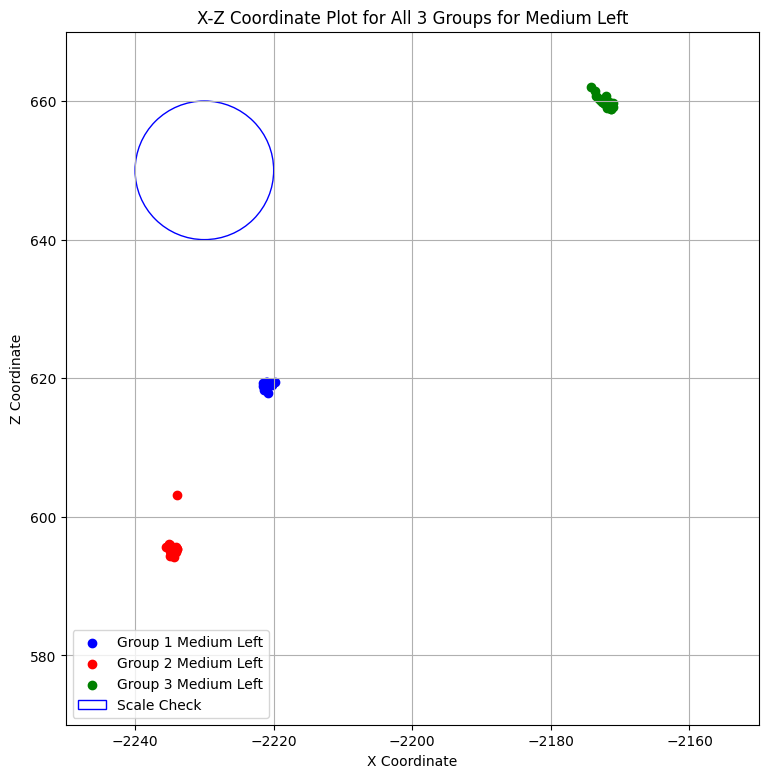

In [55]:
team_1_medium_left_x, team_1_medium_left_z = data_team_1['Medium-LeftPosition-X'], data_team_1['Medium-LeftPosition-Z']
team_2_medium_left_x, team_2_medium_left_z = data_team_2['Medium-LeftPosition-X'], data_team_2['Medium-LeftPosition-Z']
team_3_medium_left_x, team_3_medium_left_z = data_team_3['Medium-LeftPosition-X'], data_team_3['Medium-LeftPosition-Z']

plt.figure(figsize=(10, 10))
plt.xlim(-2250, -2150)
plt.ylim(570, 670)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.scatter(team_1_medium_left_x, team_1_medium_left_z, marker='o', linestyle='-', color='blue', label='Group 1 Medium Left')
plt.scatter(team_2_medium_left_x, team_2_medium_left_z, marker='o', linestyle='-', color='red', label='Group 2 Medium Left')
plt.scatter(team_3_medium_left_x, team_3_medium_left_z, marker='o', linestyle='-', color='green', label='Group 3 Medium Left')

plt.title('X-Z Coordinate Plot for All 3 Groups for Medium Left')
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')

plt.grid(True)

circ = plt.Circle((-2230, 650), radius=10, edgecolor='b', facecolor='None', label='Scale Check')
plt.gca().add_patch(circ)
# origin = plt.scatter(0, 0, color='k', s=100, marker='^', label='Origin')

fig = plt.gcf()
fig.set_size_inches(14, 9)
plt.legend()
plt.show()

### 5.8.5 Combined data for Medium Object in Right direction

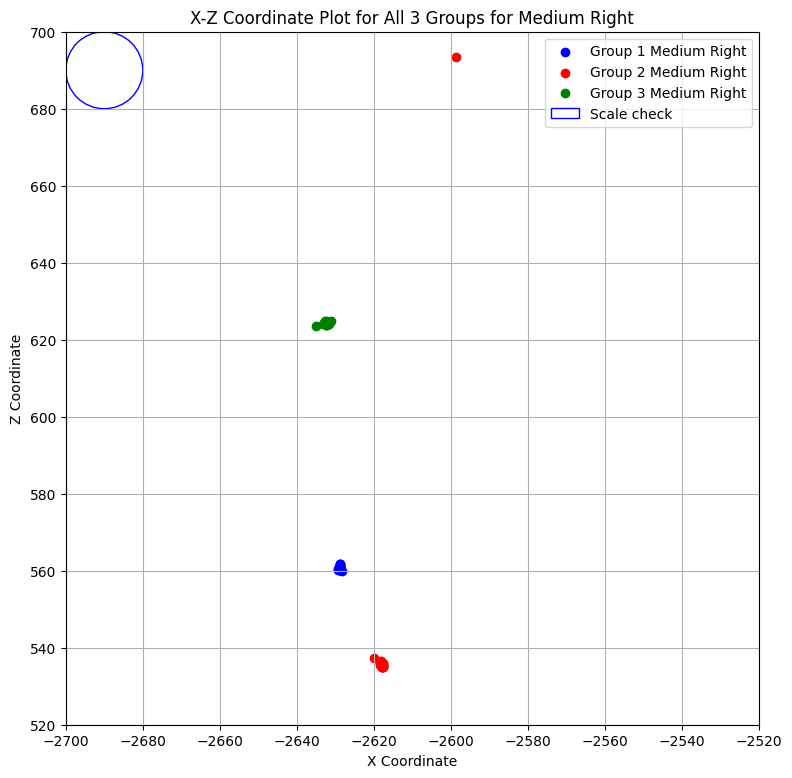

In [56]:
team_1_medium_right_x, team_1_medium_right_z = data_team_1['Medium-RightPosition-X'], data_team_1['Medium-RightPosition-Z']
team_2_medium_right_x, team_2_medium_right_z = data_team_2['Medium-RightPosition-X'], data_team_2['Medium-RightPosition-Z']
team_3_medium_right_x, team_3_medium_right_z = data_team_3['Medium-RightPosition-X'], data_team_3['Medium-RightPosition-Z']

plt.figure(figsize=(10, 10))
plt.xlim(-2700, -2520)
plt.ylim(520, 700)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.scatter(team_1_medium_right_x, team_1_medium_right_z, marker='o', linestyle='-', color='blue', label='Group 1 Medium Right')
plt.scatter(team_2_medium_right_x, team_2_medium_right_z, marker='o', linestyle='-', color='red', label='Group 2 Medium Right')
plt.scatter(team_3_medium_right_x, team_3_medium_right_z, marker='o', linestyle='-', color='green', label='Group 3 Medium Right')

plt.title('X-Z Coordinate Plot for All 3 Groups for Medium Right')
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')

plt.grid(True)

circle1 = plt.Circle((-2690, 690), 10, color='b', fill=False,  label = "Scale check")
plt.gca().add_patch(circle1)
# origin = plt.scatter(0, 0, color='k', s=100, marker='^', label='Origin')

fig = plt.gcf()
fig.set_size_inches(14, 9)
plt.legend()
plt.show()

### 5.8.6 Combined data for Medium Object in Straight direction

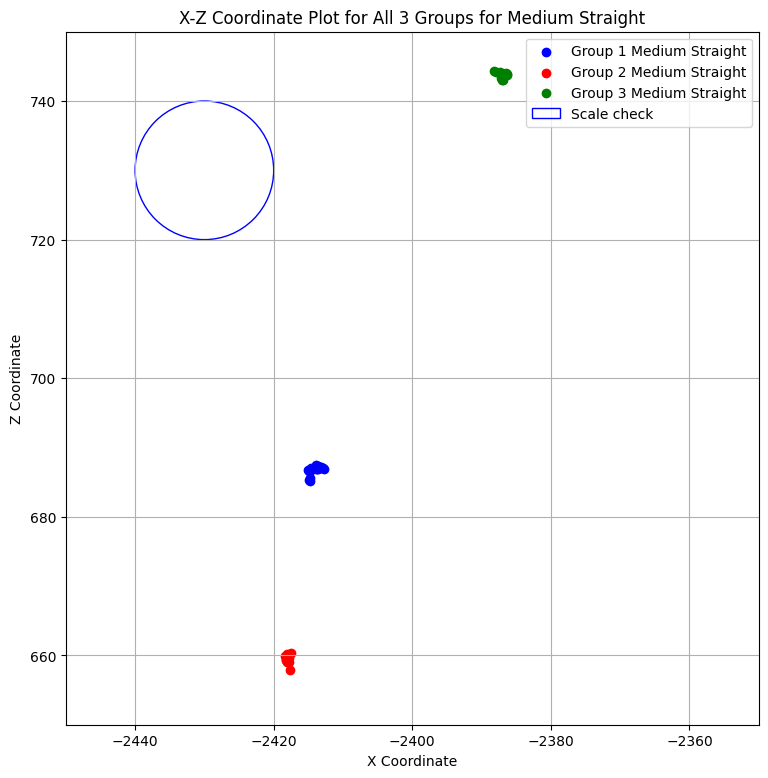

In [57]:
team_1_medium_straight_x, team_1_medium_straight_z = data_team_1['Medium-StraightPosition-X'], data_team_1['Medium-StraightPosition-Z']
team_2_medium_straight_x, team_2_medium_straight_z = data_team_2['Medium-StraightPosition-X'], data_team_2['Medium-StraightPosition-Z']
team_3_medium_straight_x, team_3_medium_straight_z = data_team_3['Medium-StraightPosition-X'], data_team_3['Medium-StraightPosition-Z']

plt.figure(figsize=(10, 10))
plt.xlim(-2450, -2350)
plt.ylim(650, 750)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.scatter(team_1_medium_straight_x, team_1_medium_straight_z, marker='o', linestyle='-', color='blue', label='Group 1 Medium Straight')
plt.scatter(team_2_medium_straight_x, team_2_medium_straight_z, marker='o', linestyle='-', color='red', label='Group 2 Medium Straight')
plt.scatter(team_3_medium_straight_x, team_3_medium_straight_z, marker='o', linestyle='-', color='green', label='Group 3 Medium Straight')

plt.title('X-Z Coordinate Plot for All 3 Groups for Medium Straight')
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')

plt.grid(True)

circle1 = plt.Circle((-2430, 730), 10, color='b', fill=False,  label = "Scale check")
plt.gca().add_patch(circle1)
# origin = plt.scatter(0, 0, color='k', s=100, marker='^', label='Origin')

fig = plt.gcf()
fig.set_size_inches(14, 9)
plt.legend()
plt.show()

### 5.8.7 Combined data for Small Object in Left direction

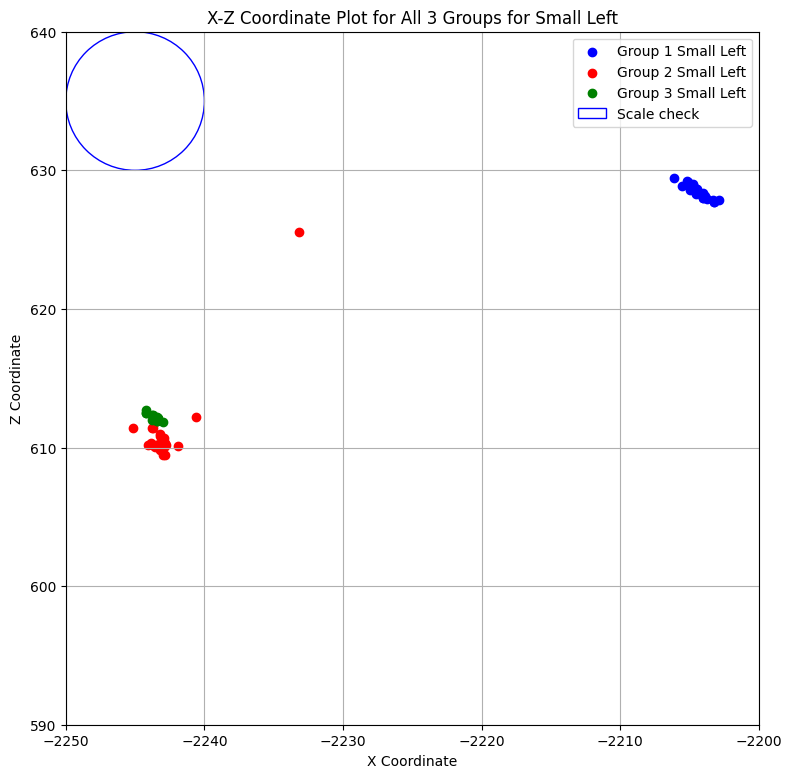

In [58]:
team_1_small_left_x, team_1_small_left_z = data_team_1['Small-LeftPosition-X'], data_team_1['Small-LeftPosition-Z']
team_2_small_left_x, team_2_small_left_z = data_team_2['Small-LeftPosition-X'], data_team_2['Small-LeftPosition-Z']
team_3_small_left_x, team_3_small_left_z = data_team_3['Small-LeftPosition-X'], data_team_3['Small-LeftPosition-Z']

plt.figure(figsize=(10, 10))
plt.xlim(-2250, -2200)
plt.ylim(590, 640)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.scatter(team_1_small_left_x, team_1_small_left_z, marker='o', linestyle='-', color='blue', label='Group 1 Small Left')
plt.scatter(team_2_small_left_x, team_2_small_left_z, marker='o', linestyle='-', color='red', label='Group 2 Small Left')
plt.scatter(team_3_small_left_x, team_3_small_left_z, marker='o', linestyle='-', color='green', label='Group 3 Small Left')

plt.title('X-Z Coordinate Plot for All 3 Groups for Small Left')
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')

plt.grid(True)

circle1 = plt.Circle((-2245, 635), 5, color='b', fill=False,  label = "Scale check")
plt.gca().add_patch(circle1)

# origin = plt.scatter(0, 0, color='k', s=100, marker='^', label='Origin')

fig = plt.gcf()
fig.set_size_inches(14, 9)
plt.legend()
plt.show()

### 5.8.8 Combined data for Small Object in Right direction

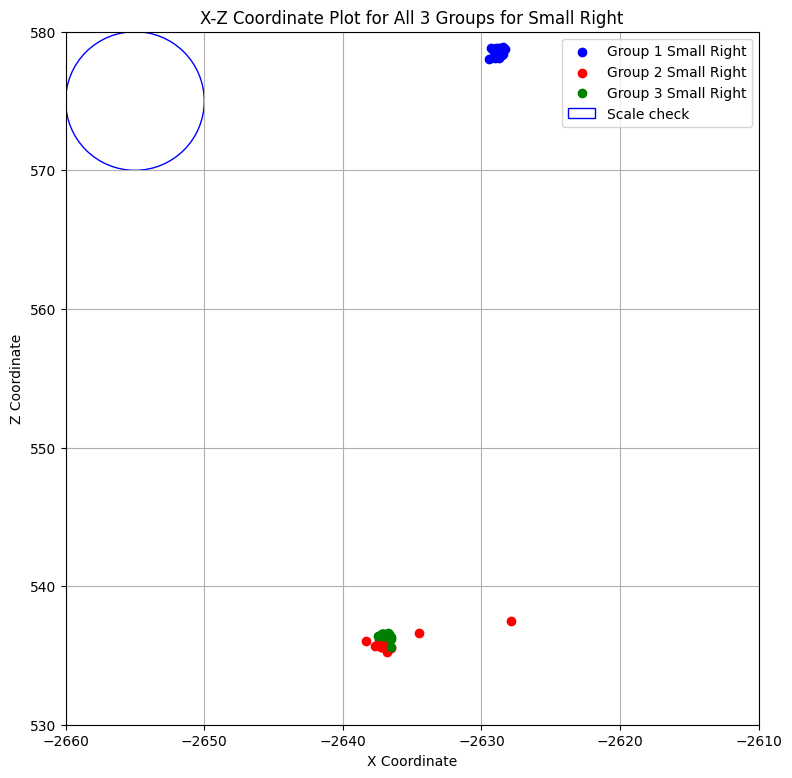

In [59]:
team_1_small_right_x, team_1_small_right_z = data_team_1['Small-RightPosition-X'], data_team_1['Small-RightPosition-Z']
team_2_small_right_x, team_2_small_right_z = data_team_2['Small-RightPosition-X'], data_team_2['Small-RightPosition-Z']
team_3_small_right_x, team_3_small_right_z = data_team_3['Small-RightPosition-X'], data_team_3['Small-RightPosition-Z']

plt.figure(figsize=(10, 10))
plt.xlim(-2660, -2610)
plt.ylim(530, 580)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.scatter(team_1_small_right_x, team_1_small_right_z, marker='o', linestyle='-', color='blue', label='Group 1 Small Right')
plt.scatter(team_2_small_right_x, team_2_small_right_z, marker='o', linestyle='-', color='red', label='Group 2 Small Right')
plt.scatter(team_3_small_right_x, team_3_small_right_z, marker='o', linestyle='-', color='green', label='Group 3 Small Right')

plt.title('X-Z Coordinate Plot for All 3 Groups for Small Right')
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')

plt.grid(True)

circle1 = plt.Circle((-2655, 575), 5, color='b', fill=False,  label = "Scale check")
plt.gca().add_patch(circle1)

# origin = plt.scatter(0, 0, color='k', s=100, marker='^', label='Origin')

fig = plt.gcf()
fig.set_size_inches(14, 9)
plt.legend()
plt.show()

### 5.8.9 Combined data for Small Object in Straight direction

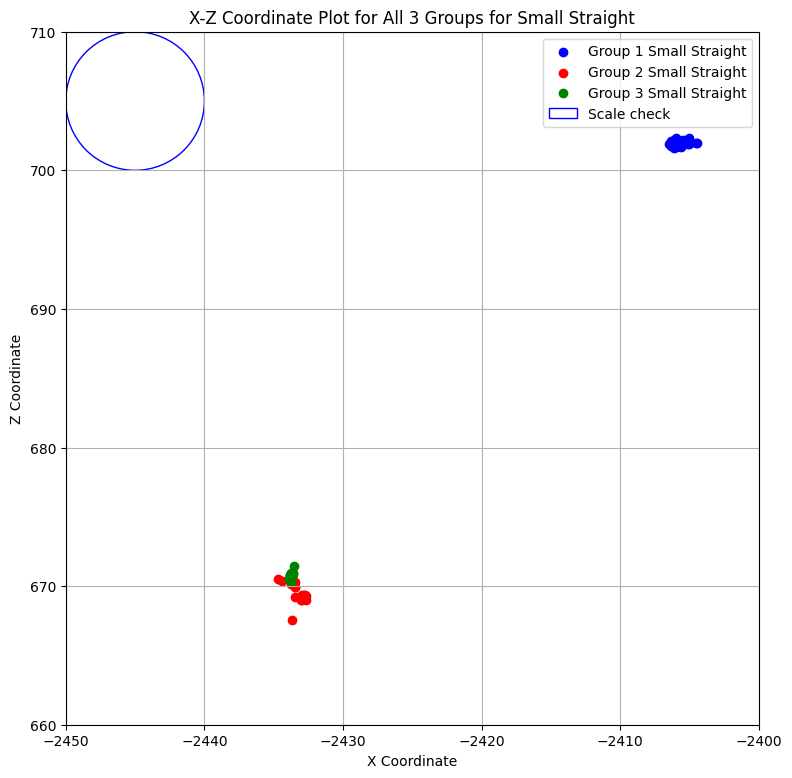

In [60]:
team_1_small_straight_x, team_1_small_straight_z = data_team_1['Small-StraightPosition-X'], data_team_1['Small-StraightPosition-Z']
team_2_small_straight_x, team_2_small_straight_z = data_team_2['Small-StraightPosition-X'], data_team_2['Small-StraightPosition-Z']
team_3_small_straight_x, team_3_small_straight_z = data_team_3['Small-StraightPosition-X'], data_team_3['Small-StraightPosition-Z']

plt.figure(figsize=(10, 10))
plt.xlim(-2450, -2400)
plt.ylim(660, 710)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.scatter(team_1_small_straight_x, team_1_small_straight_z, marker='o', linestyle='-', color='blue', label='Group 1 Small Straight')
plt.scatter(team_2_small_straight_x, team_2_small_straight_z, marker='o', linestyle='-', color='red', label='Group 2 Small Straight')
plt.scatter(team_3_small_straight_x, team_3_small_straight_z, marker='o', linestyle='-', color='green', label='Group 3 Small Straight')

plt.title('X-Z Coordinate Plot for All 3 Groups for Small Straight')
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')
plt.grid(True)

circle1 = plt.Circle((-2445, 705), 5, color='b', fill=False,  label = "Scale check")
plt.gca().add_patch(circle1)
# origin = plt.scatter(0, 0, color='k', s=100, marker='^', label='Origin')

fig = plt.gcf()
fig.set_size_inches(14, 9)
plt.legend()
plt.show()

# Experiment 6: YouBot Placing Experiment: Data Analysis

## 6.1 Statistical techniques for analyzing the experimental results

The statistical technique that we used in LEGO robot experiment was **Lilliefors**, so here we are using the same for analyzing the experimental results. 

In the **Lilliefors** test; the null hypothesis is that the data in each column being analyzed comes from a normal distribution. That being said: 
If the null hypothesis gets rejected, it could indicate non-normal behavior in the robot's placements.
If the null hypothesis suggests to accept, it suggests that the robot's placement positions might be consistent and could be modeled with a normal distribution.

In [61]:
# common Functions
def analyze_columns(file_path, column_names, alpha=0.05):
    """
    Analyzes the specified columns of a CSV file and generates a statistical summary.
    
    Parameters:
        file_path (str): Path to the CSV file.
        column_names (list of str): List of column names to analyze.
        alpha (float): Significance level for hypothesis testing (default: 0.05).
    
    Returns:
        pd.DataFrame: A summary table containing statistical metrics for each column.
    """
    data = pd.read_csv(file_path)
    data_subset = data[column_names].dropna()
    
    means = []
    variances = []
    test_statistics = []
    p_values = []
    hypotheses = []
    conclusions = []
    
    for column in column_names:
        mean = round(np.mean(data_subset[column]), 1)
        variance = round(np.var(data_subset[column], ddof=1), 1)

        # Perform the Lilliefors test
        stat, p_value = lilliefors(data_subset[column])
        stat = round(stat, 1)
        p_value = round(p_value, 2)

        # Determine the hypothesis decision
        hypothesis = 'Reject' if p_value < alpha else 'Suggest to Accept'
        conclusion = (
            "Reject null hypothesis: Data is not normally distributed."
            if p_value < alpha
            else "Fail to reject null hypothesis: Data is approximately normally distributed."
        )

        means.append(mean)
        variances.append(variance)
        test_statistics.append(stat)
        p_values.append(p_value)
        hypotheses.append(hypothesis)
        conclusions.append(conclusion)

    summary_table = pd.DataFrame({
        'Statistic': ['Mean', 'Variance', 'Test Statistic', 'p-value', 'Null Hypothesis', 'Conclusion'],
    })

    for i, column in enumerate(column_names):
        summary_table[column] = [means[i], variances[i], test_statistics[i], p_values[i], hypotheses[i], conclusions[i]]

    return summary_table

### Analysis for Large Object - Left

In [62]:
file_path = 'CSVs/inlier_data.csv'
columns_to_analyze = ['ll_inliers_x', 'll_inliers_y']

summary_table = analyze_columns(file_path, columns_to_analyze)

display(Markdown(summary_table.to_html(index=False)))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Statistic</th>
      <th>ll_inliers_x</th>
      <th>ll_inliers_y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Mean</td>
      <td>21.1</td>
      <td>7.2</td>
    </tr>
    <tr>
      <td>Variance</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>Test Statistic</td>
      <td>0.1</td>
      <td>0.1</td>
    </tr>
    <tr>
      <td>p-value</td>
      <td>0.31</td>
      <td>0.39</td>
    </tr>
    <tr>
      <td>Null Hypothesis</td>
      <td>Suggest to Accept</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Conclusion</td>
      <td>Fail to reject null hypothesis: Data is approximately normally distributed.</td>
      <td>Fail to reject null hypothesis: Data is approximately normally distributed.</td>
    </tr>
  </tbody>
</table>

### Analysis for Large Object - Right

In [63]:
file_path = 'CSVs/inlier_data.csv'
columns_to_analyze = ['lr_inliers_x', 'lr_inliers_y']

summary_table = analyze_columns(file_path, columns_to_analyze)

display(Markdown(summary_table.to_html(index=False)))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Statistic</th>
      <th>lr_inliers_x</th>
      <th>lr_inliers_y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Mean</td>
      <td>-20.2</td>
      <td>1.8</td>
    </tr>
    <tr>
      <td>Variance</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>Test Statistic</td>
      <td>0.2</td>
      <td>0.2</td>
    </tr>
    <tr>
      <td>p-value</td>
      <td>0.05</td>
      <td>0.1</td>
    </tr>
    <tr>
      <td>Null Hypothesis</td>
      <td>Suggest to Accept</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Conclusion</td>
      <td>Fail to reject null hypothesis: Data is approximately normally distributed.</td>
      <td>Fail to reject null hypothesis: Data is approximately normally distributed.</td>
    </tr>
  </tbody>
</table>

### Analysis for Large Object - Straight

In [64]:
file_path = 'CSVs/inlier_data.csv'
columns_to_analyze = ['ls_inliers_x', 'ls_inliers_y']

summary_table = analyze_columns(file_path, columns_to_analyze)

display(Markdown(summary_table.to_html(index=False)))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Statistic</th>
      <th>ls_inliers_x</th>
      <th>ls_inliers_y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Mean</td>
      <td>1.5</td>
      <td>14.2</td>
    </tr>
    <tr>
      <td>Variance</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>Test Statistic</td>
      <td>0.1</td>
      <td>0.2</td>
    </tr>
    <tr>
      <td>p-value</td>
      <td>0.48</td>
      <td>0.04</td>
    </tr>
    <tr>
      <td>Null Hypothesis</td>
      <td>Suggest to Accept</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Conclusion</td>
      <td>Fail to reject null hypothesis: Data is approximately normally distributed.</td>
      <td>Reject null hypothesis: Data is not normally distributed.</td>
    </tr>
  </tbody>
</table>

### Analysis for Medium Object - Left

In [65]:
file_path = 'CSVs/inlier_data.csv'
columns_to_analyze = ['ml_inliers_x', 'ml_inliers_y']

summary_table = analyze_columns(file_path, columns_to_analyze)

display(Markdown(summary_table.to_html(index=False)))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Statistic</th>
      <th>ml_inliers_x</th>
      <th>ml_inliers_y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Mean</td>
      <td>20.4</td>
      <td>6.7</td>
    </tr>
    <tr>
      <td>Variance</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>Test Statistic</td>
      <td>0.1</td>
      <td>0.2</td>
    </tr>
    <tr>
      <td>p-value</td>
      <td>0.32</td>
      <td>0.22</td>
    </tr>
    <tr>
      <td>Null Hypothesis</td>
      <td>Suggest to Accept</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Conclusion</td>
      <td>Fail to reject null hypothesis: Data is approximately normally distributed.</td>
      <td>Fail to reject null hypothesis: Data is approximately normally distributed.</td>
    </tr>
  </tbody>
</table>

### Analysis for Medium Object - Right

In [66]:
file_path = 'CSVs/inlier_data.csv'
columns_to_analyze = ['mr_inliers_x', 'mr_inliers_y']

summary_table = analyze_columns(file_path, columns_to_analyze)

display(Markdown(summary_table.to_html(index=False)))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Statistic</th>
      <th>mr_inliers_x</th>
      <th>mr_inliers_y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Mean</td>
      <td>-20.4</td>
      <td>0.9</td>
    </tr>
    <tr>
      <td>Variance</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>Test Statistic</td>
      <td>0.2</td>
      <td>0.1</td>
    </tr>
    <tr>
      <td>p-value</td>
      <td>0.01</td>
      <td>0.35</td>
    </tr>
    <tr>
      <td>Null Hypothesis</td>
      <td>Reject</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Conclusion</td>
      <td>Reject null hypothesis: Data is not normally distributed.</td>
      <td>Fail to reject null hypothesis: Data is approximately normally distributed.</td>
    </tr>
  </tbody>
</table>

### Analysis for Medium Object - Straight

In [67]:
file_path = 'CSVs/inlier_data.csv'
columns_to_analyze = ['ms_inliers_x', 'ms_inliers_y']

summary_table = analyze_columns(file_path, columns_to_analyze)

display(Markdown(summary_table.to_html(index=False)))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Statistic</th>
      <th>ms_inliers_x</th>
      <th>ms_inliers_y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Mean</td>
      <td>1.1</td>
      <td>13.5</td>
    </tr>
    <tr>
      <td>Variance</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>Test Statistic</td>
      <td>0.2</td>
      <td>0.2</td>
    </tr>
    <tr>
      <td>p-value</td>
      <td>0.04</td>
      <td>0.07</td>
    </tr>
    <tr>
      <td>Null Hypothesis</td>
      <td>Reject</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Conclusion</td>
      <td>Reject null hypothesis: Data is not normally distributed.</td>
      <td>Fail to reject null hypothesis: Data is approximately normally distributed.</td>
    </tr>
  </tbody>
</table>

### Analysis for Small Object - Left

In [68]:
file_path = 'CSVs/inlier_data.csv'
columns_to_analyze = ['sl_inliers_x', 'sl_inliers_y']

summary_table = analyze_columns(file_path, columns_to_analyze)

display(Markdown(summary_table.to_html(index=False)))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Statistic</th>
      <th>sl_inliers_x</th>
      <th>sl_inliers_y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Mean</td>
      <td>22.1</td>
      <td>7.7</td>
    </tr>
    <tr>
      <td>Variance</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>Test Statistic</td>
      <td>0.1</td>
      <td>0.1</td>
    </tr>
    <tr>
      <td>p-value</td>
      <td>0.46</td>
      <td>0.51</td>
    </tr>
    <tr>
      <td>Null Hypothesis</td>
      <td>Suggest to Accept</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Conclusion</td>
      <td>Fail to reject null hypothesis: Data is approximately normally distributed.</td>
      <td>Fail to reject null hypothesis: Data is approximately normally distributed.</td>
    </tr>
  </tbody>
</table>

### Analysis for Small Object - Right

In [69]:
file_path = 'CSVs/inlier_data.csv'
columns_to_analyze = ['sr_inliers_x', 'sr_inliers_y']

summary_table = analyze_columns(file_path, columns_to_analyze)

display(Markdown(summary_table.to_html(index=False)))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Statistic</th>
      <th>sr_inliers_x</th>
      <th>sr_inliers_y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Mean</td>
      <td>-20.4</td>
      <td>2.7</td>
    </tr>
    <tr>
      <td>Variance</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>Test Statistic</td>
      <td>0.2</td>
      <td>0.2</td>
    </tr>
    <tr>
      <td>p-value</td>
      <td>0.09</td>
      <td>0.04</td>
    </tr>
    <tr>
      <td>Null Hypothesis</td>
      <td>Suggest to Accept</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Conclusion</td>
      <td>Fail to reject null hypothesis: Data is approximately normally distributed.</td>
      <td>Reject null hypothesis: Data is not normally distributed.</td>
    </tr>
  </tbody>
</table>

### Analysis for Small Object - Straight

In [70]:
file_path = 'CSVs/inlier_data.csv'
columns_to_analyze = ['ss_inliers_x', 'ss_inliers_y']

summary_table = analyze_columns(file_path, columns_to_analyze)

display(Markdown(summary_table.to_html(index=False)))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Statistic</th>
      <th>ss_inliers_x</th>
      <th>ss_inliers_y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Mean</td>
      <td>1.9</td>
      <td>15.0</td>
    </tr>
    <tr>
      <td>Variance</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>Test Statistic</td>
      <td>0.2</td>
      <td>0.1</td>
    </tr>
    <tr>
      <td>p-value</td>
      <td>0.07</td>
      <td>0.56</td>
    </tr>
    <tr>
      <td>Null Hypothesis</td>
      <td>Suggest to Accept</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Conclusion</td>
      <td>Fail to reject null hypothesis: Data is approximately normally distributed.</td>
      <td>Fail to reject null hypothesis: Data is approximately normally distributed.</td>
    </tr>
  </tbody>
</table>

## 6.2 Statistical significance tests after performing PCA

As mentioned in the SEE manual to use either ”Bartlett” or ”Levene”. We used **Levene** as it is more Robust and it is useful in the case where there is deviations from normality. 

The null hypothesis for the Levene test is that the variances of the two groups (group1 and group2) are equal; where group 1 is compared with < median PCA and group 2 is compared with >= median PCA.

This means:
If the null hypothesis is not rejected, the robot's variability is consistent, and the results can be treated as stable.
If the null hypothesis is rejected, it suggests a need to investigate the robot's operations for potential discrepancies or issues in certain conditions (e.g., based on size or direction).

In [71]:
def pca_levene_test(data, column_x, column_y, alpha=0.05):
    """
    Perform a PCA-based Levene test on two columns of a dataset.

    Parameters:
        data (pd.DataFrame): Input dataset.
        column_x (str): Column name for the X data.
        column_y (str): Column name for the Y data.
        alpha (float): Significance level for the test.

    Returns:
        dict: A dictionary with test statistics, p-values, and conclusions for X and Y.
    """
    data_subset = data[[column_x, column_y]].dropna()

    # Perform PCA
    pca = PCA(n_components=1)
    pc1 = pca.fit_transform(data_subset) 

    data_subset['PC1'] = pc1

    median_pc1 = np.median(pc1)
    group1 = data_subset[data_subset['PC1'] < median_pc1]
    group2 = data_subset[data_subset['PC1'] >= median_pc1]

    stat_x, p_x = levene(group1[column_x], group2[column_x])
    stat_y, p_y = levene(group1[column_y], group2[column_y])

    results = {
        'X': {
            'Test Statistic': round(stat_x, 1),
            'p-value': round(p_x, 2),
            'Conclusion': 'Reject null hypothesis (variances are not equal)'
                          if p_x < alpha else 'Fail to reject null hypothesis (variances are equal)'
        },
        'Y': {
            'Test Statistic': round(stat_y, 1),
            'p-value': round(p_y, 2),
            'Conclusion': 'Reject null hypothesis (variances are not equal)'
                          if p_y < alpha else 'Fail to reject null hypothesis (variances are equal)'
        }
    }

    return results

def pca_levene_test_and_append_markdown(data, column_x, column_y, size, direction, rand_var1, rand_var2, accuracy=None, alpha=0.05, results_table=None):
    """
    Perform PCA-based Levene test, append results, and display as Markdown-styled table.

    Parameters:
        data (pd.DataFrame): Input dataset.
        column_x (str): Column name for the X data.
        column_y (str): Column name for the Y data.
        size (str): Description of size (e.g., 'Large', 'Small').
        direction (str): Direction of data (e.g., 'Left', 'Right').
        rand_var (str): Random variable description.
        accuracy (float, optional): Accuracy value if available.
        alpha (float): Significance level for the test.
        results_table (pd.DataFrame, optional): Existing results table to append to.

    Returns:
        pd.DataFrame: Updated results table.
    """
    data_subset = data[[column_x, column_y]].dropna()
    pca = PCA(n_components=1)
    pc1 = pca.fit_transform(data_subset)
    data_subset['PC1'] = pc1
    median_pc1 = np.median(pc1)
    group1 = data_subset[data_subset['PC1'] < median_pc1]
    group2 = data_subset[data_subset['PC1'] >= median_pc1]

    stat_x, p_x = levene(group1[column_x], group2[column_x])
    stat_y, p_y = levene(group1[column_y], group2[column_y])

    mean_x = round(np.mean(data_subset[column_x]), 1)
    mean_y = round(np.mean(data_subset[column_y]), 1)
    variance_x = round(np.var(data_subset[column_x], ddof=1), 1)
    variance_y = round(np.var(data_subset[column_y], ddof=1), 1)

    hypothesis_x = 'Reject' if p_x < alpha else 'Suggest to Accept'
    hypothesis_y = 'Reject' if p_y < alpha else 'Suggest to Accept'

    results = pd.DataFrame({
        "Size": [size, size],
        "Direction": [direction, direction],
        "Rand. Var.": [rand_var1, rand_var2],
        "Mean": [mean_x, mean_y],
        "Variance": [variance_x, variance_y],
        "Test stat": [round(stat_x, 1), round(stat_y, 1)],
        "P Value": [round(p_x, 1), round(p_y, 1)],
        "Null Hypothesis": [hypothesis_x, hypothesis_y]
    }, index=['X', 'Y'])
    
    if results_table is None:
        results_table = pd.DataFrame(columns=results.columns)
    results_table = pd.concat([results_table, results])
    
    display(Markdown(results_table.head(30).to_html(index=False)))  

    return results_table

global_results_table = pd.DataFrame(columns=["Size", "Direction", "Rand. Var.", "Mean", "Variance", "Test stat", "P Value", "Null Hypothesis"])

### Statistical Analysis for Large  Object - Left

In [72]:
file_path = 'CSVs/inlier_data.csv' 
data = pd.read_csv(file_path)

results = pca_levene_test(data, column_x='ll_inliers_x', column_y='ll_inliers_y', alpha=0.05)

print("Levene Test on X:")
print(f"  Test Statistic: {results['X']['Test Statistic']}")
print(f"  p-value: {results['X']['p-value']}")
print(f"  Conclusion: {results['X']['Conclusion']}")

print("\nLevene Test on Y:")
print(f"  Test Statistic: {results['Y']['Test Statistic']}")
print(f"  p-value: {results['Y']['p-value']}")
print(f"  Conclusion: {results['Y']['Conclusion']}")

Levene Test on X:
  Test Statistic: 0.6
  p-value: 0.46
  Conclusion: Fail to reject null hypothesis (variances are equal)

Levene Test on Y:
  Test Statistic: 0.9
  p-value: 0.36
  Conclusion: Fail to reject null hypothesis (variances are equal)


In [73]:
global_results_table = pca_levene_test_and_append_markdown(
    data=data,
    column_x='ll_inliers_x',
    column_y='ll_inliers_y',
    size='Large',
    direction='Left',
    rand_var1='X',
    rand_var2='Y',
    accuracy=0.95,
    results_table=global_results_table
)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Size</th>
      <th>Direction</th>
      <th>Rand. Var.</th>
      <th>Mean</th>
      <th>Variance</th>
      <th>Test stat</th>
      <th>P Value</th>
      <th>Null Hypothesis</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Large</td>
      <td>Left</td>
      <td>X</td>
      <td>21.1</td>
      <td>0.0</td>
      <td>0.6</td>
      <td>0.5</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Left</td>
      <td>Y</td>
      <td>7.2</td>
      <td>0.0</td>
      <td>0.9</td>
      <td>0.4</td>
      <td>Suggest to Accept</td>
    </tr>
  </tbody>
</table>

### Statistical Analysis for Large Object - Right

In [74]:
results = pca_levene_test(data, column_x='lr_inliers_x', column_y='lr_inliers_y', alpha=0.05)

print("Levene Test on X:")
print(f"  Test Statistic: {results['X']['Test Statistic']}")
print(f"  p-value: {results['X']['p-value']}")
print(f"  Conclusion: {results['X']['Conclusion']}")

print("\nLevene Test on Y:")
print(f"  Test Statistic: {results['Y']['Test Statistic']}")
print(f"  p-value: {results['Y']['p-value']}")
print(f"  Conclusion: {results['Y']['Conclusion']}")

Levene Test on X:
  Test Statistic: 0.7
  p-value: 0.43
  Conclusion: Fail to reject null hypothesis (variances are equal)

Levene Test on Y:
  Test Statistic: 2.2
  p-value: 0.16
  Conclusion: Fail to reject null hypothesis (variances are equal)


In [75]:
global_results_table = pca_levene_test_and_append_markdown(
    data=data,
    column_x='lr_inliers_x',
    column_y='lr_inliers_y',
    size='Large',
    direction='Right',
    rand_var1='X',
    rand_var2='Y',
    accuracy=0.95,
    results_table=global_results_table
)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Size</th>
      <th>Direction</th>
      <th>Rand. Var.</th>
      <th>Mean</th>
      <th>Variance</th>
      <th>Test stat</th>
      <th>P Value</th>
      <th>Null Hypothesis</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Large</td>
      <td>Left</td>
      <td>X</td>
      <td>21.1</td>
      <td>0.0</td>
      <td>0.6</td>
      <td>0.5</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Left</td>
      <td>Y</td>
      <td>7.2</td>
      <td>0.0</td>
      <td>0.9</td>
      <td>0.4</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Right</td>
      <td>X</td>
      <td>-20.2</td>
      <td>0.0</td>
      <td>0.7</td>
      <td>0.4</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Right</td>
      <td>Y</td>
      <td>1.8</td>
      <td>0.0</td>
      <td>2.2</td>
      <td>0.2</td>
      <td>Suggest to Accept</td>
    </tr>
  </tbody>
</table>

### Statistical Analysis for Large Object - Straight

In [76]:
results = pca_levene_test(data, column_x='ls_inliers_x', column_y='ls_inliers_y', alpha=0.05)

print("Levene Test on X:")
print(f"  Test Statistic: {results['X']['Test Statistic']}")
print(f"  p-value: {results['X']['p-value']}")
print(f"  Conclusion: {results['X']['Conclusion']}")

print("\nLevene Test on Y:")
print(f"  Test Statistic: {results['Y']['Test Statistic']}")
print(f"  p-value: {results['Y']['p-value']}")
print(f"  Conclusion: {results['Y']['Conclusion']}")

Levene Test on X:
  Test Statistic: 0.0
  p-value: 0.99
  Conclusion: Fail to reject null hypothesis (variances are equal)

Levene Test on Y:
  Test Statistic: 12.1
  p-value: 0.0
  Conclusion: Reject null hypothesis (variances are not equal)


In [77]:
global_results_table = pca_levene_test_and_append_markdown(
    data=data,
    column_x='ls_inliers_x',
    column_y='ls_inliers_y',
    size='Large',
    direction='Straight',
    rand_var1='X',
    rand_var2='Y',
    accuracy=0.95,
    results_table=global_results_table
)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Size</th>
      <th>Direction</th>
      <th>Rand. Var.</th>
      <th>Mean</th>
      <th>Variance</th>
      <th>Test stat</th>
      <th>P Value</th>
      <th>Null Hypothesis</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Large</td>
      <td>Left</td>
      <td>X</td>
      <td>21.1</td>
      <td>0.0</td>
      <td>0.6</td>
      <td>0.5</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Left</td>
      <td>Y</td>
      <td>7.2</td>
      <td>0.0</td>
      <td>0.9</td>
      <td>0.4</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Right</td>
      <td>X</td>
      <td>-20.2</td>
      <td>0.0</td>
      <td>0.7</td>
      <td>0.4</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Right</td>
      <td>Y</td>
      <td>1.8</td>
      <td>0.0</td>
      <td>2.2</td>
      <td>0.2</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Straight</td>
      <td>X</td>
      <td>1.5</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Straight</td>
      <td>Y</td>
      <td>14.2</td>
      <td>0.0</td>
      <td>12.1</td>
      <td>0.0</td>
      <td>Reject</td>
    </tr>
  </tbody>
</table>

### Statistical Analysis for Medium Object - Left

In [78]:
results = pca_levene_test(data, column_x='ml_inliers_x', column_y='ml_inliers_y', alpha=0.05)

print("Levene Test on X:")
print(f"  Test Statistic: {results['X']['Test Statistic']}")
print(f"  p-value: {results['X']['p-value']}")
print(f"  Conclusion: {results['X']['Conclusion']}")

print("\nLevene Test on Y:")
print(f"  Test Statistic: {results['Y']['Test Statistic']}")
print(f"  p-value: {results['Y']['p-value']}")
print(f"  Conclusion: {results['Y']['Conclusion']}")

Levene Test on X:
  Test Statistic: 4.6
  p-value: 0.04
  Conclusion: Reject null hypothesis (variances are not equal)

Levene Test on Y:
  Test Statistic: 0.2
  p-value: 0.69
  Conclusion: Fail to reject null hypothesis (variances are equal)


In [79]:
global_results_table = pca_levene_test_and_append_markdown(
    data=data,
    column_x='ml_inliers_x',
    column_y='ml_inliers_y',
    size='Medium',
    direction='Left',
    rand_var1='X',
    rand_var2='Y',
    accuracy=0.95,
    results_table=global_results_table
)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Size</th>
      <th>Direction</th>
      <th>Rand. Var.</th>
      <th>Mean</th>
      <th>Variance</th>
      <th>Test stat</th>
      <th>P Value</th>
      <th>Null Hypothesis</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Large</td>
      <td>Left</td>
      <td>X</td>
      <td>21.1</td>
      <td>0.0</td>
      <td>0.6</td>
      <td>0.5</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Left</td>
      <td>Y</td>
      <td>7.2</td>
      <td>0.0</td>
      <td>0.9</td>
      <td>0.4</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Right</td>
      <td>X</td>
      <td>-20.2</td>
      <td>0.0</td>
      <td>0.7</td>
      <td>0.4</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Right</td>
      <td>Y</td>
      <td>1.8</td>
      <td>0.0</td>
      <td>2.2</td>
      <td>0.2</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Straight</td>
      <td>X</td>
      <td>1.5</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Straight</td>
      <td>Y</td>
      <td>14.2</td>
      <td>0.0</td>
      <td>12.1</td>
      <td>0.0</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Left</td>
      <td>X</td>
      <td>20.4</td>
      <td>0.0</td>
      <td>4.6</td>
      <td>0.0</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Left</td>
      <td>Y</td>
      <td>6.7</td>
      <td>0.0</td>
      <td>0.2</td>
      <td>0.7</td>
      <td>Suggest to Accept</td>
    </tr>
  </tbody>
</table>

### Statistical Analysis for Medium Object - Right

In [80]:
results = pca_levene_test(data, column_x='mr_inliers_x', column_y='mr_inliers_y', alpha=0.05)

print("Levene Test on X:")
print(f"  Test Statistic: {results['X']['Test Statistic']}")
print(f"  p-value: {results['X']['p-value']}")
print(f"  Conclusion: {results['X']['Conclusion']}")

print("\nLevene Test on Y:")
print(f"  Test Statistic: {results['Y']['Test Statistic']}")
print(f"  p-value: {results['Y']['p-value']}")
print(f"  Conclusion: {results['Y']['Conclusion']}")

Levene Test on X:
  Test Statistic: 7.1
  p-value: 0.01
  Conclusion: Reject null hypothesis (variances are not equal)

Levene Test on Y:
  Test Statistic: 0.0
  p-value: 1.0
  Conclusion: Fail to reject null hypothesis (variances are equal)


In [81]:
global_results_table = pca_levene_test_and_append_markdown(
    data=data,
    column_x='mr_inliers_x',
    column_y='mr_inliers_y',
    size='Medium',
    direction='Right',
    rand_var1='X',
    rand_var2='Y',
    accuracy=0.95,
    results_table=global_results_table
)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Size</th>
      <th>Direction</th>
      <th>Rand. Var.</th>
      <th>Mean</th>
      <th>Variance</th>
      <th>Test stat</th>
      <th>P Value</th>
      <th>Null Hypothesis</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Large</td>
      <td>Left</td>
      <td>X</td>
      <td>21.1</td>
      <td>0.0</td>
      <td>0.6</td>
      <td>0.5</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Left</td>
      <td>Y</td>
      <td>7.2</td>
      <td>0.0</td>
      <td>0.9</td>
      <td>0.4</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Right</td>
      <td>X</td>
      <td>-20.2</td>
      <td>0.0</td>
      <td>0.7</td>
      <td>0.4</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Right</td>
      <td>Y</td>
      <td>1.8</td>
      <td>0.0</td>
      <td>2.2</td>
      <td>0.2</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Straight</td>
      <td>X</td>
      <td>1.5</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Straight</td>
      <td>Y</td>
      <td>14.2</td>
      <td>0.0</td>
      <td>12.1</td>
      <td>0.0</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Left</td>
      <td>X</td>
      <td>20.4</td>
      <td>0.0</td>
      <td>4.6</td>
      <td>0.0</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Left</td>
      <td>Y</td>
      <td>6.7</td>
      <td>0.0</td>
      <td>0.2</td>
      <td>0.7</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Right</td>
      <td>X</td>
      <td>-20.4</td>
      <td>0.0</td>
      <td>7.1</td>
      <td>0.0</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Right</td>
      <td>Y</td>
      <td>0.9</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>Suggest to Accept</td>
    </tr>
  </tbody>
</table>

### Statistical Analysis for Medium Object - Straight

In [82]:
results = pca_levene_test(data, column_x='ms_inliers_x', column_y='ms_inliers_y', alpha=0.05)

print("Levene Test on X:")
print(f"  Test Statistic: {results['X']['Test Statistic']}")
print(f"  p-value: {results['X']['p-value']}")
print(f"  Conclusion: {results['X']['Conclusion']}")

print("\nLevene Test on Y:")
print(f"  Test Statistic: {results['Y']['Test Statistic']}")
print(f"  p-value: {results['Y']['p-value']}")
print(f"  Conclusion: {results['Y']['Conclusion']}")

Levene Test on X:
  Test Statistic: 1.0
  p-value: 0.32
  Conclusion: Fail to reject null hypothesis (variances are equal)

Levene Test on Y:
  Test Statistic: 1.2
  p-value: 0.29
  Conclusion: Fail to reject null hypothesis (variances are equal)


In [83]:
global_results_table = pca_levene_test_and_append_markdown(
    data=data,
    column_x='ms_inliers_x',
    column_y='ms_inliers_y',
    size='Medium',
    direction='Straight',
    rand_var1='X',
    rand_var2='Y',
    accuracy=0.95,
    results_table=global_results_table
)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Size</th>
      <th>Direction</th>
      <th>Rand. Var.</th>
      <th>Mean</th>
      <th>Variance</th>
      <th>Test stat</th>
      <th>P Value</th>
      <th>Null Hypothesis</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Large</td>
      <td>Left</td>
      <td>X</td>
      <td>21.1</td>
      <td>0.0</td>
      <td>0.6</td>
      <td>0.5</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Left</td>
      <td>Y</td>
      <td>7.2</td>
      <td>0.0</td>
      <td>0.9</td>
      <td>0.4</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Right</td>
      <td>X</td>
      <td>-20.2</td>
      <td>0.0</td>
      <td>0.7</td>
      <td>0.4</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Right</td>
      <td>Y</td>
      <td>1.8</td>
      <td>0.0</td>
      <td>2.2</td>
      <td>0.2</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Straight</td>
      <td>X</td>
      <td>1.5</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Straight</td>
      <td>Y</td>
      <td>14.2</td>
      <td>0.0</td>
      <td>12.1</td>
      <td>0.0</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Left</td>
      <td>X</td>
      <td>20.4</td>
      <td>0.0</td>
      <td>4.6</td>
      <td>0.0</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Left</td>
      <td>Y</td>
      <td>6.7</td>
      <td>0.0</td>
      <td>0.2</td>
      <td>0.7</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Right</td>
      <td>X</td>
      <td>-20.4</td>
      <td>0.0</td>
      <td>7.1</td>
      <td>0.0</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Right</td>
      <td>Y</td>
      <td>0.9</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Straight</td>
      <td>X</td>
      <td>1.1</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.3</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Straight</td>
      <td>Y</td>
      <td>13.5</td>
      <td>0.0</td>
      <td>1.2</td>
      <td>0.3</td>
      <td>Suggest to Accept</td>
    </tr>
  </tbody>
</table>

### Statistical Analysis for Small Object - Left

In [84]:
results = pca_levene_test(data, column_x='sl_inliers_x', column_y='sl_inliers_y', alpha=0.05)

print("Levene Test on X:")
print(f"  Test Statistic: {results['X']['Test Statistic']}")
print(f"  p-value: {results['X']['p-value']}")
print(f"  Conclusion: {results['X']['Conclusion']}")

print("\nLevene Test on Y:")
print(f"  Test Statistic: {results['Y']['Test Statistic']}")
print(f"  p-value: {results['Y']['p-value']}")
print(f"  Conclusion: {results['Y']['Conclusion']}")

Levene Test on X:
  Test Statistic: 0.0
  p-value: 0.94
  Conclusion: Fail to reject null hypothesis (variances are equal)

Levene Test on Y:
  Test Statistic: 0.2
  p-value: 0.63
  Conclusion: Fail to reject null hypothesis (variances are equal)


In [85]:
global_results_table = pca_levene_test_and_append_markdown(
    data=data,
    column_x='sl_inliers_x',
    column_y='sl_inliers_y',
    size='Small',
    direction='Left',
    rand_var1='X',
    rand_var2='Y',
    accuracy=0.95,
    results_table=global_results_table
)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Size</th>
      <th>Direction</th>
      <th>Rand. Var.</th>
      <th>Mean</th>
      <th>Variance</th>
      <th>Test stat</th>
      <th>P Value</th>
      <th>Null Hypothesis</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Large</td>
      <td>Left</td>
      <td>X</td>
      <td>21.1</td>
      <td>0.0</td>
      <td>0.6</td>
      <td>0.5</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Left</td>
      <td>Y</td>
      <td>7.2</td>
      <td>0.0</td>
      <td>0.9</td>
      <td>0.4</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Right</td>
      <td>X</td>
      <td>-20.2</td>
      <td>0.0</td>
      <td>0.7</td>
      <td>0.4</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Right</td>
      <td>Y</td>
      <td>1.8</td>
      <td>0.0</td>
      <td>2.2</td>
      <td>0.2</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Straight</td>
      <td>X</td>
      <td>1.5</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Straight</td>
      <td>Y</td>
      <td>14.2</td>
      <td>0.0</td>
      <td>12.1</td>
      <td>0.0</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Left</td>
      <td>X</td>
      <td>20.4</td>
      <td>0.0</td>
      <td>4.6</td>
      <td>0.0</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Left</td>
      <td>Y</td>
      <td>6.7</td>
      <td>0.0</td>
      <td>0.2</td>
      <td>0.7</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Right</td>
      <td>X</td>
      <td>-20.4</td>
      <td>0.0</td>
      <td>7.1</td>
      <td>0.0</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Right</td>
      <td>Y</td>
      <td>0.9</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Straight</td>
      <td>X</td>
      <td>1.1</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.3</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Straight</td>
      <td>Y</td>
      <td>13.5</td>
      <td>0.0</td>
      <td>1.2</td>
      <td>0.3</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Small</td>
      <td>Left</td>
      <td>X</td>
      <td>22.1</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.9</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Small</td>
      <td>Left</td>
      <td>Y</td>
      <td>7.7</td>
      <td>0.0</td>
      <td>0.2</td>
      <td>0.6</td>
      <td>Suggest to Accept</td>
    </tr>
  </tbody>
</table>

### Statistical Analysis for Small Object - Right

In [86]:
results = pca_levene_test(data, column_x='sr_inliers_x', column_y='sr_inliers_y', alpha=0.05)

print("Levene Test on X:")
print(f"  Test Statistic: {results['X']['Test Statistic']}")
print(f"  p-value: {results['X']['p-value']}")
print(f"  Conclusion: {results['X']['Conclusion']}")

print("\nLevene Test on Y:")
print(f"  Test Statistic: {results['Y']['Test Statistic']}")
print(f"  p-value: {results['Y']['p-value']}")
print(f"  Conclusion: {results['Y']['Conclusion']}")

Levene Test on X:
  Test Statistic: 0.0
  p-value: 0.96
  Conclusion: Fail to reject null hypothesis (variances are equal)

Levene Test on Y:
  Test Statistic: 0.2
  p-value: 0.64
  Conclusion: Fail to reject null hypothesis (variances are equal)


In [87]:
global_results_table = pca_levene_test_and_append_markdown(
    data=data,
    column_x='sr_inliers_x',
    column_y='sr_inliers_y',
    size='Small',
    direction='Right',
    rand_var1='X',
    rand_var2='Y',
    accuracy=0.95,
    results_table=global_results_table
)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Size</th>
      <th>Direction</th>
      <th>Rand. Var.</th>
      <th>Mean</th>
      <th>Variance</th>
      <th>Test stat</th>
      <th>P Value</th>
      <th>Null Hypothesis</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Large</td>
      <td>Left</td>
      <td>X</td>
      <td>21.1</td>
      <td>0.0</td>
      <td>0.6</td>
      <td>0.5</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Left</td>
      <td>Y</td>
      <td>7.2</td>
      <td>0.0</td>
      <td>0.9</td>
      <td>0.4</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Right</td>
      <td>X</td>
      <td>-20.2</td>
      <td>0.0</td>
      <td>0.7</td>
      <td>0.4</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Right</td>
      <td>Y</td>
      <td>1.8</td>
      <td>0.0</td>
      <td>2.2</td>
      <td>0.2</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Straight</td>
      <td>X</td>
      <td>1.5</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Straight</td>
      <td>Y</td>
      <td>14.2</td>
      <td>0.0</td>
      <td>12.1</td>
      <td>0.0</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Left</td>
      <td>X</td>
      <td>20.4</td>
      <td>0.0</td>
      <td>4.6</td>
      <td>0.0</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Left</td>
      <td>Y</td>
      <td>6.7</td>
      <td>0.0</td>
      <td>0.2</td>
      <td>0.7</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Right</td>
      <td>X</td>
      <td>-20.4</td>
      <td>0.0</td>
      <td>7.1</td>
      <td>0.0</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Right</td>
      <td>Y</td>
      <td>0.9</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Straight</td>
      <td>X</td>
      <td>1.1</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.3</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Straight</td>
      <td>Y</td>
      <td>13.5</td>
      <td>0.0</td>
      <td>1.2</td>
      <td>0.3</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Small</td>
      <td>Left</td>
      <td>X</td>
      <td>22.1</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.9</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Small</td>
      <td>Left</td>
      <td>Y</td>
      <td>7.7</td>
      <td>0.0</td>
      <td>0.2</td>
      <td>0.6</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Small</td>
      <td>Right</td>
      <td>X</td>
      <td>-20.4</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Small</td>
      <td>Right</td>
      <td>Y</td>
      <td>2.7</td>
      <td>0.0</td>
      <td>0.2</td>
      <td>0.6</td>
      <td>Suggest to Accept</td>
    </tr>
  </tbody>
</table>

### Statistical Analysis for Small Object - Straight

In [88]:
results = pca_levene_test(data, column_x='ss_inliers_x', column_y='ss_inliers_y', alpha=0.05)

print("Levene Test on X:")
print(f"  Test Statistic: {results['X']['Test Statistic']}")
print(f"  p-value: {results['X']['p-value']}")
print(f"  Conclusion: {results['X']['Conclusion']}")

print("\nLevene Test on Y:")
print(f"  Test Statistic: {results['Y']['Test Statistic']}")
print(f"  p-value: {results['Y']['p-value']}")
print(f"  Conclusion: {results['Y']['Conclusion']}")

Levene Test on X:
  Test Statistic: 1.2
  p-value: 0.29
  Conclusion: Fail to reject null hypothesis (variances are equal)

Levene Test on Y:
  Test Statistic: 3.8
  p-value: 0.07
  Conclusion: Fail to reject null hypothesis (variances are equal)


### Results Combined

In [89]:
global_results_table = pca_levene_test_and_append_markdown(
    data=data,
    column_x='ss_inliers_x',
    column_y='ss_inliers_y',
    size='Small',
    direction='Straight',
    rand_var1='X',
    rand_var2='Y',
    results_table=global_results_table
)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Size</th>
      <th>Direction</th>
      <th>Rand. Var.</th>
      <th>Mean</th>
      <th>Variance</th>
      <th>Test stat</th>
      <th>P Value</th>
      <th>Null Hypothesis</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Large</td>
      <td>Left</td>
      <td>X</td>
      <td>21.1</td>
      <td>0.0</td>
      <td>0.6</td>
      <td>0.5</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Left</td>
      <td>Y</td>
      <td>7.2</td>
      <td>0.0</td>
      <td>0.9</td>
      <td>0.4</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Right</td>
      <td>X</td>
      <td>-20.2</td>
      <td>0.0</td>
      <td>0.7</td>
      <td>0.4</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Right</td>
      <td>Y</td>
      <td>1.8</td>
      <td>0.0</td>
      <td>2.2</td>
      <td>0.2</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Straight</td>
      <td>X</td>
      <td>1.5</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Large</td>
      <td>Straight</td>
      <td>Y</td>
      <td>14.2</td>
      <td>0.0</td>
      <td>12.1</td>
      <td>0.0</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Left</td>
      <td>X</td>
      <td>20.4</td>
      <td>0.0</td>
      <td>4.6</td>
      <td>0.0</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Left</td>
      <td>Y</td>
      <td>6.7</td>
      <td>0.0</td>
      <td>0.2</td>
      <td>0.7</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Right</td>
      <td>X</td>
      <td>-20.4</td>
      <td>0.0</td>
      <td>7.1</td>
      <td>0.0</td>
      <td>Reject</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Right</td>
      <td>Y</td>
      <td>0.9</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Straight</td>
      <td>X</td>
      <td>1.1</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.3</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Medium</td>
      <td>Straight</td>
      <td>Y</td>
      <td>13.5</td>
      <td>0.0</td>
      <td>1.2</td>
      <td>0.3</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Small</td>
      <td>Left</td>
      <td>X</td>
      <td>22.1</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.9</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Small</td>
      <td>Left</td>
      <td>Y</td>
      <td>7.7</td>
      <td>0.0</td>
      <td>0.2</td>
      <td>0.6</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Small</td>
      <td>Right</td>
      <td>X</td>
      <td>-20.4</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Small</td>
      <td>Right</td>
      <td>Y</td>
      <td>2.7</td>
      <td>0.0</td>
      <td>0.2</td>
      <td>0.6</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Small</td>
      <td>Straight</td>
      <td>X</td>
      <td>1.9</td>
      <td>0.0</td>
      <td>1.2</td>
      <td>0.3</td>
      <td>Suggest to Accept</td>
    </tr>
    <tr>
      <td>Small</td>
      <td>Straight</td>
      <td>Y</td>
      <td>15.0</td>
      <td>0.0</td>
      <td>3.8</td>
      <td>0.1</td>
      <td>Suggest to Accept</td>
    </tr>
  </tbody>
</table>

## 6.3 List of Software and Libraries Used

1. Jupyterhub
2. Pandas - 2.2.1
3. Numpy - 1.26.4
4. Matplotlib - 3.8.3
5. Scipy - 1.13.0
6. Sklearn - 1.3.2
7. Statsmodels - 0.14.1

## 6.4 Observation

1. For large objects, variance inequality is prominent in the Y axis for the Right and Straight directions.
2. For medium objects, variance inequality is observed in the X axis for the Left and Right directions.
3. For small objects, variances appear consistent and equal across all directions and axes.
4. It can be said that the distribution of the final object poses are normally distributed